In [39]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [40]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))


(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


In [59]:
# Resize to 32x32

train_images_32x32 = np.zeros((train_images.shape[0], 32, 32, 1))
for i in range(train_images.shape[0]):
    train_images_32x32[i] = np.reshape(cv2.resize(train_images[i], dsize=(32, 32)), (32,32,1))
    
print(train_images_32x32.shape)

(60000, 32, 32, 1)


In [60]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


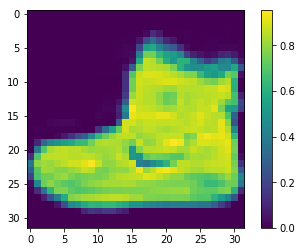

In [62]:
plt.figure()
plt.imshow(np.reshape(train_images_32x32[0], (32, 32)))
plt.colorbar()
plt.grid(False)


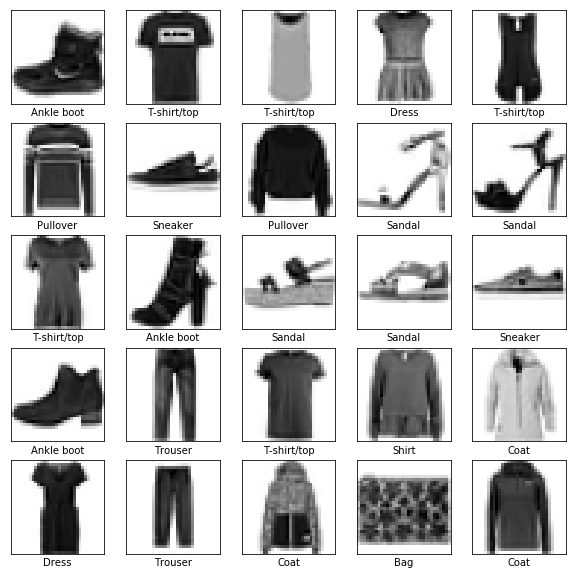

In [64]:
train_images = train_images_32x32 / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(train_images_32x32[i], (32,32)), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


In [65]:
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
"""
model = keras.applications.mobilenet_v2.MobileNetV2(input_shape=(32,32,1), alpha=1.4, weights=None, pooling='avg')


In [66]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [67]:
model.fit(train_images, train_labels, epochs=50)


Epoch 1/50


   32/60000 [..............................] - ETA: 12:08:27 - loss: 7.3640 - acc: 0.0000e+00

   64/60000 [..............................] - ETA: 6:06:13 - loss: 6.7573 - acc: 0.0000e+00 

   96/60000 [..............................] - ETA: 4:05:19 - loss: 6.0286 - acc: 0.0729    

  128/60000 [..............................] - ETA: 3:04:51 - loss: 5.5553 - acc: 0.0938

  160/60000 [..............................] - ETA: 2:28:35 - loss: 5.0413 - acc: 0.1250

  192/60000 [..............................] - ETA: 2:04:24 - loss: 4.8247 - acc: 0.1146

  224/60000 [..............................] - ETA: 1:47:12 - loss: 4.5071 - acc: 0.1339

  256/60000 [..............................] - ETA: 1:34:17 - loss: 4.2464 - acc: 0.1523

  288/60000 [..............................] - ETA: 1:24:15 - loss: 4.0389 - acc: 0.1562

  320/60000 [..............................] - ETA: 1:16:10 - loss: 4.0006 - acc: 0.1594

  352/60000 [..............................] - ETA: 1:09:36 - loss: 3.8465 - acc: 0.1562

  384/60000 [..............................] - ETA: 1:04:08 - loss: 3.7422 - acc: 0.1693

  416/60000 [..............................] - ETA: 59:30 - loss: 3.5885 - acc: 0.1827  

  448/60000 [..............................] - ETA: 55:32 - loss: 3.4905 - acc: 0.1964

  480/60000 [..............................] - ETA: 52:06 - loss: 3.3742 - acc: 0.2208

  512/60000 [..............................] - ETA: 49:07 - loss: 3.3344 - acc: 0.2188

  544/60000 [..............................] - ETA: 46:26 - loss: 3.2817 - acc: 0.2243

  576/60000 [..............................] - ETA: 44:04 - loss: 3.2086 - acc: 0.2309

  608/60000 [..............................] - ETA: 41:57 - loss: 3.1511 - acc: 0.2368

  640/60000 [..............................] - ETA: 40:00 - loss: 3.0936 - acc: 0.2453

  672/60000 [..............................] - ETA: 38:17 - loss: 3.0268 - acc: 0.2589

  704/60000 [..............................] - ETA: 36:42 - loss: 2.9758 - acc: 0.2670

  736/60000 [..............................] - ETA: 35:16 - loss: 2.9212 - acc: 0.2772

  768/60000 [..............................] - ETA: 33:57 - loss: 2.8464 - acc: 0.2917

  800/60000 [..............................] - ETA: 32:44 - loss: 2.7977 - acc: 0.2988

  832/60000 [..............................] - ETA: 31:38 - loss: 2.7466 - acc: 0.3029

  864/60000 [..............................] - ETA: 30:35 - loss: 2.7023 - acc: 0.3079

  896/60000 [..............................] - ETA: 29:38 - loss: 2.6819 - acc: 0.3069

  928/60000 [..............................] - ETA: 28:43 - loss: 2.6321 - acc: 0.3157

  960/60000 [..............................] - ETA: 27:53 - loss: 2.5896 - acc: 0.3240

  992/60000 [..............................] - ETA: 27:05 - loss: 2.5505 - acc: 0.3296

 1024/60000 [..............................] - ETA: 26:21 - loss: 2.5195 - acc: 0.3301

 1056/60000 [..............................] - ETA: 25:39 - loss: 2.4940 - acc: 0.3343

 1088/60000 [..............................] - ETA: 25:01 - loss: 2.4549 - acc: 0.3392

 1120/60000 [..............................] - ETA: 24:24 - loss: 2.4403 - acc: 0.3393

 1152/60000 [..............................] - ETA: 23:49 - loss: 2.4042 - acc: 0.3438

 1184/60000 [..............................] - ETA: 23:17 - loss: 2.3941 - acc: 0.3454

 1216/60000 [..............................] - ETA: 22:46 - loss: 2.3756 - acc: 0.3462

 1248/60000 [..............................] - ETA: 22:16 - loss: 2.3341 - acc: 0.3558

 1280/60000 [..............................] - ETA: 21:48 - loss: 2.3032 - acc: 0.3625

 1312/60000 [..............................] - ETA: 21:22 - loss: 2.2809 - acc: 0.3674

 1344/60000 [..............................] - ETA: 20:57 - loss: 2.2578 - acc: 0.3705

 1376/60000 [..............................] - ETA: 20:32 - loss: 2.2432 - acc: 0.3728

 1408/60000 [..............................] - ETA: 20:10 - loss: 2.2205 - acc: 0.3764

 1440/60000 [..............................] - ETA: 19:48 - loss: 2.2002 - acc: 0.3806

 1472/60000 [..............................] - ETA: 19:27 - loss: 2.1791 - acc: 0.3838

 1504/60000 [..............................] - ETA: 19:07 - loss: 2.1656 - acc: 0.3856

 1536/60000 [..............................] - ETA: 18:48 - loss: 2.1457 - acc: 0.3893

 1568/60000 [..............................] - ETA: 18:29 - loss: 2.1328 - acc: 0.3916

 1600/60000 [..............................] - ETA: 18:11 - loss: 2.1204 - acc: 0.3931

 1632/60000 [..............................] - ETA: 17:54 - loss: 2.1043 - acc: 0.3952

 1664/60000 [..............................] - ETA: 17:37 - loss: 2.0924 - acc: 0.3966

 1696/60000 [..............................] - ETA: 17:21 - loss: 2.0912 - acc: 0.3962

 1728/60000 [..............................] - ETA: 17:06 - loss: 2.0792 - acc: 0.3970

 1760/60000 [..............................] - ETA: 16:51 - loss: 2.0699 - acc: 0.3977

 1792/60000 [..............................] - ETA: 16:37 - loss: 2.0540 - acc: 0.4023

 1824/60000 [..............................] - ETA: 16:23 - loss: 2.0434 - acc: 0.4035

 1856/60000 [..............................] - ETA: 16:10 - loss: 2.0252 - acc: 0.4073

 1888/60000 [..............................] - ETA: 15:57 - loss: 2.0130 - acc: 0.4115

 1920/60000 [..............................] - ETA: 15:44 - loss: 1.9994 - acc: 0.4156

 1952/60000 [..............................] - ETA: 15:32 - loss: 1.9888 - acc: 0.4160

 1984/60000 [..............................] - ETA: 15:21 - loss: 1.9839 - acc: 0.4163

 2016/60000 [>.............................] - ETA: 15:09 - loss: 1.9669 - acc: 0.4206

 2048/60000 [>.............................] - ETA: 14:59 - loss: 1.9564 - acc: 0.4233

 2080/60000 [>.............................] - ETA: 14:48 - loss: 1.9406 - acc: 0.4269

 2112/60000 [>.............................] - ETA: 14:38 - loss: 1.9262 - acc: 0.4290

 2144/60000 [>.............................] - ETA: 14:28 - loss: 1.9122 - acc: 0.4324

 2176/60000 [>.............................] - ETA: 14:18 - loss: 1.8972 - acc: 0.4366

 2208/60000 [>.............................] - ETA: 14:09 - loss: 1.8803 - acc: 0.4420

 2240/60000 [>.............................] - ETA: 14:00 - loss: 1.8663 - acc: 0.4451

 2272/60000 [>.............................] - ETA: 13:51 - loss: 1.8622 - acc: 0.4463

 2304/60000 [>.............................] - ETA: 13:43 - loss: 1.8542 - acc: 0.4475

 2336/60000 [>.............................] - ETA: 13:34 - loss: 1.8445 - acc: 0.4491

 2368/60000 [>.............................] - ETA: 13:26 - loss: 1.8319 - acc: 0.4519

 2400/60000 [>.............................] - ETA: 13:18 - loss: 1.8198 - acc: 0.4542

 2432/60000 [>.............................] - ETA: 13:11 - loss: 1.8132 - acc: 0.4560

 2464/60000 [>.............................] - ETA: 13:03 - loss: 1.8050 - acc: 0.4578

 2496/60000 [>.............................] - ETA: 12:55 - loss: 1.8065 - acc: 0.4571

 2528/60000 [>.............................] - ETA: 12:48 - loss: 1.8010 - acc: 0.4569

 2560/60000 [>.............................] - ETA: 12:41 - loss: 1.7898 - acc: 0.4582

 2592/60000 [>.............................] - ETA: 12:34 - loss: 1.7846 - acc: 0.4572

 2624/60000 [>.............................] - ETA: 12:28 - loss: 1.7757 - acc: 0.4596

 2656/60000 [>.............................] - ETA: 12:21 - loss: 1.7675 - acc: 0.4616

 2688/60000 [>.............................] - ETA: 12:14 - loss: 1.7614 - acc: 0.4643

 2720/60000 [>.............................] - ETA: 12:08 - loss: 1.7596 - acc: 0.4643

 2752/60000 [>.............................] - ETA: 12:02 - loss: 1.7487 - acc: 0.4673

 2784/60000 [>.............................] - ETA: 11:56 - loss: 1.7429 - acc: 0.4684

 2816/60000 [>.............................] - ETA: 11:50 - loss: 1.7343 - acc: 0.4691

 2848/60000 [>.............................] - ETA: 11:45 - loss: 1.7258 - acc: 0.4698

 2880/60000 [>.............................] - ETA: 11:39 - loss: 1.7179 - acc: 0.4722

 2912/60000 [>.............................] - ETA: 11:33 - loss: 1.7076 - acc: 0.4742

 2944/60000 [>.............................] - ETA: 11:28 - loss: 1.7017 - acc: 0.4752

 2976/60000 [>.............................] - ETA: 11:23 - loss: 1.6932 - acc: 0.4775

 3008/60000 [>.............................] - ETA: 11:18 - loss: 1.6855 - acc: 0.4791

 3040/60000 [>.............................] - ETA: 11:13 - loss: 1.6791 - acc: 0.4806

 3072/60000 [>.............................] - ETA: 11:08 - loss: 1.6726 - acc: 0.4811

 3104/60000 [>.............................] - ETA: 11:03 - loss: 1.6657 - acc: 0.4826

 3136/60000 [>.............................] - ETA: 10:58 - loss: 1.6582 - acc: 0.4847

 3168/60000 [>.............................] - ETA: 10:54 - loss: 1.6497 - acc: 0.4867

 3200/60000 [>.............................] - ETA: 10:49 - loss: 1.6427 - acc: 0.4878

 3232/60000 [>.............................] - ETA: 10:45 - loss: 1.6393 - acc: 0.4879

 3264/60000 [>.............................] - ETA: 10:41 - loss: 1.6321 - acc: 0.4890

 3296/60000 [>.............................] - ETA: 10:36 - loss: 1.6234 - acc: 0.4909

 3328/60000 [>.............................] - ETA: 10:32 - loss: 1.6174 - acc: 0.4919

 3360/60000 [>.............................] - ETA: 10:28 - loss: 1.6085 - acc: 0.4940

 3392/60000 [>.............................] - ETA: 10:24 - loss: 1.5991 - acc: 0.4965

 3424/60000 [>.............................] - ETA: 10:20 - loss: 1.5928 - acc: 0.4971

 3456/60000 [>.............................] - ETA: 10:16 - loss: 1.5865 - acc: 0.4988

 3488/60000 [>.............................] - ETA: 10:13 - loss: 1.5831 - acc: 0.4997

 3520/60000 [>.............................] - ETA: 10:09 - loss: 1.5771 - acc: 0.5006

 3552/60000 [>.............................] - ETA: 10:05 - loss: 1.5773 - acc: 0.4994

 3584/60000 [>.............................] - ETA: 10:01 - loss: 1.5695 - acc: 0.5020

 3616/60000 [>.............................] - ETA: 9:58 - loss: 1.5639 - acc: 0.5033 

 3648/60000 [>.............................] - ETA: 9:54 - loss: 1.5588 - acc: 0.5044

 3680/60000 [>.............................] - ETA: 9:51 - loss: 1.5520 - acc: 0.5060

 3712/60000 [>.............................] - ETA: 9:47 - loss: 1.5497 - acc: 0.5057

 3744/60000 [>.............................] - ETA: 9:44 - loss: 1.5445 - acc: 0.5067

 3776/60000 [>.............................] - ETA: 9:41 - loss: 1.5389 - acc: 0.5082

 3808/60000 [>.............................] - ETA: 9:38 - loss: 1.5342 - acc: 0.5092

 3840/60000 [>.............................] - ETA: 9:34 - loss: 1.5365 - acc: 0.5089

 3872/60000 [>.............................] - ETA: 9:31 - loss: 1.5381 - acc: 0.5093

 3904/60000 [>.............................] - ETA: 9:28 - loss: 1.5352 - acc: 0.5100

 3936/60000 [>.............................] - ETA: 9:25 - loss: 1.5279 - acc: 0.5119

 3968/60000 [>.............................] - ETA: 9:22 - loss: 1.5247 - acc: 0.5126

 4000/60000 [=>............................] - ETA: 9:19 - loss: 1.5213 - acc: 0.5130

 4032/60000 [=>............................] - ETA: 9:16 - loss: 1.5160 - acc: 0.5144

 4064/60000 [=>............................] - ETA: 9:13 - loss: 1.5101 - acc: 0.5160

 4096/60000 [=>............................] - ETA: 9:11 - loss: 1.5061 - acc: 0.5173

 4128/60000 [=>............................] - ETA: 9:08 - loss: 1.5011 - acc: 0.5184

 4160/60000 [=>............................] - ETA: 9:05 - loss: 1.4941 - acc: 0.5204

 4192/60000 [=>............................] - ETA: 9:02 - loss: 1.4880 - acc: 0.5222

 4224/60000 [=>............................] - ETA: 9:00 - loss: 1.4882 - acc: 0.5218

 4256/60000 [=>............................] - ETA: 8:57 - loss: 1.4874 - acc: 0.5214

 4288/60000 [=>............................] - ETA: 8:55 - loss: 1.4811 - acc: 0.5233

 4320/60000 [=>............................] - ETA: 8:53 - loss: 1.4792 - acc: 0.5236

 4352/60000 [=>............................] - ETA: 8:50 - loss: 1.4753 - acc: 0.5248

 4384/60000 [=>............................] - ETA: 8:47 - loss: 1.4712 - acc: 0.5251

 4416/60000 [=>............................] - ETA: 8:45 - loss: 1.4663 - acc: 0.5265

 4448/60000 [=>............................] - ETA: 8:42 - loss: 1.4638 - acc: 0.5263

 4480/60000 [=>............................] - ETA: 8:40 - loss: 1.4598 - acc: 0.5272

 4512/60000 [=>............................] - ETA: 8:38 - loss: 1.4548 - acc: 0.5284

 4544/60000 [=>............................] - ETA: 8:35 - loss: 1.4487 - acc: 0.5304

 4576/60000 [=>............................] - ETA: 8:33 - loss: 1.4426 - acc: 0.5326

 4608/60000 [=>............................] - ETA: 8:31 - loss: 1.4396 - acc: 0.5326

 4640/60000 [=>............................] - ETA: 8:29 - loss: 1.4363 - acc: 0.5334

 4672/60000 [=>............................] - ETA: 8:26 - loss: 1.4322 - acc: 0.5342

 4704/60000 [=>............................] - ETA: 8:24 - loss: 1.4300 - acc: 0.5340

 4736/60000 [=>............................] - ETA: 8:22 - loss: 1.4259 - acc: 0.5351

 4768/60000 [=>............................] - ETA: 8:20 - loss: 1.4218 - acc: 0.5365

 4800/60000 [=>............................] - ETA: 8:18 - loss: 1.4193 - acc: 0.5371

 4832/60000 [=>............................] - ETA: 8:16 - loss: 1.4147 - acc: 0.5383

 4864/60000 [=>............................] - ETA: 8:14 - loss: 1.4107 - acc: 0.5399

 4896/60000 [=>............................] - ETA: 8:12 - loss: 1.4137 - acc: 0.5398

 4928/60000 [=>............................] - ETA: 8:10 - loss: 1.4166 - acc: 0.5394

 4960/60000 [=>............................] - ETA: 8:08 - loss: 1.4126 - acc: 0.5407

 4992/60000 [=>............................] - ETA: 8:05 - loss: 1.4081 - acc: 0.5419

 5024/60000 [=>............................] - ETA: 8:04 - loss: 1.4048 - acc: 0.5428

 5056/60000 [=>............................] - ETA: 8:02 - loss: 1.4027 - acc: 0.5431

 5088/60000 [=>............................] - ETA: 8:00 - loss: 1.3968 - acc: 0.5454

 5120/60000 [=>............................] - ETA: 7:58 - loss: 1.3927 - acc: 0.5467

 5152/60000 [=>............................] - ETA: 7:56 - loss: 1.3914 - acc: 0.5466

 5184/60000 [=>............................] - ETA: 7:54 - loss: 1.3900 - acc: 0.5469

 5216/60000 [=>............................] - ETA: 7:53 - loss: 1.3857 - acc: 0.5479

 5248/60000 [=>............................] - ETA: 7:51 - loss: 1.3813 - acc: 0.5495

 5280/60000 [=>............................] - ETA: 7:49 - loss: 1.3786 - acc: 0.5498

 5312/60000 [=>............................] - ETA: 7:48 - loss: 1.3732 - acc: 0.5516

 5344/60000 [=>............................] - ETA: 7:46 - loss: 1.3695 - acc: 0.5518

 5376/60000 [=>............................] - ETA: 7:44 - loss: 1.3663 - acc: 0.5528

 5408/60000 [=>............................] - ETA: 7:43 - loss: 1.3656 - acc: 0.5529

 5440/60000 [=>............................] - ETA: 7:41 - loss: 1.3610 - acc: 0.5540

 5472/60000 [=>............................] - ETA: 7:39 - loss: 1.3583 - acc: 0.5550

 5504/60000 [=>............................] - ETA: 7:38 - loss: 1.3535 - acc: 0.5567

 5536/60000 [=>............................] - ETA: 7:36 - loss: 1.3496 - acc: 0.5576

 5568/60000 [=>............................] - ETA: 7:35 - loss: 1.3466 - acc: 0.5585

 5600/60000 [=>............................] - ETA: 7:33 - loss: 1.3449 - acc: 0.5591

 5632/60000 [=>............................] - ETA: 7:32 - loss: 1.3395 - acc: 0.5607

 5664/60000 [=>............................] - ETA: 7:30 - loss: 1.3397 - acc: 0.5613

 5696/60000 [=>............................] - ETA: 7:29 - loss: 1.3407 - acc: 0.5614

 5728/60000 [=>............................] - ETA: 7:27 - loss: 1.3363 - acc: 0.5627

 5760/60000 [=>............................] - ETA: 7:26 - loss: 1.3369 - acc: 0.5628

 5792/60000 [=>............................] - ETA: 7:24 - loss: 1.3359 - acc: 0.5630

 5824/60000 [=>............................] - ETA: 7:23 - loss: 1.3331 - acc: 0.5634

 5856/60000 [=>............................] - ETA: 7:21 - loss: 1.3313 - acc: 0.5634

 5888/60000 [=>............................] - ETA: 7:20 - loss: 1.3320 - acc: 0.5637

 5920/60000 [=>............................] - ETA: 7:18 - loss: 1.3295 - acc: 0.5642

 5952/60000 [=>............................] - ETA: 7:17 - loss: 1.3253 - acc: 0.5654

 5984/60000 [=>............................] - ETA: 7:16 - loss: 1.3221 - acc: 0.5660

 6016/60000 [==>...........................] - ETA: 7:14 - loss: 1.3206 - acc: 0.5665

 6048/60000 [==>...........................] - ETA: 7:13 - loss: 1.3169 - acc: 0.5675

 6080/60000 [==>...........................] - ETA: 7:12 - loss: 1.3154 - acc: 0.5676

 6112/60000 [==>...........................] - ETA: 7:10 - loss: 1.3115 - acc: 0.5687

 6144/60000 [==>...........................] - ETA: 7:09 - loss: 1.3073 - acc: 0.5700

 6176/60000 [==>...........................] - ETA: 7:08 - loss: 1.3057 - acc: 0.5703

 6208/60000 [==>...........................] - ETA: 7:07 - loss: 1.3041 - acc: 0.5706

 6240/60000 [==>...........................] - ETA: 7:05 - loss: 1.3033 - acc: 0.5705

 6272/60000 [==>...........................] - ETA: 7:04 - loss: 1.3013 - acc: 0.5711

 6304/60000 [==>...........................] - ETA: 7:03 - loss: 1.3000 - acc: 0.5714

 6336/60000 [==>...........................] - ETA: 7:01 - loss: 1.2970 - acc: 0.5720

 6368/60000 [==>...........................] - ETA: 7:00 - loss: 1.2934 - acc: 0.5729

 6400/60000 [==>...........................] - ETA: 6:59 - loss: 1.2922 - acc: 0.5730

 6432/60000 [==>...........................] - ETA: 6:58 - loss: 1.2904 - acc: 0.5735

 6464/60000 [==>...........................] - ETA: 6:57 - loss: 1.2880 - acc: 0.5744

 6496/60000 [==>...........................] - ETA: 6:56 - loss: 1.2866 - acc: 0.5747

 6528/60000 [==>...........................] - ETA: 6:54 - loss: 1.2840 - acc: 0.5749

 6560/60000 [==>...........................] - ETA: 6:53 - loss: 1.2812 - acc: 0.5761

 6592/60000 [==>...........................] - ETA: 6:52 - loss: 1.2782 - acc: 0.5768

 6624/60000 [==>...........................] - ETA: 6:51 - loss: 1.2771 - acc: 0.5765

 6656/60000 [==>...........................] - ETA: 6:50 - loss: 1.2766 - acc: 0.5769

 6688/60000 [==>...........................] - ETA: 6:49 - loss: 1.2756 - acc: 0.5772

 6720/60000 [==>...........................] - ETA: 6:48 - loss: 1.2729 - acc: 0.5780

 6752/60000 [==>...........................] - ETA: 6:46 - loss: 1.2721 - acc: 0.5776

 6784/60000 [==>...........................] - ETA: 6:45 - loss: 1.2694 - acc: 0.5786

 6816/60000 [==>...........................] - ETA: 6:44 - loss: 1.2714 - acc: 0.5785

 6848/60000 [==>...........................] - ETA: 6:43 - loss: 1.2689 - acc: 0.5794

 6880/60000 [==>...........................] - ETA: 6:42 - loss: 1.2686 - acc: 0.5795

 6912/60000 [==>...........................] - ETA: 6:41 - loss: 1.2663 - acc: 0.5803

 6944/60000 [==>...........................] - ETA: 6:40 - loss: 1.2637 - acc: 0.5811

 6976/60000 [==>...........................] - ETA: 6:39 - loss: 1.2604 - acc: 0.5820

 7008/60000 [==>...........................] - ETA: 6:38 - loss: 1.2580 - acc: 0.5828

 7040/60000 [==>...........................] - ETA: 6:37 - loss: 1.2562 - acc: 0.5832

 7072/60000 [==>...........................] - ETA: 6:36 - loss: 1.2563 - acc: 0.5834

 7104/60000 [==>...........................] - ETA: 6:35 - loss: 1.2548 - acc: 0.5836

 7136/60000 [==>...........................] - ETA: 6:34 - loss: 1.2526 - acc: 0.5845

 7168/60000 [==>...........................] - ETA: 6:33 - loss: 1.2501 - acc: 0.5851

 7200/60000 [==>...........................] - ETA: 6:32 - loss: 1.2488 - acc: 0.5851

 7232/60000 [==>...........................] - ETA: 6:31 - loss: 1.2479 - acc: 0.5852

 7264/60000 [==>...........................] - ETA: 6:30 - loss: 1.2454 - acc: 0.5859

 7296/60000 [==>...........................] - ETA: 6:29 - loss: 1.2419 - acc: 0.5870

 7328/60000 [==>...........................] - ETA: 6:28 - loss: 1.2402 - acc: 0.5876

 7360/60000 [==>...........................] - ETA: 6:27 - loss: 1.2385 - acc: 0.5878

 7392/60000 [==>...........................] - ETA: 6:26 - loss: 1.2357 - acc: 0.5887

 7424/60000 [==>...........................] - ETA: 6:25 - loss: 1.2324 - acc: 0.5896

 7456/60000 [==>...........................] - ETA: 6:25 - loss: 1.2309 - acc: 0.5901

 7488/60000 [==>...........................] - ETA: 6:24 - loss: 1.2295 - acc: 0.5903

 7520/60000 [==>...........................] - ETA: 6:23 - loss: 1.2280 - acc: 0.5904

 7552/60000 [==>...........................] - ETA: 6:22 - loss: 1.2269 - acc: 0.5903

 7584/60000 [==>...........................] - ETA: 6:21 - loss: 1.2245 - acc: 0.5905

 7616/60000 [==>...........................] - ETA: 6:20 - loss: 1.2245 - acc: 0.5905

 7648/60000 [==>...........................] - ETA: 6:19 - loss: 1.2225 - acc: 0.5906

 7680/60000 [==>...........................] - ETA: 6:18 - loss: 1.2200 - acc: 0.5913

 7712/60000 [==>...........................] - ETA: 6:18 - loss: 1.2177 - acc: 0.5917

 7744/60000 [==>...........................] - ETA: 6:17 - loss: 1.2167 - acc: 0.5921

 7776/60000 [==>...........................] - ETA: 6:16 - loss: 1.2151 - acc: 0.5923

 7808/60000 [==>...........................] - ETA: 6:15 - loss: 1.2130 - acc: 0.5926

 7840/60000 [==>...........................] - ETA: 6:14 - loss: 1.2115 - acc: 0.5927

 7872/60000 [==>...........................] - ETA: 6:14 - loss: 1.2099 - acc: 0.5931

 7904/60000 [==>...........................] - ETA: 6:13 - loss: 1.2074 - acc: 0.5939

 7936/60000 [==>...........................] - ETA: 6:12 - loss: 1.2049 - acc: 0.5943

 7968/60000 [==>...........................] - ETA: 6:11 - loss: 1.2020 - acc: 0.5951

 8000/60000 [===>..........................] - ETA: 6:11 - loss: 1.2001 - acc: 0.5952

 8032/60000 [===>..........................] - ETA: 6:10 - loss: 1.1993 - acc: 0.5951

 8064/60000 [===>..........................] - ETA: 6:09 - loss: 1.1981 - acc: 0.5955

 8096/60000 [===>..........................] - ETA: 6:08 - loss: 1.1957 - acc: 0.5960

 8128/60000 [===>..........................] - ETA: 6:07 - loss: 1.1940 - acc: 0.5966

 8160/60000 [===>..........................] - ETA: 6:07 - loss: 1.1911 - acc: 0.5975

 8192/60000 [===>..........................] - ETA: 6:06 - loss: 1.1904 - acc: 0.5974

 8224/60000 [===>..........................] - ETA: 6:05 - loss: 1.1886 - acc: 0.5979

 8256/60000 [===>..........................] - ETA: 6:04 - loss: 1.1855 - acc: 0.5988

 8288/60000 [===>..........................] - ETA: 6:04 - loss: 1.1858 - acc: 0.5988

 8320/60000 [===>..........................] - ETA: 6:03 - loss: 1.1882 - acc: 0.5989

 8352/60000 [===>..........................] - ETA: 6:02 - loss: 1.1858 - acc: 0.5996

 8384/60000 [===>..........................] - ETA: 6:01 - loss: 1.1846 - acc: 0.5997

 8416/60000 [===>..........................] - ETA: 6:01 - loss: 1.1838 - acc: 0.6002

 8448/60000 [===>..........................] - ETA: 6:00 - loss: 1.1824 - acc: 0.6003

 8480/60000 [===>..........................] - ETA: 5:59 - loss: 1.1806 - acc: 0.6013

 8512/60000 [===>..........................] - ETA: 5:59 - loss: 1.1788 - acc: 0.6019

 8544/60000 [===>..........................] - ETA: 5:58 - loss: 1.1771 - acc: 0.6023

 8576/60000 [===>..........................] - ETA: 5:57 - loss: 1.1766 - acc: 0.6023

 8608/60000 [===>..........................] - ETA: 5:56 - loss: 1.1752 - acc: 0.6026

 8640/60000 [===>..........................] - ETA: 5:56 - loss: 1.1741 - acc: 0.6029

 8672/60000 [===>..........................] - ETA: 5:55 - loss: 1.1727 - acc: 0.6032

 8704/60000 [===>..........................] - ETA: 5:54 - loss: 1.1709 - acc: 0.6037

 8736/60000 [===>..........................] - ETA: 5:54 - loss: 1.1699 - acc: 0.6039

 8768/60000 [===>..........................] - ETA: 5:53 - loss: 1.1684 - acc: 0.6046

 8800/60000 [===>..........................] - ETA: 5:52 - loss: 1.1661 - acc: 0.6053

 8832/60000 [===>..........................] - ETA: 5:51 - loss: 1.1680 - acc: 0.6055

 8864/60000 [===>..........................] - ETA: 5:51 - loss: 1.1679 - acc: 0.6055

 8896/60000 [===>..........................] - ETA: 5:50 - loss: 1.1662 - acc: 0.6063

 8928/60000 [===>..........................] - ETA: 5:49 - loss: 1.1653 - acc: 0.6066

 8960/60000 [===>..........................] - ETA: 5:49 - loss: 1.1632 - acc: 0.6073

 8992/60000 [===>..........................] - ETA: 5:48 - loss: 1.1610 - acc: 0.6080

 9024/60000 [===>..........................] - ETA: 5:47 - loss: 1.1591 - acc: 0.6086

 9056/60000 [===>..........................] - ETA: 5:47 - loss: 1.1583 - acc: 0.6091

 9088/60000 [===>..........................] - ETA: 5:46 - loss: 1.1565 - acc: 0.6097

 9120/60000 [===>..........................] - ETA: 5:45 - loss: 1.1545 - acc: 0.6103

 9152/60000 [===>..........................] - ETA: 5:45 - loss: 1.1526 - acc: 0.6109

 9184/60000 [===>..........................] - ETA: 5:44 - loss: 1.1505 - acc: 0.6115

 9216/60000 [===>..........................] - ETA: 5:43 - loss: 1.1494 - acc: 0.6119

 9248/60000 [===>..........................] - ETA: 5:42 - loss: 1.1475 - acc: 0.6125

 9280/60000 [===>..........................] - ETA: 5:42 - loss: 1.1462 - acc: 0.6127

 9312/60000 [===>..........................] - ETA: 5:41 - loss: 1.1445 - acc: 0.6133

 9344/60000 [===>..........................] - ETA: 5:41 - loss: 1.1448 - acc: 0.6133

 9376/60000 [===>..........................] - ETA: 5:40 - loss: 1.1435 - acc: 0.6136

 9408/60000 [===>..........................] - ETA: 5:39 - loss: 1.1434 - acc: 0.6133

 9440/60000 [===>..........................] - ETA: 5:39 - loss: 1.1428 - acc: 0.6137

 9472/60000 [===>..........................] - ETA: 5:38 - loss: 1.1412 - acc: 0.6140

 9504/60000 [===>..........................] - ETA: 5:37 - loss: 1.1401 - acc: 0.6144

 9536/60000 [===>..........................] - ETA: 5:37 - loss: 1.1382 - acc: 0.6149

 9568/60000 [===>..........................] - ETA: 5:36 - loss: 1.1359 - acc: 0.6159

 9600/60000 [===>..........................] - ETA: 5:35 - loss: 1.1347 - acc: 0.6160

 9632/60000 [===>..........................] - ETA: 5:35 - loss: 1.1349 - acc: 0.6162

 9664/60000 [===>..........................] - ETA: 5:34 - loss: 1.1341 - acc: 0.6163

 9696/60000 [===>..........................] - ETA: 5:34 - loss: 1.1325 - acc: 0.6169

 9728/60000 [===>..........................] - ETA: 5:33 - loss: 1.1308 - acc: 0.6175

 9760/60000 [===>..........................] - ETA: 5:32 - loss: 1.1296 - acc: 0.6177

 9792/60000 [===>..........................] - ETA: 5:32 - loss: 1.1284 - acc: 0.6179

 9824/60000 [===>..........................] - ETA: 5:31 - loss: 1.1270 - acc: 0.6185

 9856/60000 [===>..........................] - ETA: 5:31 - loss: 1.1270 - acc: 0.6187

 9888/60000 [===>..........................] - ETA: 5:30 - loss: 1.1261 - acc: 0.6188

 9920/60000 [===>..........................] - ETA: 5:29 - loss: 1.1262 - acc: 0.6189

 9952/60000 [===>..........................] - ETA: 5:29 - loss: 1.1244 - acc: 0.6194

 9984/60000 [===>..........................] - ETA: 5:28 - loss: 1.1234 - acc: 0.6198

10016/60000 [====>.........................] - ETA: 5:28 - loss: 1.1218 - acc: 0.6204

10048/60000 [====>.........................] - ETA: 5:27 - loss: 1.1231 - acc: 0.6204

10080/60000 [====>.........................] - ETA: 5:26 - loss: 1.1220 - acc: 0.6205

10112/60000 [====>.........................] - ETA: 5:26 - loss: 1.1208 - acc: 0.6207

10144/60000 [====>.........................] - ETA: 5:25 - loss: 1.1192 - acc: 0.6212

10176/60000 [====>.........................] - ETA: 5:25 - loss: 1.1177 - acc: 0.6214

10208/60000 [====>.........................] - ETA: 5:24 - loss: 1.1159 - acc: 0.6219

10240/60000 [====>.........................] - ETA: 5:24 - loss: 1.1149 - acc: 0.6222

10272/60000 [====>.........................] - ETA: 5:23 - loss: 1.1130 - acc: 0.6229

10304/60000 [====>.........................] - ETA: 5:23 - loss: 1.1135 - acc: 0.6226

10336/60000 [====>.........................] - ETA: 5:22 - loss: 1.1115 - acc: 0.6231

10368/60000 [====>.........................] - ETA: 5:21 - loss: 1.1121 - acc: 0.6229

10400/60000 [====>.........................] - ETA: 5:21 - loss: 1.1107 - acc: 0.6231

10432/60000 [====>.........................] - ETA: 5:20 - loss: 1.1100 - acc: 0.6232

10464/60000 [====>.........................] - ETA: 5:20 - loss: 1.1086 - acc: 0.6236

10496/60000 [====>.........................] - ETA: 5:19 - loss: 1.1068 - acc: 0.6241

10528/60000 [====>.........................] - ETA: 5:19 - loss: 1.1051 - acc: 0.6246

10560/60000 [====>.........................] - ETA: 5:18 - loss: 1.1036 - acc: 0.6253

10592/60000 [====>.........................] - ETA: 5:17 - loss: 1.1033 - acc: 0.6254

10624/60000 [====>.........................] - ETA: 5:17 - loss: 1.1028 - acc: 0.6257

10656/60000 [====>.........................] - ETA: 5:16 - loss: 1.1016 - acc: 0.6260

10688/60000 [====>.........................] - ETA: 5:16 - loss: 1.1016 - acc: 0.6260

10720/60000 [====>.........................] - ETA: 5:15 - loss: 1.1011 - acc: 0.6264

10752/60000 [====>.........................] - ETA: 5:15 - loss: 1.0997 - acc: 0.6270

10784/60000 [====>.........................] - ETA: 5:14 - loss: 1.0991 - acc: 0.6269

10816/60000 [====>.........................] - ETA: 5:14 - loss: 1.0983 - acc: 0.6270

10848/60000 [====>.........................] - ETA: 5:13 - loss: 1.0993 - acc: 0.6267

10880/60000 [====>.........................] - ETA: 5:13 - loss: 1.0984 - acc: 0.6268

10912/60000 [====>.........................] - ETA: 5:12 - loss: 1.0973 - acc: 0.6273

10944/60000 [====>.........................] - ETA: 5:12 - loss: 1.0948 - acc: 0.6282

10976/60000 [====>.........................] - ETA: 5:11 - loss: 1.0934 - acc: 0.6287

11008/60000 [====>.........................] - ETA: 5:11 - loss: 1.0934 - acc: 0.6289

11040/60000 [====>.........................] - ETA: 5:10 - loss: 1.0921 - acc: 0.6293

11072/60000 [====>.........................] - ETA: 5:10 - loss: 1.0907 - acc: 0.6299

11104/60000 [====>.........................] - ETA: 5:09 - loss: 1.0895 - acc: 0.6301

11136/60000 [====>.........................] - ETA: 5:09 - loss: 1.0887 - acc: 0.6302

11168/60000 [====>.........................] - ETA: 5:08 - loss: 1.0885 - acc: 0.6304

11200/60000 [====>.........................] - ETA: 5:08 - loss: 1.0901 - acc: 0.6306

11232/60000 [====>.........................] - ETA: 5:07 - loss: 1.0887 - acc: 0.6310

11264/60000 [====>.........................] - ETA: 5:07 - loss: 1.0879 - acc: 0.6314

11296/60000 [====>.........................] - ETA: 5:06 - loss: 1.0868 - acc: 0.6319

11328/60000 [====>.........................] - ETA: 5:06 - loss: 1.0856 - acc: 0.6322

11360/60000 [====>.........................] - ETA: 5:05 - loss: 1.0852 - acc: 0.6325

11392/60000 [====>.........................] - ETA: 5:05 - loss: 1.0842 - acc: 0.6328

11424/60000 [====>.........................] - ETA: 5:04 - loss: 1.0835 - acc: 0.6331

11456/60000 [====>.........................] - ETA: 5:04 - loss: 1.0822 - acc: 0.6336

11488/60000 [====>.........................] - ETA: 5:03 - loss: 1.0814 - acc: 0.6338

11520/60000 [====>.........................] - ETA: 5:03 - loss: 1.0803 - acc: 0.6341

11552/60000 [====>.........................] - ETA: 5:02 - loss: 1.0793 - acc: 0.6344

11584/60000 [====>.........................] - ETA: 5:02 - loss: 1.0783 - acc: 0.6346

11616/60000 [====>.........................] - ETA: 5:01 - loss: 1.0769 - acc: 0.6349

11648/60000 [====>.........................] - ETA: 5:01 - loss: 1.0762 - acc: 0.6350

11680/60000 [====>.........................] - ETA: 5:01 - loss: 1.0750 - acc: 0.6354

11712/60000 [====>.........................] - ETA: 5:00 - loss: 1.0741 - acc: 0.6360

11744/60000 [====>.........................] - ETA: 5:00 - loss: 1.0735 - acc: 0.6362

11776/60000 [====>.........................] - ETA: 4:59 - loss: 1.0723 - acc: 0.6365

11808/60000 [====>.........................] - ETA: 4:59 - loss: 1.0715 - acc: 0.6368

11840/60000 [====>.........................] - ETA: 4:58 - loss: 1.0710 - acc: 0.6367

11872/60000 [====>.........................] - ETA: 4:58 - loss: 1.0703 - acc: 0.6370

11904/60000 [====>.........................] - ETA: 4:57 - loss: 1.0699 - acc: 0.6371

11936/60000 [====>.........................] - ETA: 4:57 - loss: 1.0689 - acc: 0.6375

11968/60000 [====>.........................] - ETA: 4:57 - loss: 1.0680 - acc: 0.6378

12000/60000 [=====>........................] - ETA: 4:56 - loss: 1.0667 - acc: 0.6382

12032/60000 [=====>........................] - ETA: 4:56 - loss: 1.0663 - acc: 0.6384

12064/60000 [=====>........................] - ETA: 4:55 - loss: 1.0645 - acc: 0.6390

12096/60000 [=====>........................] - ETA: 4:55 - loss: 1.0632 - acc: 0.6395

12128/60000 [=====>........................] - ETA: 4:54 - loss: 1.0623 - acc: 0.6398

12160/60000 [=====>........................] - ETA: 4:54 - loss: 1.0613 - acc: 0.6401

12192/60000 [=====>........................] - ETA: 4:53 - loss: 1.0601 - acc: 0.6405

12224/60000 [=====>........................] - ETA: 4:53 - loss: 1.0591 - acc: 0.6410

12256/60000 [=====>........................] - ETA: 4:53 - loss: 1.0579 - acc: 0.6412

12288/60000 [=====>........................] - ETA: 4:52 - loss: 1.0571 - acc: 0.6413

12320/60000 [=====>........................] - ETA: 4:52 - loss: 1.0559 - acc: 0.6416

12352/60000 [=====>........................] - ETA: 4:51 - loss: 1.0545 - acc: 0.6420

12384/60000 [=====>........................] - ETA: 4:51 - loss: 1.0533 - acc: 0.6424

12416/60000 [=====>........................] - ETA: 4:50 - loss: 1.0526 - acc: 0.6426

12448/60000 [=====>........................] - ETA: 4:50 - loss: 1.0512 - acc: 0.6430

12480/60000 [=====>........................] - ETA: 4:50 - loss: 1.0498 - acc: 0.6435

12512/60000 [=====>........................] - ETA: 4:49 - loss: 1.0487 - acc: 0.6437

12544/60000 [=====>........................] - ETA: 4:49 - loss: 1.0474 - acc: 0.6441

12576/60000 [=====>........................] - ETA: 4:48 - loss: 1.0464 - acc: 0.6444

12608/60000 [=====>........................] - ETA: 4:48 - loss: 1.0451 - acc: 0.6449

12640/60000 [=====>........................] - ETA: 4:47 - loss: 1.0460 - acc: 0.6449

12672/60000 [=====>........................] - ETA: 4:47 - loss: 1.0449 - acc: 0.6450

12704/60000 [=====>........................] - ETA: 4:47 - loss: 1.0436 - acc: 0.6454

12736/60000 [=====>........................] - ETA: 4:46 - loss: 1.0435 - acc: 0.6455

12768/60000 [=====>........................] - ETA: 4:46 - loss: 1.0435 - acc: 0.6452

12800/60000 [=====>........................] - ETA: 4:45 - loss: 1.0421 - acc: 0.6455

12832/60000 [=====>........................] - ETA: 4:45 - loss: 1.0405 - acc: 0.6462

12864/60000 [=====>........................] - ETA: 4:45 - loss: 1.0394 - acc: 0.6465

12896/60000 [=====>........................] - ETA: 4:44 - loss: 1.0386 - acc: 0.6466

12928/60000 [=====>........................] - ETA: 4:44 - loss: 1.0376 - acc: 0.6469

12960/60000 [=====>........................] - ETA: 4:43 - loss: 1.0363 - acc: 0.6474

12992/60000 [=====>........................] - ETA: 4:43 - loss: 1.0351 - acc: 0.6478

13024/60000 [=====>........................] - ETA: 4:42 - loss: 1.0348 - acc: 0.6480

13056/60000 [=====>........................] - ETA: 4:42 - loss: 1.0340 - acc: 0.6482

13088/60000 [=====>........................] - ETA: 4:42 - loss: 1.0335 - acc: 0.6484

13120/60000 [=====>........................] - ETA: 4:41 - loss: 1.0327 - acc: 0.6488

13152/60000 [=====>........................] - ETA: 4:41 - loss: 1.0316 - acc: 0.6490

13184/60000 [=====>........................] - ETA: 4:41 - loss: 1.0308 - acc: 0.6493

13216/60000 [=====>........................] - ETA: 4:40 - loss: 1.0296 - acc: 0.6497

13248/60000 [=====>........................] - ETA: 4:40 - loss: 1.0281 - acc: 0.6502

13280/60000 [=====>........................] - ETA: 4:39 - loss: 1.0276 - acc: 0.6503

13312/60000 [=====>........................] - ETA: 4:39 - loss: 1.0267 - acc: 0.6505

13344/60000 [=====>........................] - ETA: 4:39 - loss: 1.0260 - acc: 0.6506

13376/60000 [=====>........................] - ETA: 4:38 - loss: 1.0253 - acc: 0.6504

13408/60000 [=====>........................] - ETA: 4:38 - loss: 1.0241 - acc: 0.6508

13440/60000 [=====>........................] - ETA: 4:37 - loss: 1.0234 - acc: 0.6509

13472/60000 [=====>........................] - ETA: 4:37 - loss: 1.0222 - acc: 0.6513

13504/60000 [=====>........................] - ETA: 4:37 - loss: 1.0212 - acc: 0.6516

13536/60000 [=====>........................] - ETA: 4:36 - loss: 1.0207 - acc: 0.6519

13568/60000 [=====>........................] - ETA: 4:36 - loss: 1.0199 - acc: 0.6520

13600/60000 [=====>........................] - ETA: 4:36 - loss: 1.0200 - acc: 0.6521

13632/60000 [=====>........................] - ETA: 4:35 - loss: 1.0195 - acc: 0.6521

13664/60000 [=====>........................] - ETA: 4:35 - loss: 1.0191 - acc: 0.6523

13696/60000 [=====>........................] - ETA: 4:34 - loss: 1.0182 - acc: 0.6527

13728/60000 [=====>........................] - ETA: 4:34 - loss: 1.0196 - acc: 0.6528

13760/60000 [=====>........................] - ETA: 4:34 - loss: 1.0203 - acc: 0.6525

13792/60000 [=====>........................] - ETA: 4:33 - loss: 1.0190 - acc: 0.6530

13824/60000 [=====>........................] - ETA: 4:33 - loss: 1.0179 - acc: 0.6534

13856/60000 [=====>........................] - ETA: 4:33 - loss: 1.0167 - acc: 0.6538

13888/60000 [=====>........................] - ETA: 4:32 - loss: 1.0163 - acc: 0.6540

13920/60000 [=====>........................] - ETA: 4:32 - loss: 1.0155 - acc: 0.6542

13952/60000 [=====>........................] - ETA: 4:31 - loss: 1.0160 - acc: 0.6543

13984/60000 [=====>........................] - ETA: 4:31 - loss: 1.0157 - acc: 0.6544

14016/60000 [======>.......................] - ETA: 4:31 - loss: 1.0153 - acc: 0.6545

14048/60000 [======>.......................] - ETA: 4:30 - loss: 1.0152 - acc: 0.6544

14080/60000 [======>.......................] - ETA: 4:30 - loss: 1.0147 - acc: 0.6548

14112/60000 [======>.......................] - ETA: 4:30 - loss: 1.0138 - acc: 0.6550

14144/60000 [======>.......................] - ETA: 4:29 - loss: 1.0137 - acc: 0.6550

14176/60000 [======>.......................] - ETA: 4:29 - loss: 1.0129 - acc: 0.6554

14208/60000 [======>.......................] - ETA: 4:29 - loss: 1.0121 - acc: 0.6558

14240/60000 [======>.......................] - ETA: 4:28 - loss: 1.0118 - acc: 0.6558

14272/60000 [======>.......................] - ETA: 4:28 - loss: 1.0110 - acc: 0.6558

14304/60000 [======>.......................] - ETA: 4:28 - loss: 1.0110 - acc: 0.6560

14336/60000 [======>.......................] - ETA: 4:27 - loss: 1.0095 - acc: 0.6567

14368/60000 [======>.......................] - ETA: 4:27 - loss: 1.0085 - acc: 0.6569

14400/60000 [======>.......................] - ETA: 4:26 - loss: 1.0083 - acc: 0.6569

14432/60000 [======>.......................] - ETA: 4:26 - loss: 1.0109 - acc: 0.6566

14464/60000 [======>.......................] - ETA: 4:26 - loss: 1.0105 - acc: 0.6567

14496/60000 [======>.......................] - ETA: 4:25 - loss: 1.0097 - acc: 0.6568

14528/60000 [======>.......................] - ETA: 4:25 - loss: 1.0093 - acc: 0.6569

14560/60000 [======>.......................] - ETA: 4:25 - loss: 1.0079 - acc: 0.6574

14592/60000 [======>.......................] - ETA: 4:24 - loss: 1.0071 - acc: 0.6578

14624/60000 [======>.......................] - ETA: 4:24 - loss: 1.0066 - acc: 0.6578

14656/60000 [======>.......................] - ETA: 4:24 - loss: 1.0059 - acc: 0.6582

14688/60000 [======>.......................] - ETA: 4:23 - loss: 1.0054 - acc: 0.6584

14720/60000 [======>.......................] - ETA: 4:23 - loss: 1.0045 - acc: 0.6585

14752/60000 [======>.......................] - ETA: 4:23 - loss: 1.0035 - acc: 0.6590

14784/60000 [======>.......................] - ETA: 4:22 - loss: 1.0025 - acc: 0.6592

14816/60000 [======>.......................] - ETA: 4:22 - loss: 1.0032 - acc: 0.6592

14848/60000 [======>.......................] - ETA: 4:22 - loss: 1.0024 - acc: 0.6593

14880/60000 [======>.......................] - ETA: 4:21 - loss: 1.0023 - acc: 0.6595

14912/60000 [======>.......................] - ETA: 4:21 - loss: 1.0019 - acc: 0.6595

14944/60000 [======>.......................] - ETA: 4:21 - loss: 1.0015 - acc: 0.6597

14976/60000 [======>.......................] - ETA: 4:20 - loss: 1.0010 - acc: 0.6599

15008/60000 [======>.......................] - ETA: 4:20 - loss: 1.0004 - acc: 0.6600

15040/60000 [======>.......................] - ETA: 4:20 - loss: 1.0003 - acc: 0.6599

15072/60000 [======>.......................] - ETA: 4:19 - loss: 0.9994 - acc: 0.6600

15104/60000 [======>.......................] - ETA: 4:19 - loss: 0.9987 - acc: 0.6603

15136/60000 [======>.......................] - ETA: 4:19 - loss: 0.9984 - acc: 0.6604

15168/60000 [======>.......................] - ETA: 4:18 - loss: 0.9977 - acc: 0.6605

15200/60000 [======>.......................] - ETA: 4:18 - loss: 0.9971 - acc: 0.6609

15232/60000 [======>.......................] - ETA: 4:18 - loss: 0.9969 - acc: 0.6609

15264/60000 [======>.......................] - ETA: 4:17 - loss: 0.9962 - acc: 0.6611

15296/60000 [======>.......................] - ETA: 4:17 - loss: 0.9955 - acc: 0.6611

15328/60000 [======>.......................] - ETA: 4:17 - loss: 0.9951 - acc: 0.6613

15360/60000 [======>.......................] - ETA: 4:16 - loss: 0.9947 - acc: 0.6615

15392/60000 [======>.......................] - ETA: 4:16 - loss: 0.9942 - acc: 0.6615

15424/60000 [======>.......................] - ETA: 4:16 - loss: 0.9928 - acc: 0.6620

15456/60000 [======>.......................] - ETA: 4:15 - loss: 0.9919 - acc: 0.6621

15488/60000 [======>.......................] - ETA: 4:15 - loss: 0.9914 - acc: 0.6623

15520/60000 [======>.......................] - ETA: 4:15 - loss: 0.9901 - acc: 0.6628

15552/60000 [======>.......................] - ETA: 4:14 - loss: 0.9891 - acc: 0.6632

15584/60000 [======>.......................] - ETA: 4:14 - loss: 0.9878 - acc: 0.6636

15616/60000 [======>.......................] - ETA: 4:14 - loss: 0.9870 - acc: 0.6638

15648/60000 [======>.......................] - ETA: 4:13 - loss: 0.9863 - acc: 0.6639

15680/60000 [======>.......................] - ETA: 4:13 - loss: 0.9854 - acc: 0.6643

15712/60000 [======>.......................] - ETA: 4:13 - loss: 0.9845 - acc: 0.6645

15744/60000 [======>.......................] - ETA: 4:12 - loss: 0.9840 - acc: 0.6646

15776/60000 [======>.......................] - ETA: 4:12 - loss: 0.9837 - acc: 0.6647

15808/60000 [======>.......................] - ETA: 4:12 - loss: 0.9834 - acc: 0.6648

15840/60000 [======>.......................] - ETA: 4:11 - loss: 0.9830 - acc: 0.6650

15872/60000 [======>.......................] - ETA: 4:11 - loss: 0.9820 - acc: 0.6653

15904/60000 [======>.......................] - ETA: 4:11 - loss: 0.9813 - acc: 0.6654

15936/60000 [======>.......................] - ETA: 4:11 - loss: 0.9807 - acc: 0.6657

15968/60000 [======>.......................] - ETA: 4:10 - loss: 0.9799 - acc: 0.6658

16000/60000 [=======>......................] - ETA: 4:10 - loss: 0.9794 - acc: 0.6661

16032/60000 [=======>......................] - ETA: 4:10 - loss: 0.9786 - acc: 0.6663

16064/60000 [=======>......................] - ETA: 4:09 - loss: 0.9781 - acc: 0.6664

16096/60000 [=======>......................] - ETA: 4:09 - loss: 0.9773 - acc: 0.6666

16128/60000 [=======>......................] - ETA: 4:09 - loss: 0.9762 - acc: 0.6670

16160/60000 [=======>......................] - ETA: 4:08 - loss: 0.9762 - acc: 0.6671

16192/60000 [=======>......................] - ETA: 4:08 - loss: 0.9757 - acc: 0.6671

16224/60000 [=======>......................] - ETA: 4:08 - loss: 0.9751 - acc: 0.6673

16256/60000 [=======>......................] - ETA: 4:07 - loss: 0.9745 - acc: 0.6676

16288/60000 [=======>......................] - ETA: 4:07 - loss: 0.9740 - acc: 0.6677

16320/60000 [=======>......................] - ETA: 4:07 - loss: 0.9731 - acc: 0.6679

16352/60000 [=======>......................] - ETA: 4:07 - loss: 0.9721 - acc: 0.6683

16384/60000 [=======>......................] - ETA: 4:06 - loss: 0.9711 - acc: 0.6686

16416/60000 [=======>......................] - ETA: 4:06 - loss: 0.9715 - acc: 0.6686

16448/60000 [=======>......................] - ETA: 4:06 - loss: 0.9703 - acc: 0.6689

16480/60000 [=======>......................] - ETA: 4:05 - loss: 0.9695 - acc: 0.6692

16512/60000 [=======>......................] - ETA: 4:05 - loss: 0.9685 - acc: 0.6696

16544/60000 [=======>......................] - ETA: 4:05 - loss: 0.9689 - acc: 0.6696

16576/60000 [=======>......................] - ETA: 4:04 - loss: 0.9682 - acc: 0.6696

16608/60000 [=======>......................] - ETA: 4:04 - loss: 0.9673 - acc: 0.6699

16640/60000 [=======>......................] - ETA: 4:04 - loss: 0.9669 - acc: 0.6701

16672/60000 [=======>......................] - ETA: 4:04 - loss: 0.9660 - acc: 0.6704

16704/60000 [=======>......................] - ETA: 4:03 - loss: 0.9656 - acc: 0.6704

16736/60000 [=======>......................] - ETA: 4:03 - loss: 0.9647 - acc: 0.6707

16768/60000 [=======>......................] - ETA: 4:03 - loss: 0.9653 - acc: 0.6706

16800/60000 [=======>......................] - ETA: 4:02 - loss: 0.9644 - acc: 0.6708

16832/60000 [=======>......................] - ETA: 4:02 - loss: 0.9637 - acc: 0.6710

16864/60000 [=======>......................] - ETA: 4:02 - loss: 0.9630 - acc: 0.6713

16896/60000 [=======>......................] - ETA: 4:02 - loss: 0.9629 - acc: 0.6713

16928/60000 [=======>......................] - ETA: 4:01 - loss: 0.9617 - acc: 0.6717

16960/60000 [=======>......................] - ETA: 4:01 - loss: 0.9610 - acc: 0.6721

16992/60000 [=======>......................] - ETA: 4:01 - loss: 0.9601 - acc: 0.6723

17024/60000 [=======>......................] - ETA: 4:00 - loss: 0.9591 - acc: 0.6726

17056/60000 [=======>......................] - ETA: 4:00 - loss: 0.9591 - acc: 0.6727

17088/60000 [=======>......................] - ETA: 4:00 - loss: 0.9585 - acc: 0.6729

17120/60000 [=======>......................] - ETA: 4:00 - loss: 0.9577 - acc: 0.6731

17152/60000 [=======>......................] - ETA: 3:59 - loss: 0.9567 - acc: 0.6736

17184/60000 [=======>......................] - ETA: 3:59 - loss: 0.9562 - acc: 0.6738

17216/60000 [=======>......................] - ETA: 3:59 - loss: 0.9558 - acc: 0.6740

17248/60000 [=======>......................] - ETA: 3:58 - loss: 0.9557 - acc: 0.6741

17280/60000 [=======>......................] - ETA: 3:58 - loss: 0.9554 - acc: 0.6742

17312/60000 [=======>......................] - ETA: 3:58 - loss: 0.9543 - acc: 0.6744

17344/60000 [=======>......................] - ETA: 3:58 - loss: 0.9539 - acc: 0.6746

17376/60000 [=======>......................] - ETA: 3:57 - loss: 0.9535 - acc: 0.6747

17408/60000 [=======>......................] - ETA: 3:57 - loss: 0.9533 - acc: 0.6747

17440/60000 [=======>......................] - ETA: 3:57 - loss: 0.9529 - acc: 0.6749

17472/60000 [=======>......................] - ETA: 3:56 - loss: 0.9522 - acc: 0.6750

17504/60000 [=======>......................] - ETA: 3:56 - loss: 0.9523 - acc: 0.6752

17536/60000 [=======>......................] - ETA: 3:56 - loss: 0.9528 - acc: 0.6750

17568/60000 [=======>......................] - ETA: 3:56 - loss: 0.9522 - acc: 0.6750

17600/60000 [=======>......................] - ETA: 3:55 - loss: 0.9517 - acc: 0.6751

17632/60000 [=======>......................] - ETA: 3:55 - loss: 0.9506 - acc: 0.6754

17664/60000 [=======>......................] - ETA: 3:55 - loss: 0.9506 - acc: 0.6756

17696/60000 [=======>......................] - ETA: 3:54 - loss: 0.9503 - acc: 0.6757

17728/60000 [=======>......................] - ETA: 3:54 - loss: 0.9503 - acc: 0.6757

17760/60000 [=======>......................] - ETA: 3:54 - loss: 0.9498 - acc: 0.6759

17792/60000 [=======>......................] - ETA: 3:54 - loss: 0.9497 - acc: 0.6759

17824/60000 [=======>......................] - ETA: 3:53 - loss: 0.9485 - acc: 0.6764

17856/60000 [=======>......................] - ETA: 3:53 - loss: 0.9478 - acc: 0.6766

17888/60000 [=======>......................] - ETA: 3:53 - loss: 0.9471 - acc: 0.6768

17920/60000 [=======>......................] - ETA: 3:53 - loss: 0.9466 - acc: 0.6769

17952/60000 [=======>......................] - ETA: 3:52 - loss: 0.9458 - acc: 0.6772

17984/60000 [=======>......................] - ETA: 3:52 - loss: 0.9450 - acc: 0.6774

18016/60000 [========>.....................] - ETA: 3:52 - loss: 0.9444 - acc: 0.6775

18048/60000 [========>.....................] - ETA: 3:51 - loss: 0.9439 - acc: 0.6776

18080/60000 [========>.....................] - ETA: 3:51 - loss: 0.9430 - acc: 0.6779

18112/60000 [========>.....................] - ETA: 3:51 - loss: 0.9422 - acc: 0.6782

18144/60000 [========>.....................] - ETA: 3:51 - loss: 0.9415 - acc: 0.6783

18176/60000 [========>.....................] - ETA: 3:50 - loss: 0.9404 - acc: 0.6786

18208/60000 [========>.....................] - ETA: 3:50 - loss: 0.9417 - acc: 0.6785

18240/60000 [========>.....................] - ETA: 3:50 - loss: 0.9406 - acc: 0.6789

18272/60000 [========>.....................] - ETA: 3:50 - loss: 0.9399 - acc: 0.6792

18304/60000 [========>.....................] - ETA: 3:49 - loss: 0.9391 - acc: 0.6794

18336/60000 [========>.....................] - ETA: 3:49 - loss: 0.9385 - acc: 0.6796

18368/60000 [========>.....................] - ETA: 3:49 - loss: 0.9383 - acc: 0.6797

18400/60000 [========>.....................] - ETA: 3:48 - loss: 0.9376 - acc: 0.6800

18432/60000 [========>.....................] - ETA: 3:48 - loss: 0.9379 - acc: 0.6801

18464/60000 [========>.....................] - ETA: 3:48 - loss: 0.9369 - acc: 0.6804

18496/60000 [========>.....................] - ETA: 3:48 - loss: 0.9360 - acc: 0.6807

18528/60000 [========>.....................] - ETA: 3:47 - loss: 0.9356 - acc: 0.6808

18560/60000 [========>.....................] - ETA: 3:47 - loss: 0.9350 - acc: 0.6811

18592/60000 [========>.....................] - ETA: 3:47 - loss: 0.9343 - acc: 0.6814

18624/60000 [========>.....................] - ETA: 3:47 - loss: 0.9345 - acc: 0.6815

18656/60000 [========>.....................] - ETA: 3:46 - loss: 0.9345 - acc: 0.6815

18688/60000 [========>.....................] - ETA: 3:46 - loss: 0.9340 - acc: 0.6816

18720/60000 [========>.....................] - ETA: 3:46 - loss: 0.9348 - acc: 0.6814

18752/60000 [========>.....................] - ETA: 3:46 - loss: 0.9342 - acc: 0.6817

18784/60000 [========>.....................] - ETA: 3:45 - loss: 0.9335 - acc: 0.6818

18816/60000 [========>.....................] - ETA: 3:45 - loss: 0.9329 - acc: 0.6821

18848/60000 [========>.....................] - ETA: 3:45 - loss: 0.9324 - acc: 0.6822

18880/60000 [========>.....................] - ETA: 3:45 - loss: 0.9321 - acc: 0.6824

18912/60000 [========>.....................] - ETA: 3:44 - loss: 0.9328 - acc: 0.6823

18944/60000 [========>.....................] - ETA: 3:44 - loss: 0.9323 - acc: 0.6824

18976/60000 [========>.....................] - ETA: 3:44 - loss: 0.9318 - acc: 0.6824

19008/60000 [========>.....................] - ETA: 3:44 - loss: 0.9313 - acc: 0.6826

19040/60000 [========>.....................] - ETA: 3:43 - loss: 0.9311 - acc: 0.6827

19072/60000 [========>.....................] - ETA: 3:43 - loss: 0.9304 - acc: 0.6830

19104/60000 [========>.....................] - ETA: 3:43 - loss: 0.9298 - acc: 0.6833

19136/60000 [========>.....................] - ETA: 3:43 - loss: 0.9292 - acc: 0.6836

19168/60000 [========>.....................] - ETA: 3:42 - loss: 0.9285 - acc: 0.6840

19200/60000 [========>.....................] - ETA: 3:42 - loss: 0.9277 - acc: 0.6842

19232/60000 [========>.....................] - ETA: 3:42 - loss: 0.9267 - acc: 0.6845

19264/60000 [========>.....................] - ETA: 3:41 - loss: 0.9263 - acc: 0.6846

19296/60000 [========>.....................] - ETA: 3:41 - loss: 0.9255 - acc: 0.6849

19328/60000 [========>.....................] - ETA: 3:41 - loss: 0.9246 - acc: 0.6852

19360/60000 [========>.....................] - ETA: 3:41 - loss: 0.9240 - acc: 0.6854

19392/60000 [========>.....................] - ETA: 3:40 - loss: 0.9234 - acc: 0.6856

19424/60000 [========>.....................] - ETA: 3:40 - loss: 0.9231 - acc: 0.6856

19456/60000 [========>.....................] - ETA: 3:40 - loss: 0.9241 - acc: 0.6856

19488/60000 [========>.....................] - ETA: 3:40 - loss: 0.9237 - acc: 0.6859

19520/60000 [========>.....................] - ETA: 3:39 - loss: 0.9228 - acc: 0.6862

19552/60000 [========>.....................] - ETA: 3:39 - loss: 0.9228 - acc: 0.6863

19584/60000 [========>.....................] - ETA: 3:39 - loss: 0.9226 - acc: 0.6864

19616/60000 [========>.....................] - ETA: 3:39 - loss: 0.9222 - acc: 0.6866

19648/60000 [========>.....................] - ETA: 3:38 - loss: 0.9215 - acc: 0.6867

19680/60000 [========>.....................] - ETA: 3:38 - loss: 0.9219 - acc: 0.6868

19712/60000 [========>.....................] - ETA: 3:38 - loss: 0.9232 - acc: 0.6864

19744/60000 [========>.....................] - ETA: 3:38 - loss: 0.9229 - acc: 0.6866

19776/60000 [========>.....................] - ETA: 3:37 - loss: 0.9225 - acc: 0.6867

19808/60000 [========>.....................] - ETA: 3:37 - loss: 0.9219 - acc: 0.6868

19840/60000 [========>.....................] - ETA: 3:37 - loss: 0.9217 - acc: 0.6869

19872/60000 [========>.....................] - ETA: 3:37 - loss: 0.9216 - acc: 0.6868

19904/60000 [========>.....................] - ETA: 3:36 - loss: 0.9211 - acc: 0.6869

19936/60000 [========>.....................] - ETA: 3:36 - loss: 0.9215 - acc: 0.6868

19968/60000 [========>.....................] - ETA: 3:36 - loss: 0.9214 - acc: 0.6869

20000/60000 [=========>....................] - ETA: 3:36 - loss: 0.9213 - acc: 0.6868

20032/60000 [=========>....................] - ETA: 3:36 - loss: 0.9210 - acc: 0.6870

20064/60000 [=========>....................] - ETA: 3:35 - loss: 0.9204 - acc: 0.6871

20096/60000 [=========>....................] - ETA: 3:35 - loss: 0.9201 - acc: 0.6872

20128/60000 [=========>....................] - ETA: 3:35 - loss: 0.9197 - acc: 0.6874

20160/60000 [=========>....................] - ETA: 3:35 - loss: 0.9197 - acc: 0.6872

20192/60000 [=========>....................] - ETA: 3:34 - loss: 0.9191 - acc: 0.6874

20224/60000 [=========>....................] - ETA: 3:34 - loss: 0.9192 - acc: 0.6870

20256/60000 [=========>....................] - ETA: 3:34 - loss: 0.9189 - acc: 0.6870

20288/60000 [=========>....................] - ETA: 3:34 - loss: 0.9186 - acc: 0.6872

20320/60000 [=========>....................] - ETA: 3:33 - loss: 0.9189 - acc: 0.6870

20352/60000 [=========>....................] - ETA: 3:33 - loss: 0.9185 - acc: 0.6870

20384/60000 [=========>....................] - ETA: 3:33 - loss: 0.9187 - acc: 0.6869

20416/60000 [=========>....................] - ETA: 3:33 - loss: 0.9186 - acc: 0.6870

20448/60000 [=========>....................] - ETA: 3:32 - loss: 0.9188 - acc: 0.6869

20480/60000 [=========>....................] - ETA: 3:32 - loss: 0.9191 - acc: 0.6866

20512/60000 [=========>....................] - ETA: 3:32 - loss: 0.9193 - acc: 0.6866

20544/60000 [=========>....................] - ETA: 3:32 - loss: 0.9191 - acc: 0.6866

20576/60000 [=========>....................] - ETA: 3:31 - loss: 0.9190 - acc: 0.6867

20608/60000 [=========>....................] - ETA: 3:31 - loss: 0.9187 - acc: 0.6870

20640/60000 [=========>....................] - ETA: 3:31 - loss: 0.9191 - acc: 0.6868

20672/60000 [=========>....................] - ETA: 3:31 - loss: 0.9191 - acc: 0.6868

20704/60000 [=========>....................] - ETA: 3:30 - loss: 0.9185 - acc: 0.6870

20736/60000 [=========>....................] - ETA: 3:30 - loss: 0.9184 - acc: 0.6870

20768/60000 [=========>....................] - ETA: 3:30 - loss: 0.9178 - acc: 0.6873

20800/60000 [=========>....................] - ETA: 3:30 - loss: 0.9177 - acc: 0.6873

20832/60000 [=========>....................] - ETA: 3:29 - loss: 0.9183 - acc: 0.6872

20864/60000 [=========>....................] - ETA: 3:29 - loss: 0.9179 - acc: 0.6871

20896/60000 [=========>....................] - ETA: 3:29 - loss: 0.9175 - acc: 0.6872

20928/60000 [=========>....................] - ETA: 3:29 - loss: 0.9169 - acc: 0.6874

20960/60000 [=========>....................] - ETA: 3:28 - loss: 0.9164 - acc: 0.6876

20992/60000 [=========>....................] - ETA: 3:28 - loss: 0.9157 - acc: 0.6879

21024/60000 [=========>....................] - ETA: 3:28 - loss: 0.9153 - acc: 0.6879

21056/60000 [=========>....................] - ETA: 3:28 - loss: 0.9149 - acc: 0.6879

21088/60000 [=========>....................] - ETA: 3:28 - loss: 0.9144 - acc: 0.6880

21120/60000 [=========>....................] - ETA: 3:27 - loss: 0.9139 - acc: 0.6880

21152/60000 [=========>....................] - ETA: 3:27 - loss: 0.9131 - acc: 0.6882

21184/60000 [=========>....................] - ETA: 3:27 - loss: 0.9123 - acc: 0.6885

21216/60000 [=========>....................] - ETA: 3:27 - loss: 0.9121 - acc: 0.6886

21248/60000 [=========>....................] - ETA: 3:26 - loss: 0.9114 - acc: 0.6888

21280/60000 [=========>....................] - ETA: 3:26 - loss: 0.9128 - acc: 0.6886

21312/60000 [=========>....................] - ETA: 3:26 - loss: 0.9122 - acc: 0.6888

21344/60000 [=========>....................] - ETA: 3:26 - loss: 0.9118 - acc: 0.6889

21376/60000 [=========>....................] - ETA: 3:25 - loss: 0.9115 - acc: 0.6890

21408/60000 [=========>....................] - ETA: 3:25 - loss: 0.9111 - acc: 0.6892

21440/60000 [=========>....................] - ETA: 3:25 - loss: 0.9107 - acc: 0.6894

21472/60000 [=========>....................] - ETA: 3:25 - loss: 0.9106 - acc: 0.6893

21504/60000 [=========>....................] - ETA: 3:24 - loss: 0.9098 - acc: 0.6895

21536/60000 [=========>....................] - ETA: 3:24 - loss: 0.9092 - acc: 0.6897

21568/60000 [=========>....................] - ETA: 3:24 - loss: 0.9098 - acc: 0.6895

21600/60000 [=========>....................] - ETA: 3:24 - loss: 0.9099 - acc: 0.6894

21632/60000 [=========>....................] - ETA: 3:24 - loss: 0.9101 - acc: 0.6893

21664/60000 [=========>....................] - ETA: 3:23 - loss: 0.9096 - acc: 0.6895

21696/60000 [=========>....................] - ETA: 3:23 - loss: 0.9098 - acc: 0.6896

21728/60000 [=========>....................] - ETA: 3:23 - loss: 0.9094 - acc: 0.6897

21760/60000 [=========>....................] - ETA: 3:23 - loss: 0.9089 - acc: 0.6898

21792/60000 [=========>....................] - ETA: 3:22 - loss: 0.9087 - acc: 0.6899

21824/60000 [=========>....................] - ETA: 3:22 - loss: 0.9080 - acc: 0.6901

21856/60000 [=========>....................] - ETA: 3:22 - loss: 0.9074 - acc: 0.6903

21888/60000 [=========>....................] - ETA: 3:22 - loss: 0.9068 - acc: 0.6907

21920/60000 [=========>....................] - ETA: 3:21 - loss: 0.9067 - acc: 0.6907

21952/60000 [=========>....................] - ETA: 3:21 - loss: 0.9061 - acc: 0.6909

21984/60000 [=========>....................] - ETA: 3:21 - loss: 0.9055 - acc: 0.6912

22016/60000 [==========>...................] - ETA: 3:21 - loss: 0.9058 - acc: 0.6911

22048/60000 [==========>...................] - ETA: 3:21 - loss: 0.9053 - acc: 0.6914

22080/60000 [==========>...................] - ETA: 3:20 - loss: 0.9053 - acc: 0.6914

22112/60000 [==========>...................] - ETA: 3:20 - loss: 0.9049 - acc: 0.6914

22144/60000 [==========>...................] - ETA: 3:20 - loss: 0.9044 - acc: 0.6916

22176/60000 [==========>...................] - ETA: 3:20 - loss: 0.9042 - acc: 0.6917

22208/60000 [==========>...................] - ETA: 3:19 - loss: 0.9040 - acc: 0.6918

22240/60000 [==========>...................] - ETA: 3:19 - loss: 0.9038 - acc: 0.6918

22272/60000 [==========>...................] - ETA: 3:19 - loss: 0.9036 - acc: 0.6919

22304/60000 [==========>...................] - ETA: 3:19 - loss: 0.9030 - acc: 0.6920

22336/60000 [==========>...................] - ETA: 3:19 - loss: 0.9025 - acc: 0.6922

22368/60000 [==========>...................] - ETA: 3:18 - loss: 0.9019 - acc: 0.6924

22400/60000 [==========>...................] - ETA: 3:18 - loss: 0.9017 - acc: 0.6925

22432/60000 [==========>...................] - ETA: 3:18 - loss: 0.9013 - acc: 0.6926

22464/60000 [==========>...................] - ETA: 3:18 - loss: 0.9006 - acc: 0.6928

22496/60000 [==========>...................] - ETA: 3:17 - loss: 0.9009 - acc: 0.6928

22528/60000 [==========>...................] - ETA: 3:17 - loss: 0.9003 - acc: 0.6930

22560/60000 [==========>...................] - ETA: 3:17 - loss: 0.9001 - acc: 0.6931

22592/60000 [==========>...................] - ETA: 3:17 - loss: 0.9003 - acc: 0.6929

22624/60000 [==========>...................] - ETA: 3:16 - loss: 0.9001 - acc: 0.6929

22656/60000 [==========>...................] - ETA: 3:16 - loss: 0.8994 - acc: 0.6931

22688/60000 [==========>...................] - ETA: 3:16 - loss: 0.8987 - acc: 0.6935

22720/60000 [==========>...................] - ETA: 3:16 - loss: 0.8982 - acc: 0.6937

22752/60000 [==========>...................] - ETA: 3:16 - loss: 0.8976 - acc: 0.6939

22784/60000 [==========>...................] - ETA: 3:15 - loss: 0.8973 - acc: 0.6939

22816/60000 [==========>...................] - ETA: 3:15 - loss: 0.8972 - acc: 0.6939

22848/60000 [==========>...................] - ETA: 3:15 - loss: 0.8965 - acc: 0.6941

22880/60000 [==========>...................] - ETA: 3:15 - loss: 0.8961 - acc: 0.6941

22912/60000 [==========>...................] - ETA: 3:15 - loss: 0.8958 - acc: 0.6943

22944/60000 [==========>...................] - ETA: 3:14 - loss: 0.8953 - acc: 0.6944

22976/60000 [==========>...................] - ETA: 3:14 - loss: 0.8954 - acc: 0.6946

23008/60000 [==========>...................] - ETA: 3:14 - loss: 0.8949 - acc: 0.6947

23040/60000 [==========>...................] - ETA: 3:14 - loss: 0.8944 - acc: 0.6950

23072/60000 [==========>...................] - ETA: 3:13 - loss: 0.8940 - acc: 0.6951

23104/60000 [==========>...................] - ETA: 3:13 - loss: 0.8938 - acc: 0.6951

23136/60000 [==========>...................] - ETA: 3:13 - loss: 0.8933 - acc: 0.6953

23168/60000 [==========>...................] - ETA: 3:13 - loss: 0.8932 - acc: 0.6954

23200/60000 [==========>...................] - ETA: 3:13 - loss: 0.8931 - acc: 0.6954

23232/60000 [==========>...................] - ETA: 3:12 - loss: 0.8923 - acc: 0.6957

23264/60000 [==========>...................] - ETA: 3:12 - loss: 0.8923 - acc: 0.6958

23296/60000 [==========>...................] - ETA: 3:12 - loss: 0.8920 - acc: 0.6958

23328/60000 [==========>...................] - ETA: 3:12 - loss: 0.8915 - acc: 0.6960

23360/60000 [==========>...................] - ETA: 3:12 - loss: 0.8913 - acc: 0.6960

23392/60000 [==========>...................] - ETA: 3:11 - loss: 0.8911 - acc: 0.6961

23424/60000 [==========>...................] - ETA: 3:11 - loss: 0.8910 - acc: 0.6960

23456/60000 [==========>...................] - ETA: 3:11 - loss: 0.8907 - acc: 0.6962

23488/60000 [==========>...................] - ETA: 3:11 - loss: 0.8904 - acc: 0.6963

23520/60000 [==========>...................] - ETA: 3:10 - loss: 0.8903 - acc: 0.6963

23552/60000 [==========>...................] - ETA: 3:10 - loss: 0.8899 - acc: 0.6964

23584/60000 [==========>...................] - ETA: 3:10 - loss: 0.8893 - acc: 0.6966

23616/60000 [==========>...................] - ETA: 3:10 - loss: 0.8888 - acc: 0.6967

23648/60000 [==========>...................] - ETA: 3:10 - loss: 0.8883 - acc: 0.6970

23680/60000 [==========>...................] - ETA: 3:09 - loss: 0.8882 - acc: 0.6970

23712/60000 [==========>...................] - ETA: 3:09 - loss: 0.8881 - acc: 0.6969

23744/60000 [==========>...................] - ETA: 3:09 - loss: 0.8878 - acc: 0.6970

23776/60000 [==========>...................] - ETA: 3:09 - loss: 0.8874 - acc: 0.6970

23808/60000 [==========>...................] - ETA: 3:08 - loss: 0.8868 - acc: 0.6973

23840/60000 [==========>...................] - ETA: 3:08 - loss: 0.8868 - acc: 0.6972

23872/60000 [==========>...................] - ETA: 3:08 - loss: 0.8871 - acc: 0.6972

23904/60000 [==========>...................] - ETA: 3:08 - loss: 0.8865 - acc: 0.6974

23936/60000 [==========>...................] - ETA: 3:08 - loss: 0.8862 - acc: 0.6975

23968/60000 [==========>...................] - ETA: 3:07 - loss: 0.8868 - acc: 0.6975

24000/60000 [===========>..................] - ETA: 3:07 - loss: 0.8864 - acc: 0.6976

24032/60000 [===========>..................] - ETA: 3:07 - loss: 0.8860 - acc: 0.6977

24064/60000 [===========>..................] - ETA: 3:07 - loss: 0.8854 - acc: 0.6978

24096/60000 [===========>..................] - ETA: 3:07 - loss: 0.8850 - acc: 0.6979

24128/60000 [===========>..................] - ETA: 3:06 - loss: 0.8844 - acc: 0.6980

24160/60000 [===========>..................] - ETA: 3:06 - loss: 0.8840 - acc: 0.6980

24192/60000 [===========>..................] - ETA: 3:06 - loss: 0.8835 - acc: 0.6982

24224/60000 [===========>..................] - ETA: 3:06 - loss: 0.8829 - acc: 0.6984

24256/60000 [===========>..................] - ETA: 3:06 - loss: 0.8825 - acc: 0.6985

24288/60000 [===========>..................] - ETA: 3:05 - loss: 0.8826 - acc: 0.6986

24320/60000 [===========>..................] - ETA: 3:05 - loss: 0.8824 - acc: 0.6987

24352/60000 [===========>..................] - ETA: 3:05 - loss: 0.8820 - acc: 0.6988

24384/60000 [===========>..................] - ETA: 3:05 - loss: 0.8817 - acc: 0.6989

24416/60000 [===========>..................] - ETA: 3:05 - loss: 0.8814 - acc: 0.6990

24448/60000 [===========>..................] - ETA: 3:04 - loss: 0.8810 - acc: 0.6991

24480/60000 [===========>..................] - ETA: 3:04 - loss: 0.8803 - acc: 0.6992

24512/60000 [===========>..................] - ETA: 3:04 - loss: 0.8798 - acc: 0.6994

24544/60000 [===========>..................] - ETA: 3:04 - loss: 0.8791 - acc: 0.6996

24576/60000 [===========>..................] - ETA: 3:04 - loss: 0.8793 - acc: 0.6995

24608/60000 [===========>..................] - ETA: 3:03 - loss: 0.8785 - acc: 0.6999

24640/60000 [===========>..................] - ETA: 3:03 - loss: 0.8779 - acc: 0.7001

24672/60000 [===========>..................] - ETA: 3:03 - loss: 0.8775 - acc: 0.7002

24704/60000 [===========>..................] - ETA: 3:03 - loss: 0.8772 - acc: 0.7004

24736/60000 [===========>..................] - ETA: 3:03 - loss: 0.8766 - acc: 0.7006

24768/60000 [===========>..................] - ETA: 3:02 - loss: 0.8760 - acc: 0.7009

24800/60000 [===========>..................] - ETA: 3:02 - loss: 0.8754 - acc: 0.7011

24832/60000 [===========>..................] - ETA: 3:02 - loss: 0.8750 - acc: 0.7013

24864/60000 [===========>..................] - ETA: 3:02 - loss: 0.8743 - acc: 0.7015

24896/60000 [===========>..................] - ETA: 3:02 - loss: 0.8736 - acc: 0.7016

24928/60000 [===========>..................] - ETA: 3:01 - loss: 0.8732 - acc: 0.7017

24960/60000 [===========>..................] - ETA: 3:01 - loss: 0.8728 - acc: 0.7018

24992/60000 [===========>..................] - ETA: 3:01 - loss: 0.8724 - acc: 0.7020

25024/60000 [===========>..................] - ETA: 3:01 - loss: 0.8717 - acc: 0.7022

25056/60000 [===========>..................] - ETA: 3:01 - loss: 0.8711 - acc: 0.7023

25088/60000 [===========>..................] - ETA: 3:00 - loss: 0.8704 - acc: 0.7025

25120/60000 [===========>..................] - ETA: 3:00 - loss: 0.8699 - acc: 0.7028

25152/60000 [===========>..................] - ETA: 3:00 - loss: 0.8696 - acc: 0.7028

25184/60000 [===========>..................] - ETA: 3:00 - loss: 0.8693 - acc: 0.7029

25216/60000 [===========>..................] - ETA: 3:00 - loss: 0.8687 - acc: 0.7030

25248/60000 [===========>..................] - ETA: 2:59 - loss: 0.8682 - acc: 0.7032

25280/60000 [===========>..................] - ETA: 2:59 - loss: 0.8675 - acc: 0.7034

25312/60000 [===========>..................] - ETA: 2:59 - loss: 0.8669 - acc: 0.7036

25344/60000 [===========>..................] - ETA: 2:59 - loss: 0.8665 - acc: 0.7036

25376/60000 [===========>..................] - ETA: 2:59 - loss: 0.8660 - acc: 0.7039

25408/60000 [===========>..................] - ETA: 2:58 - loss: 0.8653 - acc: 0.7040

25440/60000 [===========>..................] - ETA: 2:58 - loss: 0.8652 - acc: 0.7040

25472/60000 [===========>..................] - ETA: 2:58 - loss: 0.8649 - acc: 0.7040

25504/60000 [===========>..................] - ETA: 2:58 - loss: 0.8646 - acc: 0.7041

25536/60000 [===========>..................] - ETA: 2:57 - loss: 0.8641 - acc: 0.7042

25568/60000 [===========>..................] - ETA: 2:57 - loss: 0.8635 - acc: 0.7044

25600/60000 [===========>..................] - ETA: 2:57 - loss: 0.8627 - acc: 0.7046

25632/60000 [===========>..................] - ETA: 2:57 - loss: 0.8621 - acc: 0.7048

25664/60000 [===========>..................] - ETA: 2:57 - loss: 0.8621 - acc: 0.7048

25696/60000 [===========>..................] - ETA: 2:56 - loss: 0.8622 - acc: 0.7049

25728/60000 [===========>..................] - ETA: 2:56 - loss: 0.8618 - acc: 0.7050

25760/60000 [===========>..................] - ETA: 2:56 - loss: 0.8616 - acc: 0.7051

25792/60000 [===========>..................] - ETA: 2:56 - loss: 0.8619 - acc: 0.7051

25824/60000 [===========>..................] - ETA: 2:56 - loss: 0.8618 - acc: 0.7052

25856/60000 [===========>..................] - ETA: 2:55 - loss: 0.8613 - acc: 0.7054

25888/60000 [===========>..................] - ETA: 2:55 - loss: 0.8614 - acc: 0.7052

25920/60000 [===========>..................] - ETA: 2:55 - loss: 0.8613 - acc: 0.7053

25952/60000 [===========>..................] - ETA: 2:55 - loss: 0.8611 - acc: 0.7053

25984/60000 [===========>..................] - ETA: 2:55 - loss: 0.8608 - acc: 0.7054

26016/60000 [============>.................] - ETA: 2:54 - loss: 0.8622 - acc: 0.7053

26048/60000 [============>.................] - ETA: 2:54 - loss: 0.8622 - acc: 0.7053

26080/60000 [============>.................] - ETA: 2:54 - loss: 0.8617 - acc: 0.7055

26112/60000 [============>.................] - ETA: 2:54 - loss: 0.8611 - acc: 0.7057

26144/60000 [============>.................] - ETA: 2:54 - loss: 0.8608 - acc: 0.7057

26176/60000 [============>.................] - ETA: 2:53 - loss: 0.8602 - acc: 0.7059

26208/60000 [============>.................] - ETA: 2:53 - loss: 0.8601 - acc: 0.7059

26240/60000 [============>.................] - ETA: 2:53 - loss: 0.8599 - acc: 0.7061

26272/60000 [============>.................] - ETA: 2:53 - loss: 0.8597 - acc: 0.7061

26304/60000 [============>.................] - ETA: 2:53 - loss: 0.8592 - acc: 0.7064

26336/60000 [============>.................] - ETA: 2:52 - loss: 0.8589 - acc: 0.7065

26368/60000 [============>.................] - ETA: 2:52 - loss: 0.8583 - acc: 0.7067

26400/60000 [============>.................] - ETA: 2:52 - loss: 0.8579 - acc: 0.7067

26432/60000 [============>.................] - ETA: 2:52 - loss: 0.8576 - acc: 0.7068

26464/60000 [============>.................] - ETA: 2:52 - loss: 0.8572 - acc: 0.7069

26496/60000 [============>.................] - ETA: 2:51 - loss: 0.8568 - acc: 0.7071

26528/60000 [============>.................] - ETA: 2:51 - loss: 0.8565 - acc: 0.7071

26560/60000 [============>.................] - ETA: 2:51 - loss: 0.8566 - acc: 0.7072

26592/60000 [============>.................] - ETA: 2:51 - loss: 0.8563 - acc: 0.7073

26624/60000 [============>.................] - ETA: 2:51 - loss: 0.8558 - acc: 0.7075

26656/60000 [============>.................] - ETA: 2:50 - loss: 0.8567 - acc: 0.7073

26688/60000 [============>.................] - ETA: 2:50 - loss: 0.8564 - acc: 0.7075

26720/60000 [============>.................] - ETA: 2:50 - loss: 0.8559 - acc: 0.7076

26752/60000 [============>.................] - ETA: 2:50 - loss: 0.8555 - acc: 0.7078

26784/60000 [============>.................] - ETA: 2:50 - loss: 0.8555 - acc: 0.7079

26816/60000 [============>.................] - ETA: 2:49 - loss: 0.8551 - acc: 0.7080

26848/60000 [============>.................] - ETA: 2:49 - loss: 0.8549 - acc: 0.7081

26880/60000 [============>.................] - ETA: 2:49 - loss: 0.8544 - acc: 0.7083

26912/60000 [============>.................] - ETA: 2:49 - loss: 0.8548 - acc: 0.7083

26944/60000 [============>.................] - ETA: 2:49 - loss: 0.8542 - acc: 0.7084

26976/60000 [============>.................] - ETA: 2:48 - loss: 0.8544 - acc: 0.7084

27008/60000 [============>.................] - ETA: 2:48 - loss: 0.8542 - acc: 0.7085

27040/60000 [============>.................] - ETA: 2:48 - loss: 0.8539 - acc: 0.7086

27072/60000 [============>.................] - ETA: 2:48 - loss: 0.8535 - acc: 0.7088

27104/60000 [============>.................] - ETA: 2:48 - loss: 0.8536 - acc: 0.7087

27136/60000 [============>.................] - ETA: 2:47 - loss: 0.8532 - acc: 0.7089

27168/60000 [============>.................] - ETA: 2:47 - loss: 0.8531 - acc: 0.7089

27200/60000 [============>.................] - ETA: 2:47 - loss: 0.8529 - acc: 0.7089

27232/60000 [============>.................] - ETA: 2:47 - loss: 0.8528 - acc: 0.7090

27264/60000 [============>.................] - ETA: 2:47 - loss: 0.8526 - acc: 0.7090

27296/60000 [============>.................] - ETA: 2:46 - loss: 0.8524 - acc: 0.7090

27328/60000 [============>.................] - ETA: 2:46 - loss: 0.8521 - acc: 0.7091

27360/60000 [============>.................] - ETA: 2:46 - loss: 0.8520 - acc: 0.7091

27392/60000 [============>.................] - ETA: 2:46 - loss: 0.8516 - acc: 0.7093

27424/60000 [============>.................] - ETA: 2:46 - loss: 0.8510 - acc: 0.7095

27456/60000 [============>.................] - ETA: 2:45 - loss: 0.8507 - acc: 0.7095

27488/60000 [============>.................] - ETA: 2:45 - loss: 0.8506 - acc: 0.7096

27520/60000 [============>.................] - ETA: 2:45 - loss: 0.8502 - acc: 0.7098

27552/60000 [============>.................] - ETA: 2:45 - loss: 0.8499 - acc: 0.7099

27584/60000 [============>.................] - ETA: 2:45 - loss: 0.8496 - acc: 0.7100

27616/60000 [============>.................] - ETA: 2:45 - loss: 0.8492 - acc: 0.7102

27648/60000 [============>.................] - ETA: 2:44 - loss: 0.8490 - acc: 0.7101

27680/60000 [============>.................] - ETA: 2:44 - loss: 0.8488 - acc: 0.7102

27712/60000 [============>.................] - ETA: 2:44 - loss: 0.8482 - acc: 0.7105

27744/60000 [============>.................] - ETA: 2:44 - loss: 0.8483 - acc: 0.7106

27776/60000 [============>.................] - ETA: 2:44 - loss: 0.8478 - acc: 0.7108

27808/60000 [============>.................] - ETA: 2:43 - loss: 0.8472 - acc: 0.7110

27840/60000 [============>.................] - ETA: 2:43 - loss: 0.8469 - acc: 0.7111

27872/60000 [============>.................] - ETA: 2:43 - loss: 0.8470 - acc: 0.7111

27904/60000 [============>.................] - ETA: 2:43 - loss: 0.8465 - acc: 0.7113

27936/60000 [============>.................] - ETA: 2:43 - loss: 0.8463 - acc: 0.7114

27968/60000 [============>.................] - ETA: 2:42 - loss: 0.8460 - acc: 0.7116

28000/60000 [=============>................] - ETA: 2:42 - loss: 0.8472 - acc: 0.7116

28032/60000 [=============>................] - ETA: 2:42 - loss: 0.8470 - acc: 0.7117

28064/60000 [=============>................] - ETA: 2:42 - loss: 0.8470 - acc: 0.7116

28096/60000 [=============>................] - ETA: 2:42 - loss: 0.8466 - acc: 0.7117

28128/60000 [=============>................] - ETA: 2:41 - loss: 0.8463 - acc: 0.7118

28160/60000 [=============>................] - ETA: 2:41 - loss: 0.8461 - acc: 0.7119

28192/60000 [=============>................] - ETA: 2:41 - loss: 0.8460 - acc: 0.7119

28224/60000 [=============>................] - ETA: 2:41 - loss: 0.8457 - acc: 0.7120

28256/60000 [=============>................] - ETA: 2:41 - loss: 0.8455 - acc: 0.7120

28288/60000 [=============>................] - ETA: 2:40 - loss: 0.8453 - acc: 0.7121

28320/60000 [=============>................] - ETA: 2:40 - loss: 0.8449 - acc: 0.7123

28352/60000 [=============>................] - ETA: 2:40 - loss: 0.8447 - acc: 0.7123

28384/60000 [=============>................] - ETA: 2:40 - loss: 0.8447 - acc: 0.7123

28416/60000 [=============>................] - ETA: 2:40 - loss: 0.8442 - acc: 0.7124

28448/60000 [=============>................] - ETA: 2:39 - loss: 0.8439 - acc: 0.7125

28480/60000 [=============>................] - ETA: 2:39 - loss: 0.8440 - acc: 0.7124

28512/60000 [=============>................] - ETA: 2:39 - loss: 0.8442 - acc: 0.7123

28544/60000 [=============>................] - ETA: 2:39 - loss: 0.8441 - acc: 0.7123

28576/60000 [=============>................] - ETA: 2:39 - loss: 0.8440 - acc: 0.7123

28608/60000 [=============>................] - ETA: 2:39 - loss: 0.8439 - acc: 0.7126

28640/60000 [=============>................] - ETA: 2:38 - loss: 0.8438 - acc: 0.7126

28672/60000 [=============>................] - ETA: 2:38 - loss: 0.8433 - acc: 0.7127

28704/60000 [=============>................] - ETA: 2:38 - loss: 0.8431 - acc: 0.7128

28736/60000 [=============>................] - ETA: 2:38 - loss: 0.8434 - acc: 0.7127

28768/60000 [=============>................] - ETA: 2:38 - loss: 0.8435 - acc: 0.7126

28800/60000 [=============>................] - ETA: 2:37 - loss: 0.8433 - acc: 0.7126

28832/60000 [=============>................] - ETA: 2:37 - loss: 0.8436 - acc: 0.7127

28864/60000 [=============>................] - ETA: 2:37 - loss: 0.8433 - acc: 0.7128

28896/60000 [=============>................] - ETA: 2:37 - loss: 0.8434 - acc: 0.7128

28928/60000 [=============>................] - ETA: 2:37 - loss: 0.8433 - acc: 0.7129

28960/60000 [=============>................] - ETA: 2:36 - loss: 0.8432 - acc: 0.7129

28992/60000 [=============>................] - ETA: 2:36 - loss: 0.8431 - acc: 0.7129

29024/60000 [=============>................] - ETA: 2:36 - loss: 0.8428 - acc: 0.7131

29056/60000 [=============>................] - ETA: 2:36 - loss: 0.8424 - acc: 0.7131

29088/60000 [=============>................] - ETA: 2:36 - loss: 0.8422 - acc: 0.7131

29120/60000 [=============>................] - ETA: 2:35 - loss: 0.8421 - acc: 0.7133

29152/60000 [=============>................] - ETA: 2:35 - loss: 0.8418 - acc: 0.7133

29184/60000 [=============>................] - ETA: 2:35 - loss: 0.8416 - acc: 0.7135

29216/60000 [=============>................] - ETA: 2:35 - loss: 0.8412 - acc: 0.7135

29248/60000 [=============>................] - ETA: 2:35 - loss: 0.8409 - acc: 0.7136

29280/60000 [=============>................] - ETA: 2:35 - loss: 0.8411 - acc: 0.7135

29312/60000 [=============>................] - ETA: 2:34 - loss: 0.8404 - acc: 0.7137

29344/60000 [=============>................] - ETA: 2:34 - loss: 0.8402 - acc: 0.7138

29376/60000 [=============>................] - ETA: 2:34 - loss: 0.8399 - acc: 0.7138

29408/60000 [=============>................] - ETA: 2:34 - loss: 0.8397 - acc: 0.7140

29440/60000 [=============>................] - ETA: 2:34 - loss: 0.8392 - acc: 0.7141

29472/60000 [=============>................] - ETA: 2:33 - loss: 0.8390 - acc: 0.7143

29504/60000 [=============>................] - ETA: 2:33 - loss: 0.8387 - acc: 0.7144

29536/60000 [=============>................] - ETA: 2:33 - loss: 0.8393 - acc: 0.7144

29568/60000 [=============>................] - ETA: 2:33 - loss: 0.8390 - acc: 0.7145

29600/60000 [=============>................] - ETA: 2:33 - loss: 0.8386 - acc: 0.7147

29632/60000 [=============>................] - ETA: 2:32 - loss: 0.8382 - acc: 0.7148

29664/60000 [=============>................] - ETA: 2:32 - loss: 0.8383 - acc: 0.7148

29696/60000 [=============>................] - ETA: 2:32 - loss: 0.8381 - acc: 0.7148

29728/60000 [=============>................] - ETA: 2:32 - loss: 0.8376 - acc: 0.7150

29760/60000 [=============>................] - ETA: 2:32 - loss: 0.8377 - acc: 0.7150

29792/60000 [=============>................] - ETA: 2:31 - loss: 0.8375 - acc: 0.7151

29824/60000 [=============>................] - ETA: 2:31 - loss: 0.8370 - acc: 0.7152

29856/60000 [=============>................] - ETA: 2:31 - loss: 0.8368 - acc: 0.7152

29888/60000 [=============>................] - ETA: 2:31 - loss: 0.8373 - acc: 0.7153

29920/60000 [=============>................] - ETA: 2:31 - loss: 0.8371 - acc: 0.7153

29952/60000 [=============>................] - ETA: 2:31 - loss: 0.8369 - acc: 0.7152

29984/60000 [=============>................] - ETA: 2:30 - loss: 0.8364 - acc: 0.7154

30016/60000 [==============>...............] - ETA: 2:30 - loss: 0.8362 - acc: 0.7154

30048/60000 [==============>...............] - ETA: 2:30 - loss: 0.8359 - acc: 0.7156

30080/60000 [==============>...............] - ETA: 2:30 - loss: 0.8361 - acc: 0.7155

30112/60000 [==============>...............] - ETA: 2:30 - loss: 0.8361 - acc: 0.7155

30144/60000 [==============>...............] - ETA: 2:29 - loss: 0.8361 - acc: 0.7154

30176/60000 [==============>...............] - ETA: 2:29 - loss: 0.8361 - acc: 0.7154

30208/60000 [==============>...............] - ETA: 2:29 - loss: 0.8358 - acc: 0.7154

30240/60000 [==============>...............] - ETA: 2:29 - loss: 0.8359 - acc: 0.7155

30272/60000 [==============>...............] - ETA: 2:29 - loss: 0.8356 - acc: 0.7156

30304/60000 [==============>...............] - ETA: 2:29 - loss: 0.8353 - acc: 0.7157

30336/60000 [==============>...............] - ETA: 2:28 - loss: 0.8352 - acc: 0.7157

30368/60000 [==============>...............] - ETA: 2:28 - loss: 0.8348 - acc: 0.7159

30400/60000 [==============>...............] - ETA: 2:28 - loss: 0.8345 - acc: 0.7159

30432/60000 [==============>...............] - ETA: 2:28 - loss: 0.8345 - acc: 0.7159

30464/60000 [==============>...............] - ETA: 2:28 - loss: 0.8345 - acc: 0.7159

30496/60000 [==============>...............] - ETA: 2:27 - loss: 0.8343 - acc: 0.7160

30528/60000 [==============>...............] - ETA: 2:27 - loss: 0.8349 - acc: 0.7159

30560/60000 [==============>...............] - ETA: 2:27 - loss: 0.8352 - acc: 0.7158

30592/60000 [==============>...............] - ETA: 2:27 - loss: 0.8355 - acc: 0.7157

30624/60000 [==============>...............] - ETA: 2:27 - loss: 0.8353 - acc: 0.7157

30656/60000 [==============>...............] - ETA: 2:27 - loss: 0.8358 - acc: 0.7156

30688/60000 [==============>...............] - ETA: 2:26 - loss: 0.8356 - acc: 0.7156

30720/60000 [==============>...............] - ETA: 2:26 - loss: 0.8354 - acc: 0.7157

30752/60000 [==============>...............] - ETA: 2:26 - loss: 0.8352 - acc: 0.7158

30784/60000 [==============>...............] - ETA: 2:26 - loss: 0.8353 - acc: 0.7157

30816/60000 [==============>...............] - ETA: 2:26 - loss: 0.8354 - acc: 0.7156

30848/60000 [==============>...............] - ETA: 2:25 - loss: 0.8359 - acc: 0.7154

30880/60000 [==============>...............] - ETA: 2:25 - loss: 0.8368 - acc: 0.7153

30912/60000 [==============>...............] - ETA: 2:25 - loss: 0.8369 - acc: 0.7154

30944/60000 [==============>...............] - ETA: 2:25 - loss: 0.8371 - acc: 0.7154

30976/60000 [==============>...............] - ETA: 2:25 - loss: 0.8368 - acc: 0.7155

31008/60000 [==============>...............] - ETA: 2:25 - loss: 0.8367 - acc: 0.7155

31040/60000 [==============>...............] - ETA: 2:24 - loss: 0.8366 - acc: 0.7155

31072/60000 [==============>...............] - ETA: 2:24 - loss: 0.8365 - acc: 0.7156

31104/60000 [==============>...............] - ETA: 2:24 - loss: 0.8365 - acc: 0.7155

31136/60000 [==============>...............] - ETA: 2:24 - loss: 0.8366 - acc: 0.7155

31168/60000 [==============>...............] - ETA: 2:24 - loss: 0.8364 - acc: 0.7155

31200/60000 [==============>...............] - ETA: 2:23 - loss: 0.8364 - acc: 0.7156

31232/60000 [==============>...............] - ETA: 2:23 - loss: 0.8361 - acc: 0.7156

31264/60000 [==============>...............] - ETA: 2:23 - loss: 0.8358 - acc: 0.7157

31296/60000 [==============>...............] - ETA: 2:23 - loss: 0.8358 - acc: 0.7157

31328/60000 [==============>...............] - ETA: 2:23 - loss: 0.8357 - acc: 0.7158

31360/60000 [==============>...............] - ETA: 2:23 - loss: 0.8361 - acc: 0.7156

31392/60000 [==============>...............] - ETA: 2:22 - loss: 0.8361 - acc: 0.7157

31424/60000 [==============>...............] - ETA: 2:22 - loss: 0.8358 - acc: 0.7158

31456/60000 [==============>...............] - ETA: 2:22 - loss: 0.8363 - acc: 0.7158

31488/60000 [==============>...............] - ETA: 2:22 - loss: 0.8365 - acc: 0.7157

31520/60000 [==============>...............] - ETA: 2:22 - loss: 0.8365 - acc: 0.7156

31552/60000 [==============>...............] - ETA: 2:21 - loss: 0.8363 - acc: 0.7157

31584/60000 [==============>...............] - ETA: 2:21 - loss: 0.8362 - acc: 0.7157

31616/60000 [==============>...............] - ETA: 2:21 - loss: 0.8360 - acc: 0.7158

31648/60000 [==============>...............] - ETA: 2:21 - loss: 0.8364 - acc: 0.7157

31680/60000 [==============>...............] - ETA: 2:21 - loss: 0.8363 - acc: 0.7157

31712/60000 [==============>...............] - ETA: 2:21 - loss: 0.8362 - acc: 0.7158

31744/60000 [==============>...............] - ETA: 2:20 - loss: 0.8358 - acc: 0.7159

31776/60000 [==============>...............] - ETA: 2:20 - loss: 0.8355 - acc: 0.7160

31808/60000 [==============>...............] - ETA: 2:20 - loss: 0.8356 - acc: 0.7160

31840/60000 [==============>...............] - ETA: 2:20 - loss: 0.8352 - acc: 0.7161

31872/60000 [==============>...............] - ETA: 2:20 - loss: 0.8350 - acc: 0.7162

31904/60000 [==============>...............] - ETA: 2:19 - loss: 0.8349 - acc: 0.7162

31936/60000 [==============>...............] - ETA: 2:19 - loss: 0.8347 - acc: 0.7162

31968/60000 [==============>...............] - ETA: 2:19 - loss: 0.8347 - acc: 0.7162

32000/60000 [===============>..............] - ETA: 2:19 - loss: 0.8348 - acc: 0.7161

32032/60000 [===============>..............] - ETA: 2:19 - loss: 0.8345 - acc: 0.7162

32064/60000 [===============>..............] - ETA: 2:19 - loss: 0.8343 - acc: 0.7163

32096/60000 [===============>..............] - ETA: 2:18 - loss: 0.8340 - acc: 0.7164

32128/60000 [===============>..............] - ETA: 2:18 - loss: 0.8337 - acc: 0.7164

32160/60000 [===============>..............] - ETA: 2:18 - loss: 0.8337 - acc: 0.7164

32192/60000 [===============>..............] - ETA: 2:18 - loss: 0.8335 - acc: 0.7164

32224/60000 [===============>..............] - ETA: 2:18 - loss: 0.8337 - acc: 0.7163

32256/60000 [===============>..............] - ETA: 2:18 - loss: 0.8336 - acc: 0.7162

32288/60000 [===============>..............] - ETA: 2:17 - loss: 0.8335 - acc: 0.7162

32320/60000 [===============>..............] - ETA: 2:17 - loss: 0.8334 - acc: 0.7164

32352/60000 [===============>..............] - ETA: 2:17 - loss: 0.8330 - acc: 0.7165

32384/60000 [===============>..............] - ETA: 2:17 - loss: 0.8326 - acc: 0.7166

32416/60000 [===============>..............] - ETA: 2:17 - loss: 0.8326 - acc: 0.7166

32448/60000 [===============>..............] - ETA: 2:17 - loss: 0.8323 - acc: 0.7166

32480/60000 [===============>..............] - ETA: 2:16 - loss: 0.8323 - acc: 0.7167

32512/60000 [===============>..............] - ETA: 2:16 - loss: 0.8321 - acc: 0.7168

32544/60000 [===============>..............] - ETA: 2:16 - loss: 0.8319 - acc: 0.7168

32576/60000 [===============>..............] - ETA: 2:16 - loss: 0.8318 - acc: 0.7168

32608/60000 [===============>..............] - ETA: 2:16 - loss: 0.8315 - acc: 0.7169

32640/60000 [===============>..............] - ETA: 2:15 - loss: 0.8312 - acc: 0.7170

32672/60000 [===============>..............] - ETA: 2:15 - loss: 0.8310 - acc: 0.7170

32704/60000 [===============>..............] - ETA: 2:15 - loss: 0.8305 - acc: 0.7172

32736/60000 [===============>..............] - ETA: 2:15 - loss: 0.8302 - acc: 0.7173

32768/60000 [===============>..............] - ETA: 2:15 - loss: 0.8300 - acc: 0.7174

32800/60000 [===============>..............] - ETA: 2:15 - loss: 0.8298 - acc: 0.7174

32832/60000 [===============>..............] - ETA: 2:14 - loss: 0.8295 - acc: 0.7175

32864/60000 [===============>..............] - ETA: 2:14 - loss: 0.8294 - acc: 0.7176

32896/60000 [===============>..............] - ETA: 2:14 - loss: 0.8292 - acc: 0.7177

32928/60000 [===============>..............] - ETA: 2:14 - loss: 0.8287 - acc: 0.7178

32960/60000 [===============>..............] - ETA: 2:14 - loss: 0.8283 - acc: 0.7179

32992/60000 [===============>..............] - ETA: 2:13 - loss: 0.8280 - acc: 0.7180

33024/60000 [===============>..............] - ETA: 2:13 - loss: 0.8277 - acc: 0.7181

33056/60000 [===============>..............] - ETA: 2:13 - loss: 0.8274 - acc: 0.7182

33088/60000 [===============>..............] - ETA: 2:13 - loss: 0.8270 - acc: 0.7183

33120/60000 [===============>..............] - ETA: 2:13 - loss: 0.8268 - acc: 0.7184

33152/60000 [===============>..............] - ETA: 2:13 - loss: 0.8264 - acc: 0.7185

33184/60000 [===============>..............] - ETA: 2:12 - loss: 0.8262 - acc: 0.7186

33216/60000 [===============>..............] - ETA: 2:12 - loss: 0.8258 - acc: 0.7187

33248/60000 [===============>..............] - ETA: 2:12 - loss: 0.8253 - acc: 0.7188

33280/60000 [===============>..............] - ETA: 2:12 - loss: 0.8248 - acc: 0.7190

33312/60000 [===============>..............] - ETA: 2:12 - loss: 0.8246 - acc: 0.7190

33344/60000 [===============>..............] - ETA: 2:12 - loss: 0.8241 - acc: 0.7192

33376/60000 [===============>..............] - ETA: 2:11 - loss: 0.8238 - acc: 0.7193

33408/60000 [===============>..............] - ETA: 2:11 - loss: 0.8232 - acc: 0.7194

33440/60000 [===============>..............] - ETA: 2:11 - loss: 0.8229 - acc: 0.7195

33472/60000 [===============>..............] - ETA: 2:11 - loss: 0.8226 - acc: 0.7196

33504/60000 [===============>..............] - ETA: 2:11 - loss: 0.8224 - acc: 0.7196

33536/60000 [===============>..............] - ETA: 2:10 - loss: 0.8221 - acc: 0.7196

33568/60000 [===============>..............] - ETA: 2:10 - loss: 0.8217 - acc: 0.7198

33600/60000 [===============>..............] - ETA: 2:10 - loss: 0.8212 - acc: 0.7199

33632/60000 [===============>..............] - ETA: 2:10 - loss: 0.8212 - acc: 0.7200

33664/60000 [===============>..............] - ETA: 2:10 - loss: 0.8209 - acc: 0.7201

33696/60000 [===============>..............] - ETA: 2:10 - loss: 0.8214 - acc: 0.7201

33728/60000 [===============>..............] - ETA: 2:09 - loss: 0.8211 - acc: 0.7201

33760/60000 [===============>..............] - ETA: 2:09 - loss: 0.8208 - acc: 0.7201

33792/60000 [===============>..............] - ETA: 2:09 - loss: 0.8204 - acc: 0.7203

33824/60000 [===============>..............] - ETA: 2:09 - loss: 0.8199 - acc: 0.7204

33856/60000 [===============>..............] - ETA: 2:09 - loss: 0.8203 - acc: 0.7204

33888/60000 [===============>..............] - ETA: 2:09 - loss: 0.8199 - acc: 0.7206

33920/60000 [===============>..............] - ETA: 2:08 - loss: 0.8197 - acc: 0.7205

33952/60000 [===============>..............] - ETA: 2:08 - loss: 0.8197 - acc: 0.7205

33984/60000 [===============>..............] - ETA: 2:08 - loss: 0.8192 - acc: 0.7208

34016/60000 [================>.............] - ETA: 2:08 - loss: 0.8189 - acc: 0.7209

34048/60000 [================>.............] - ETA: 2:08 - loss: 0.8187 - acc: 0.7210

34080/60000 [================>.............] - ETA: 2:08 - loss: 0.8182 - acc: 0.7211

34112/60000 [================>.............] - ETA: 2:07 - loss: 0.8181 - acc: 0.7212

34144/60000 [================>.............] - ETA: 2:07 - loss: 0.8182 - acc: 0.7211

34176/60000 [================>.............] - ETA: 2:07 - loss: 0.8183 - acc: 0.7210

34208/60000 [================>.............] - ETA: 2:07 - loss: 0.8180 - acc: 0.7211

34240/60000 [================>.............] - ETA: 2:07 - loss: 0.8180 - acc: 0.7211

34272/60000 [================>.............] - ETA: 2:06 - loss: 0.8177 - acc: 0.7212

34304/60000 [================>.............] - ETA: 2:06 - loss: 0.8173 - acc: 0.7214

34336/60000 [================>.............] - ETA: 2:06 - loss: 0.8173 - acc: 0.7213

34368/60000 [================>.............] - ETA: 2:06 - loss: 0.8173 - acc: 0.7213

34400/60000 [================>.............] - ETA: 2:06 - loss: 0.8169 - acc: 0.7214

34432/60000 [================>.............] - ETA: 2:06 - loss: 0.8164 - acc: 0.7216

34464/60000 [================>.............] - ETA: 2:05 - loss: 0.8161 - acc: 0.7217

34496/60000 [================>.............] - ETA: 2:05 - loss: 0.8159 - acc: 0.7217

34528/60000 [================>.............] - ETA: 2:05 - loss: 0.8158 - acc: 0.7218

34560/60000 [================>.............] - ETA: 2:05 - loss: 0.8156 - acc: 0.7220

34592/60000 [================>.............] - ETA: 2:05 - loss: 0.8157 - acc: 0.7220

34624/60000 [================>.............] - ETA: 2:05 - loss: 0.8157 - acc: 0.7220

34656/60000 [================>.............] - ETA: 2:04 - loss: 0.8153 - acc: 0.7222

34688/60000 [================>.............] - ETA: 2:04 - loss: 0.8153 - acc: 0.7222

34720/60000 [================>.............] - ETA: 2:04 - loss: 0.8150 - acc: 0.7222

34752/60000 [================>.............] - ETA: 2:04 - loss: 0.8148 - acc: 0.7223

34784/60000 [================>.............] - ETA: 2:04 - loss: 0.8147 - acc: 0.7223

34816/60000 [================>.............] - ETA: 2:04 - loss: 0.8145 - acc: 0.7224

34848/60000 [================>.............] - ETA: 2:03 - loss: 0.8144 - acc: 0.7224

34880/60000 [================>.............] - ETA: 2:03 - loss: 0.8144 - acc: 0.7223

34912/60000 [================>.............] - ETA: 2:03 - loss: 0.8141 - acc: 0.7224

34944/60000 [================>.............] - ETA: 2:03 - loss: 0.8138 - acc: 0.7226

34976/60000 [================>.............] - ETA: 2:03 - loss: 0.8135 - acc: 0.7227

35008/60000 [================>.............] - ETA: 2:02 - loss: 0.8132 - acc: 0.7228

35040/60000 [================>.............] - ETA: 2:02 - loss: 0.8132 - acc: 0.7227

35072/60000 [================>.............] - ETA: 2:02 - loss: 0.8130 - acc: 0.7227

35104/60000 [================>.............] - ETA: 2:02 - loss: 0.8130 - acc: 0.7227

35136/60000 [================>.............] - ETA: 2:02 - loss: 0.8126 - acc: 0.7228

35168/60000 [================>.............] - ETA: 2:02 - loss: 0.8125 - acc: 0.7228

35200/60000 [================>.............] - ETA: 2:01 - loss: 0.8122 - acc: 0.7229

35232/60000 [================>.............] - ETA: 2:01 - loss: 0.8120 - acc: 0.7229

35264/60000 [================>.............] - ETA: 2:01 - loss: 0.8116 - acc: 0.7230

35296/60000 [================>.............] - ETA: 2:01 - loss: 0.8112 - acc: 0.7232

35328/60000 [================>.............] - ETA: 2:01 - loss: 0.8112 - acc: 0.7233

35360/60000 [================>.............] - ETA: 2:01 - loss: 0.8109 - acc: 0.7234

35392/60000 [================>.............] - ETA: 2:00 - loss: 0.8106 - acc: 0.7235

35424/60000 [================>.............] - ETA: 2:00 - loss: 0.8102 - acc: 0.7236

35456/60000 [================>.............] - ETA: 2:00 - loss: 0.8099 - acc: 0.7237

35488/60000 [================>.............] - ETA: 2:00 - loss: 0.8096 - acc: 0.7239

35520/60000 [================>.............] - ETA: 2:00 - loss: 0.8095 - acc: 0.7239

35552/60000 [================>.............] - ETA: 2:00 - loss: 0.8096 - acc: 0.7239

35584/60000 [================>.............] - ETA: 1:59 - loss: 0.8091 - acc: 0.7240

35616/60000 [================>.............] - ETA: 1:59 - loss: 0.8087 - acc: 0.7242

35648/60000 [================>.............] - ETA: 1:59 - loss: 0.8085 - acc: 0.7242

35680/60000 [================>.............] - ETA: 1:59 - loss: 0.8086 - acc: 0.7243

35712/60000 [================>.............] - ETA: 1:59 - loss: 0.8084 - acc: 0.7245

35744/60000 [================>.............] - ETA: 1:59 - loss: 0.8079 - acc: 0.7246

35776/60000 [================>.............] - ETA: 1:58 - loss: 0.8075 - acc: 0.7248

35808/60000 [================>.............] - ETA: 1:58 - loss: 0.8071 - acc: 0.7249

35840/60000 [================>.............] - ETA: 1:58 - loss: 0.8068 - acc: 0.7251

35872/60000 [================>.............] - ETA: 1:58 - loss: 0.8064 - acc: 0.7252

35904/60000 [================>.............] - ETA: 1:58 - loss: 0.8059 - acc: 0.7253

35936/60000 [================>.............] - ETA: 1:57 - loss: 0.8055 - acc: 0.7255

35968/60000 [================>.............] - ETA: 1:57 - loss: 0.8050 - acc: 0.7256

36000/60000 [=================>............] - ETA: 1:57 - loss: 0.8047 - acc: 0.7257

36032/60000 [=================>............] - ETA: 1:57 - loss: 0.8043 - acc: 0.7258

36064/60000 [=================>............] - ETA: 1:57 - loss: 0.8043 - acc: 0.7258

36096/60000 [=================>............] - ETA: 1:57 - loss: 0.8045 - acc: 0.7258

36128/60000 [=================>............] - ETA: 1:56 - loss: 0.8042 - acc: 0.7259

36160/60000 [=================>............] - ETA: 1:56 - loss: 0.8042 - acc: 0.7259

36192/60000 [=================>............] - ETA: 1:56 - loss: 0.8040 - acc: 0.7260

36224/60000 [=================>............] - ETA: 1:56 - loss: 0.8039 - acc: 0.7260

36256/60000 [=================>............] - ETA: 1:56 - loss: 0.8037 - acc: 0.7261

36288/60000 [=================>............] - ETA: 1:56 - loss: 0.8041 - acc: 0.7260

36320/60000 [=================>............] - ETA: 1:55 - loss: 0.8041 - acc: 0.7261

36352/60000 [=================>............] - ETA: 1:55 - loss: 0.8037 - acc: 0.7262

36384/60000 [=================>............] - ETA: 1:55 - loss: 0.8034 - acc: 0.7262

36416/60000 [=================>............] - ETA: 1:55 - loss: 0.8034 - acc: 0.7262

36448/60000 [=================>............] - ETA: 1:55 - loss: 0.8030 - acc: 0.7263

36480/60000 [=================>............] - ETA: 1:55 - loss: 0.8027 - acc: 0.7264

36512/60000 [=================>............] - ETA: 1:54 - loss: 0.8026 - acc: 0.7265

36544/60000 [=================>............] - ETA: 1:54 - loss: 0.8024 - acc: 0.7265

36576/60000 [=================>............] - ETA: 1:54 - loss: 0.8020 - acc: 0.7267

36608/60000 [=================>............] - ETA: 1:54 - loss: 0.8017 - acc: 0.7269

36640/60000 [=================>............] - ETA: 1:54 - loss: 0.8015 - acc: 0.7269

36672/60000 [=================>............] - ETA: 1:54 - loss: 0.8010 - acc: 0.7271

36704/60000 [=================>............] - ETA: 1:53 - loss: 0.8007 - acc: 0.7272

36736/60000 [=================>............] - ETA: 1:53 - loss: 0.8005 - acc: 0.7273

36768/60000 [=================>............] - ETA: 1:53 - loss: 0.8000 - acc: 0.7275

36800/60000 [=================>............] - ETA: 1:53 - loss: 0.7996 - acc: 0.7276

36832/60000 [=================>............] - ETA: 1:53 - loss: 0.7996 - acc: 0.7277

36864/60000 [=================>............] - ETA: 1:53 - loss: 0.7994 - acc: 0.7277

36896/60000 [=================>............] - ETA: 1:52 - loss: 0.7993 - acc: 0.7277

36928/60000 [=================>............] - ETA: 1:52 - loss: 0.7988 - acc: 0.7278

36960/60000 [=================>............] - ETA: 1:52 - loss: 0.7986 - acc: 0.7279

36992/60000 [=================>............] - ETA: 1:52 - loss: 0.7984 - acc: 0.7280

37024/60000 [=================>............] - ETA: 1:52 - loss: 0.7981 - acc: 0.7280

37056/60000 [=================>............] - ETA: 1:52 - loss: 0.7975 - acc: 0.7282

37088/60000 [=================>............] - ETA: 1:51 - loss: 0.7972 - acc: 0.7283

37120/60000 [=================>............] - ETA: 1:51 - loss: 0.7970 - acc: 0.7283

37152/60000 [=================>............] - ETA: 1:51 - loss: 0.7971 - acc: 0.7283

37184/60000 [=================>............] - ETA: 1:51 - loss: 0.7968 - acc: 0.7284

37216/60000 [=================>............] - ETA: 1:51 - loss: 0.7963 - acc: 0.7286

37248/60000 [=================>............] - ETA: 1:51 - loss: 0.7962 - acc: 0.7285

37280/60000 [=================>............] - ETA: 1:50 - loss: 0.7960 - acc: 0.7286

37312/60000 [=================>............] - ETA: 1:50 - loss: 0.7955 - acc: 0.7287

37344/60000 [=================>............] - ETA: 1:50 - loss: 0.7951 - acc: 0.7288

37376/60000 [=================>............] - ETA: 1:50 - loss: 0.7947 - acc: 0.7289

37408/60000 [=================>............] - ETA: 1:50 - loss: 0.7946 - acc: 0.7289

37440/60000 [=================>............] - ETA: 1:50 - loss: 0.7942 - acc: 0.7291

37472/60000 [=================>............] - ETA: 1:49 - loss: 0.7943 - acc: 0.7291

37504/60000 [=================>............] - ETA: 1:49 - loss: 0.7941 - acc: 0.7291

37536/60000 [=================>............] - ETA: 1:49 - loss: 0.7940 - acc: 0.7292

37568/60000 [=================>............] - ETA: 1:49 - loss: 0.7939 - acc: 0.7292

37600/60000 [=================>............] - ETA: 1:49 - loss: 0.7937 - acc: 0.7293

37632/60000 [=================>............] - ETA: 1:49 - loss: 0.7936 - acc: 0.7293

37664/60000 [=================>............] - ETA: 1:48 - loss: 0.7932 - acc: 0.7294

37696/60000 [=================>............] - ETA: 1:48 - loss: 0.7929 - acc: 0.7294

37728/60000 [=================>............] - ETA: 1:48 - loss: 0.7930 - acc: 0.7294

37760/60000 [=================>............] - ETA: 1:48 - loss: 0.7929 - acc: 0.7293

37792/60000 [=================>............] - ETA: 1:48 - loss: 0.7930 - acc: 0.7294

37824/60000 [=================>............] - ETA: 1:48 - loss: 0.7928 - acc: 0.7294

37856/60000 [=================>............] - ETA: 1:47 - loss: 0.7925 - acc: 0.7295

37888/60000 [=================>............] - ETA: 1:47 - loss: 0.7922 - acc: 0.7297

37920/60000 [=================>............] - ETA: 1:47 - loss: 0.7918 - acc: 0.7297

37952/60000 [=================>............] - ETA: 1:47 - loss: 0.7920 - acc: 0.7297

37984/60000 [=================>............] - ETA: 1:47 - loss: 0.7916 - acc: 0.7298

38016/60000 [==================>...........] - ETA: 1:47 - loss: 0.7914 - acc: 0.7299

38048/60000 [==================>...........] - ETA: 1:46 - loss: 0.7910 - acc: 0.7299

38080/60000 [==================>...........] - ETA: 1:46 - loss: 0.7907 - acc: 0.7301

38112/60000 [==================>...........] - ETA: 1:46 - loss: 0.7904 - acc: 0.7302

38144/60000 [==================>...........] - ETA: 1:46 - loss: 0.7901 - acc: 0.7302

38176/60000 [==================>...........] - ETA: 1:46 - loss: 0.7899 - acc: 0.7304

38208/60000 [==================>...........] - ETA: 1:46 - loss: 0.7896 - acc: 0.7304

38240/60000 [==================>...........] - ETA: 1:45 - loss: 0.7894 - acc: 0.7305

38272/60000 [==================>...........] - ETA: 1:45 - loss: 0.7891 - acc: 0.7307

38304/60000 [==================>...........] - ETA: 1:45 - loss: 0.7890 - acc: 0.7308

38336/60000 [==================>...........] - ETA: 1:45 - loss: 0.7888 - acc: 0.7308

38368/60000 [==================>...........] - ETA: 1:45 - loss: 0.7885 - acc: 0.7308

38400/60000 [==================>...........] - ETA: 1:44 - loss: 0.7881 - acc: 0.7310

38432/60000 [==================>...........] - ETA: 1:44 - loss: 0.7878 - acc: 0.7311

38464/60000 [==================>...........] - ETA: 1:44 - loss: 0.7876 - acc: 0.7311

38496/60000 [==================>...........] - ETA: 1:44 - loss: 0.7874 - acc: 0.7312

38528/60000 [==================>...........] - ETA: 1:44 - loss: 0.7870 - acc: 0.7313

38560/60000 [==================>...........] - ETA: 1:44 - loss: 0.7869 - acc: 0.7313

38592/60000 [==================>...........] - ETA: 1:43 - loss: 0.7869 - acc: 0.7313

38624/60000 [==================>...........] - ETA: 1:43 - loss: 0.7871 - acc: 0.7312

38656/60000 [==================>...........] - ETA: 1:43 - loss: 0.7869 - acc: 0.7313

38688/60000 [==================>...........] - ETA: 1:43 - loss: 0.7868 - acc: 0.7314

38720/60000 [==================>...........] - ETA: 1:43 - loss: 0.7866 - acc: 0.7315

38752/60000 [==================>...........] - ETA: 1:43 - loss: 0.7861 - acc: 0.7316

38784/60000 [==================>...........] - ETA: 1:43 - loss: 0.7862 - acc: 0.7316

38816/60000 [==================>...........] - ETA: 1:42 - loss: 0.7860 - acc: 0.7316

38848/60000 [==================>...........] - ETA: 1:42 - loss: 0.7858 - acc: 0.7317

38880/60000 [==================>...........] - ETA: 1:42 - loss: 0.7855 - acc: 0.7317

38912/60000 [==================>...........] - ETA: 1:42 - loss: 0.7856 - acc: 0.7317

38944/60000 [==================>...........] - ETA: 1:42 - loss: 0.7855 - acc: 0.7317

38976/60000 [==================>...........] - ETA: 1:42 - loss: 0.7853 - acc: 0.7318

39008/60000 [==================>...........] - ETA: 1:41 - loss: 0.7852 - acc: 0.7318

39040/60000 [==================>...........] - ETA: 1:41 - loss: 0.7850 - acc: 0.7319

39072/60000 [==================>...........] - ETA: 1:41 - loss: 0.7847 - acc: 0.7320

39104/60000 [==================>...........] - ETA: 1:41 - loss: 0.7847 - acc: 0.7320

39136/60000 [==================>...........] - ETA: 1:41 - loss: 0.7845 - acc: 0.7320

39168/60000 [==================>...........] - ETA: 1:41 - loss: 0.7845 - acc: 0.7320

39200/60000 [==================>...........] - ETA: 1:40 - loss: 0.7843 - acc: 0.7321

39232/60000 [==================>...........] - ETA: 1:40 - loss: 0.7842 - acc: 0.7321

39264/60000 [==================>...........] - ETA: 1:40 - loss: 0.7839 - acc: 0.7322

39296/60000 [==================>...........] - ETA: 1:40 - loss: 0.7842 - acc: 0.7322

39328/60000 [==================>...........] - ETA: 1:40 - loss: 0.7840 - acc: 0.7323

39360/60000 [==================>...........] - ETA: 1:40 - loss: 0.7836 - acc: 0.7324

39392/60000 [==================>...........] - ETA: 1:39 - loss: 0.7835 - acc: 0.7324

39424/60000 [==================>...........] - ETA: 1:39 - loss: 0.7840 - acc: 0.7324

39456/60000 [==================>...........] - ETA: 1:39 - loss: 0.7842 - acc: 0.7324

39488/60000 [==================>...........] - ETA: 1:39 - loss: 0.7841 - acc: 0.7323

39520/60000 [==================>...........] - ETA: 1:39 - loss: 0.7842 - acc: 0.7324

39552/60000 [==================>...........] - ETA: 1:39 - loss: 0.7840 - acc: 0.7324

39584/60000 [==================>...........] - ETA: 1:38 - loss: 0.7837 - acc: 0.7325

39616/60000 [==================>...........] - ETA: 1:38 - loss: 0.7834 - acc: 0.7326

39648/60000 [==================>...........] - ETA: 1:38 - loss: 0.7831 - acc: 0.7326

39680/60000 [==================>...........] - ETA: 1:38 - loss: 0.7831 - acc: 0.7327

39712/60000 [==================>...........] - ETA: 1:38 - loss: 0.7830 - acc: 0.7328

39744/60000 [==================>...........] - ETA: 1:38 - loss: 0.7830 - acc: 0.7327

39776/60000 [==================>...........] - ETA: 1:37 - loss: 0.7830 - acc: 0.7326

39808/60000 [==================>...........] - ETA: 1:37 - loss: 0.7831 - acc: 0.7326

39840/60000 [==================>...........] - ETA: 1:37 - loss: 0.7830 - acc: 0.7326

39872/60000 [==================>...........] - ETA: 1:37 - loss: 0.7826 - acc: 0.7327

39904/60000 [==================>...........] - ETA: 1:37 - loss: 0.7828 - acc: 0.7327

39936/60000 [==================>...........] - ETA: 1:37 - loss: 0.7826 - acc: 0.7328

39968/60000 [==================>...........] - ETA: 1:36 - loss: 0.7822 - acc: 0.7329

40000/60000 [===================>..........] - ETA: 1:36 - loss: 0.7820 - acc: 0.7330

40032/60000 [===================>..........] - ETA: 1:36 - loss: 0.7817 - acc: 0.7331

40064/60000 [===================>..........] - ETA: 1:36 - loss: 0.7816 - acc: 0.7332

40096/60000 [===================>..........] - ETA: 1:36 - loss: 0.7812 - acc: 0.7333

40128/60000 [===================>..........] - ETA: 1:36 - loss: 0.7815 - acc: 0.7333

40160/60000 [===================>..........] - ETA: 1:35 - loss: 0.7812 - acc: 0.7334

40192/60000 [===================>..........] - ETA: 1:35 - loss: 0.7810 - acc: 0.7334

40224/60000 [===================>..........] - ETA: 1:35 - loss: 0.7817 - acc: 0.7333

40256/60000 [===================>..........] - ETA: 1:35 - loss: 0.7814 - acc: 0.7333

40288/60000 [===================>..........] - ETA: 1:35 - loss: 0.7812 - acc: 0.7334

40320/60000 [===================>..........] - ETA: 1:35 - loss: 0.7809 - acc: 0.7334

40352/60000 [===================>..........] - ETA: 1:34 - loss: 0.7805 - acc: 0.7335

40384/60000 [===================>..........] - ETA: 1:34 - loss: 0.7803 - acc: 0.7336

40416/60000 [===================>..........] - ETA: 1:34 - loss: 0.7802 - acc: 0.7335

40448/60000 [===================>..........] - ETA: 1:34 - loss: 0.7799 - acc: 0.7337

40480/60000 [===================>..........] - ETA: 1:34 - loss: 0.7796 - acc: 0.7338

40512/60000 [===================>..........] - ETA: 1:34 - loss: 0.7797 - acc: 0.7339

40544/60000 [===================>..........] - ETA: 1:33 - loss: 0.7793 - acc: 0.7340

40576/60000 [===================>..........] - ETA: 1:33 - loss: 0.7790 - acc: 0.7341

40608/60000 [===================>..........] - ETA: 1:33 - loss: 0.7787 - acc: 0.7342

40640/60000 [===================>..........] - ETA: 1:33 - loss: 0.7785 - acc: 0.7343

40672/60000 [===================>..........] - ETA: 1:33 - loss: 0.7781 - acc: 0.7344

40704/60000 [===================>..........] - ETA: 1:33 - loss: 0.7779 - acc: 0.7345

40736/60000 [===================>..........] - ETA: 1:32 - loss: 0.7776 - acc: 0.7346

40768/60000 [===================>..........] - ETA: 1:32 - loss: 0.7774 - acc: 0.7346

40800/60000 [===================>..........] - ETA: 1:32 - loss: 0.7772 - acc: 0.7346

40832/60000 [===================>..........] - ETA: 1:32 - loss: 0.7770 - acc: 0.7346

40864/60000 [===================>..........] - ETA: 1:32 - loss: 0.7773 - acc: 0.7346

40896/60000 [===================>..........] - ETA: 1:32 - loss: 0.7771 - acc: 0.7347

40928/60000 [===================>..........] - ETA: 1:31 - loss: 0.7770 - acc: 0.7347

40960/60000 [===================>..........] - ETA: 1:31 - loss: 0.7769 - acc: 0.7348

40992/60000 [===================>..........] - ETA: 1:31 - loss: 0.7765 - acc: 0.7349

41024/60000 [===================>..........] - ETA: 1:31 - loss: 0.7765 - acc: 0.7350

41056/60000 [===================>..........] - ETA: 1:31 - loss: 0.7765 - acc: 0.7351

41088/60000 [===================>..........] - ETA: 1:31 - loss: 0.7766 - acc: 0.7351

41120/60000 [===================>..........] - ETA: 1:30 - loss: 0.7764 - acc: 0.7352

41152/60000 [===================>..........] - ETA: 1:30 - loss: 0.7763 - acc: 0.7352

41184/60000 [===================>..........] - ETA: 1:30 - loss: 0.7767 - acc: 0.7352

41216/60000 [===================>..........] - ETA: 1:30 - loss: 0.7765 - acc: 0.7352

41248/60000 [===================>..........] - ETA: 1:30 - loss: 0.7763 - acc: 0.7353

41280/60000 [===================>..........] - ETA: 1:30 - loss: 0.7761 - acc: 0.7353

41312/60000 [===================>..........] - ETA: 1:29 - loss: 0.7760 - acc: 0.7354

41344/60000 [===================>..........] - ETA: 1:29 - loss: 0.7759 - acc: 0.7354

41376/60000 [===================>..........] - ETA: 1:29 - loss: 0.7758 - acc: 0.7354

41408/60000 [===================>..........] - ETA: 1:29 - loss: 0.7754 - acc: 0.7355

41440/60000 [===================>..........] - ETA: 1:29 - loss: 0.7753 - acc: 0.7355

41472/60000 [===================>..........] - ETA: 1:29 - loss: 0.7751 - acc: 0.7356

41504/60000 [===================>..........] - ETA: 1:29 - loss: 0.7751 - acc: 0.7356

41536/60000 [===================>..........] - ETA: 1:28 - loss: 0.7749 - acc: 0.7357

41568/60000 [===================>..........] - ETA: 1:28 - loss: 0.7746 - acc: 0.7357

41600/60000 [===================>..........] - ETA: 1:28 - loss: 0.7743 - acc: 0.7358

41632/60000 [===================>..........] - ETA: 1:28 - loss: 0.7742 - acc: 0.7358

41664/60000 [===================>..........] - ETA: 1:28 - loss: 0.7738 - acc: 0.7360

41696/60000 [===================>..........] - ETA: 1:28 - loss: 0.7735 - acc: 0.7361

41728/60000 [===================>..........] - ETA: 1:27 - loss: 0.7731 - acc: 0.7362

41760/60000 [===================>..........] - ETA: 1:27 - loss: 0.7745 - acc: 0.7362

41792/60000 [===================>..........] - ETA: 1:27 - loss: 0.7743 - acc: 0.7362

41824/60000 [===================>..........] - ETA: 1:27 - loss: 0.7742 - acc: 0.7363

41856/60000 [===================>..........] - ETA: 1:27 - loss: 0.7739 - acc: 0.7364

41888/60000 [===================>..........] - ETA: 1:27 - loss: 0.7738 - acc: 0.7364

41920/60000 [===================>..........] - ETA: 1:26 - loss: 0.7736 - acc: 0.7365

41952/60000 [===================>..........] - ETA: 1:26 - loss: 0.7735 - acc: 0.7365

41984/60000 [===================>..........] - ETA: 1:26 - loss: 0.7733 - acc: 0.7366

42016/60000 [====================>.........] - ETA: 1:26 - loss: 0.7729 - acc: 0.7367

42048/60000 [====================>.........] - ETA: 1:26 - loss: 0.7726 - acc: 0.7369

42080/60000 [====================>.........] - ETA: 1:26 - loss: 0.7724 - acc: 0.7369

42112/60000 [====================>.........] - ETA: 1:25 - loss: 0.7722 - acc: 0.7370

42144/60000 [====================>.........] - ETA: 1:25 - loss: 0.7722 - acc: 0.7369

42176/60000 [====================>.........] - ETA: 1:25 - loss: 0.7719 - acc: 0.7371

42208/60000 [====================>.........] - ETA: 1:25 - loss: 0.7717 - acc: 0.7371

42240/60000 [====================>.........] - ETA: 1:25 - loss: 0.7715 - acc: 0.7372

42272/60000 [====================>.........] - ETA: 1:25 - loss: 0.7713 - acc: 0.7372

42304/60000 [====================>.........] - ETA: 1:24 - loss: 0.7711 - acc: 0.7372

42336/60000 [====================>.........] - ETA: 1:24 - loss: 0.7709 - acc: 0.7373

42368/60000 [====================>.........] - ETA: 1:24 - loss: 0.7707 - acc: 0.7374

42400/60000 [====================>.........] - ETA: 1:24 - loss: 0.7704 - acc: 0.7375

42432/60000 [====================>.........] - ETA: 1:24 - loss: 0.7702 - acc: 0.7376

42464/60000 [====================>.........] - ETA: 1:24 - loss: 0.7698 - acc: 0.7377

42496/60000 [====================>.........] - ETA: 1:23 - loss: 0.7695 - acc: 0.7379

42528/60000 [====================>.........] - ETA: 1:23 - loss: 0.7693 - acc: 0.7379

42560/60000 [====================>.........] - ETA: 1:23 - loss: 0.7692 - acc: 0.7379

42592/60000 [====================>.........] - ETA: 1:23 - loss: 0.7691 - acc: 0.7380

42624/60000 [====================>.........] - ETA: 1:23 - loss: 0.7689 - acc: 0.7380

42656/60000 [====================>.........] - ETA: 1:23 - loss: 0.7687 - acc: 0.7381

42688/60000 [====================>.........] - ETA: 1:23 - loss: 0.7686 - acc: 0.7381

42720/60000 [====================>.........] - ETA: 1:22 - loss: 0.7683 - acc: 0.7382

42752/60000 [====================>.........] - ETA: 1:22 - loss: 0.7680 - acc: 0.7383

42784/60000 [====================>.........] - ETA: 1:22 - loss: 0.7682 - acc: 0.7382

42816/60000 [====================>.........] - ETA: 1:22 - loss: 0.7682 - acc: 0.7382

42848/60000 [====================>.........] - ETA: 1:22 - loss: 0.7680 - acc: 0.7383

42880/60000 [====================>.........] - ETA: 1:22 - loss: 0.7677 - acc: 0.7384

42912/60000 [====================>.........] - ETA: 1:21 - loss: 0.7675 - acc: 0.7384

42944/60000 [====================>.........] - ETA: 1:21 - loss: 0.7673 - acc: 0.7385

42976/60000 [====================>.........] - ETA: 1:21 - loss: 0.7672 - acc: 0.7386

43008/60000 [====================>.........] - ETA: 1:21 - loss: 0.7670 - acc: 0.7387

43040/60000 [====================>.........] - ETA: 1:21 - loss: 0.7668 - acc: 0.7387

43072/60000 [====================>.........] - ETA: 1:21 - loss: 0.7666 - acc: 0.7388

43104/60000 [====================>.........] - ETA: 1:20 - loss: 0.7665 - acc: 0.7388

43136/60000 [====================>.........] - ETA: 1:20 - loss: 0.7662 - acc: 0.7389

43168/60000 [====================>.........] - ETA: 1:20 - loss: 0.7659 - acc: 0.7389

43200/60000 [====================>.........] - ETA: 1:20 - loss: 0.7656 - acc: 0.7390

43232/60000 [====================>.........] - ETA: 1:20 - loss: 0.7653 - acc: 0.7391

43264/60000 [====================>.........] - ETA: 1:20 - loss: 0.7652 - acc: 0.7391

43296/60000 [====================>.........] - ETA: 1:19 - loss: 0.7650 - acc: 0.7392

43328/60000 [====================>.........] - ETA: 1:19 - loss: 0.7652 - acc: 0.7392

43360/60000 [====================>.........] - ETA: 1:19 - loss: 0.7650 - acc: 0.7393

43392/60000 [====================>.........] - ETA: 1:19 - loss: 0.7650 - acc: 0.7393

43424/60000 [====================>.........] - ETA: 1:19 - loss: 0.7649 - acc: 0.7394

43456/60000 [====================>.........] - ETA: 1:19 - loss: 0.7648 - acc: 0.7394

43488/60000 [====================>.........] - ETA: 1:19 - loss: 0.7647 - acc: 0.7394

43520/60000 [====================>.........] - ETA: 1:18 - loss: 0.7644 - acc: 0.7395

43552/60000 [====================>.........] - ETA: 1:18 - loss: 0.7643 - acc: 0.7395

43584/60000 [====================>.........] - ETA: 1:18 - loss: 0.7640 - acc: 0.7397

43616/60000 [====================>.........] - ETA: 1:18 - loss: 0.7641 - acc: 0.7397

43648/60000 [====================>.........] - ETA: 1:18 - loss: 0.7641 - acc: 0.7397

43680/60000 [====================>.........] - ETA: 1:18 - loss: 0.7647 - acc: 0.7397

43712/60000 [====================>.........] - ETA: 1:17 - loss: 0.7646 - acc: 0.7398

43744/60000 [====================>.........] - ETA: 1:17 - loss: 0.7644 - acc: 0.7399

43776/60000 [====================>.........] - ETA: 1:17 - loss: 0.7646 - acc: 0.7399

43808/60000 [====================>.........] - ETA: 1:17 - loss: 0.7644 - acc: 0.7399

43840/60000 [====================>.........] - ETA: 1:17 - loss: 0.7641 - acc: 0.7400

43872/60000 [====================>.........] - ETA: 1:17 - loss: 0.7637 - acc: 0.7402

43904/60000 [====================>.........] - ETA: 1:16 - loss: 0.7637 - acc: 0.7403

43936/60000 [====================>.........] - ETA: 1:16 - loss: 0.7634 - acc: 0.7403

43968/60000 [====================>.........] - ETA: 1:16 - loss: 0.7633 - acc: 0.7404

44000/60000 [=====================>........] - ETA: 1:16 - loss: 0.7633 - acc: 0.7404

44032/60000 [=====================>........] - ETA: 1:16 - loss: 0.7631 - acc: 0.7405

44064/60000 [=====================>........] - ETA: 1:16 - loss: 0.7630 - acc: 0.7405

44096/60000 [=====================>........] - ETA: 1:15 - loss: 0.7630 - acc: 0.7406

44128/60000 [=====================>........] - ETA: 1:15 - loss: 0.7630 - acc: 0.7405

44160/60000 [=====================>........] - ETA: 1:15 - loss: 0.7630 - acc: 0.7406

44192/60000 [=====================>........] - ETA: 1:15 - loss: 0.7627 - acc: 0.7407

44224/60000 [=====================>........] - ETA: 1:15 - loss: 0.7625 - acc: 0.7408

44256/60000 [=====================>........] - ETA: 1:15 - loss: 0.7631 - acc: 0.7407

44288/60000 [=====================>........] - ETA: 1:15 - loss: 0.7636 - acc: 0.7406

44320/60000 [=====================>........] - ETA: 1:14 - loss: 0.7635 - acc: 0.7407

44352/60000 [=====================>........] - ETA: 1:14 - loss: 0.7634 - acc: 0.7408

44384/60000 [=====================>........] - ETA: 1:14 - loss: 0.7631 - acc: 0.7409

44416/60000 [=====================>........] - ETA: 1:14 - loss: 0.7634 - acc: 0.7407

44448/60000 [=====================>........] - ETA: 1:14 - loss: 0.7636 - acc: 0.7407

44480/60000 [=====================>........] - ETA: 1:14 - loss: 0.7636 - acc: 0.7407

44512/60000 [=====================>........] - ETA: 1:13 - loss: 0.7638 - acc: 0.7407

44544/60000 [=====================>........] - ETA: 1:13 - loss: 0.7639 - acc: 0.7408

44576/60000 [=====================>........] - ETA: 1:13 - loss: 0.7640 - acc: 0.7408

44608/60000 [=====================>........] - ETA: 1:13 - loss: 0.7638 - acc: 0.7409

44640/60000 [=====================>........] - ETA: 1:13 - loss: 0.7636 - acc: 0.7409

44672/60000 [=====================>........] - ETA: 1:13 - loss: 0.7636 - acc: 0.7409

44704/60000 [=====================>........] - ETA: 1:12 - loss: 0.7635 - acc: 0.7409

44736/60000 [=====================>........] - ETA: 1:12 - loss: 0.7634 - acc: 0.7410

44768/60000 [=====================>........] - ETA: 1:12 - loss: 0.7633 - acc: 0.7410

44800/60000 [=====================>........] - ETA: 1:12 - loss: 0.7631 - acc: 0.7411

44832/60000 [=====================>........] - ETA: 1:12 - loss: 0.7630 - acc: 0.7411

44864/60000 [=====================>........] - ETA: 1:12 - loss: 0.7635 - acc: 0.7411

44896/60000 [=====================>........] - ETA: 1:12 - loss: 0.7637 - acc: 0.7412

44928/60000 [=====================>........] - ETA: 1:11 - loss: 0.7637 - acc: 0.7412

44960/60000 [=====================>........] - ETA: 1:11 - loss: 0.7638 - acc: 0.7412

44992/60000 [=====================>........] - ETA: 1:11 - loss: 0.7638 - acc: 0.7412

45024/60000 [=====================>........] - ETA: 1:11 - loss: 0.7638 - acc: 0.7412

45056/60000 [=====================>........] - ETA: 1:11 - loss: 0.7638 - acc: 0.7412

45088/60000 [=====================>........] - ETA: 1:11 - loss: 0.7641 - acc: 0.7411

45120/60000 [=====================>........] - ETA: 1:10 - loss: 0.7640 - acc: 0.7411

45152/60000 [=====================>........] - ETA: 1:10 - loss: 0.7640 - acc: 0.7412

45184/60000 [=====================>........] - ETA: 1:10 - loss: 0.7637 - acc: 0.7413

45216/60000 [=====================>........] - ETA: 1:10 - loss: 0.7637 - acc: 0.7413

45248/60000 [=====================>........] - ETA: 1:10 - loss: 0.7636 - acc: 0.7413

45280/60000 [=====================>........] - ETA: 1:10 - loss: 0.7634 - acc: 0.7413

45312/60000 [=====================>........] - ETA: 1:09 - loss: 0.7633 - acc: 0.7413

45344/60000 [=====================>........] - ETA: 1:09 - loss: 0.7630 - acc: 0.7414

45376/60000 [=====================>........] - ETA: 1:09 - loss: 0.7628 - acc: 0.7415

45408/60000 [=====================>........] - ETA: 1:09 - loss: 0.7627 - acc: 0.7415

45440/60000 [=====================>........] - ETA: 1:09 - loss: 0.7627 - acc: 0.7415

45472/60000 [=====================>........] - ETA: 1:09 - loss: 0.7627 - acc: 0.7415

45504/60000 [=====================>........] - ETA: 1:08 - loss: 0.7626 - acc: 0.7416

45536/60000 [=====================>........] - ETA: 1:08 - loss: 0.7627 - acc: 0.7415

45568/60000 [=====================>........] - ETA: 1:08 - loss: 0.7630 - acc: 0.7415

45600/60000 [=====================>........] - ETA: 1:08 - loss: 0.7628 - acc: 0.7415

45632/60000 [=====================>........] - ETA: 1:08 - loss: 0.7636 - acc: 0.7414

45664/60000 [=====================>........] - ETA: 1:08 - loss: 0.7637 - acc: 0.7414

45696/60000 [=====================>........] - ETA: 1:08 - loss: 0.7635 - acc: 0.7415

45728/60000 [=====================>........] - ETA: 1:07 - loss: 0.7635 - acc: 0.7414

45760/60000 [=====================>........] - ETA: 1:07 - loss: 0.7636 - acc: 0.7414

45792/60000 [=====================>........] - ETA: 1:07 - loss: 0.7636 - acc: 0.7413

45824/60000 [=====================>........] - ETA: 1:07 - loss: 0.7636 - acc: 0.7412

45856/60000 [=====================>........] - ETA: 1:07 - loss: 0.7638 - acc: 0.7412

45888/60000 [=====================>........] - ETA: 1:07 - loss: 0.7637 - acc: 0.7412

45920/60000 [=====================>........] - ETA: 1:06 - loss: 0.7635 - acc: 0.7413

45952/60000 [=====================>........] - ETA: 1:06 - loss: 0.7633 - acc: 0.7413

45984/60000 [=====================>........] - ETA: 1:06 - loss: 0.7631 - acc: 0.7414

46016/60000 [======================>.......] - ETA: 1:06 - loss: 0.7630 - acc: 0.7415

46048/60000 [======================>.......] - ETA: 1:06 - loss: 0.7627 - acc: 0.7416

46080/60000 [======================>.......] - ETA: 1:06 - loss: 0.7627 - acc: 0.7416

46112/60000 [======================>.......] - ETA: 1:06 - loss: 0.7628 - acc: 0.7416

46144/60000 [======================>.......] - ETA: 1:05 - loss: 0.7628 - acc: 0.7416

46176/60000 [======================>.......] - ETA: 1:05 - loss: 0.7626 - acc: 0.7417

46208/60000 [======================>.......] - ETA: 1:05 - loss: 0.7624 - acc: 0.7418

46240/60000 [======================>.......] - ETA: 1:05 - loss: 0.7621 - acc: 0.7419

46272/60000 [======================>.......] - ETA: 1:05 - loss: 0.7619 - acc: 0.7420

46304/60000 [======================>.......] - ETA: 1:05 - loss: 0.7617 - acc: 0.7420

46336/60000 [======================>.......] - ETA: 1:04 - loss: 0.7617 - acc: 0.7420

46368/60000 [======================>.......] - ETA: 1:04 - loss: 0.7616 - acc: 0.7421

46400/60000 [======================>.......] - ETA: 1:04 - loss: 0.7614 - acc: 0.7421

46432/60000 [======================>.......] - ETA: 1:04 - loss: 0.7614 - acc: 0.7422

46464/60000 [======================>.......] - ETA: 1:04 - loss: 0.7614 - acc: 0.7422

46496/60000 [======================>.......] - ETA: 1:04 - loss: 0.7613 - acc: 0.7422

46528/60000 [======================>.......] - ETA: 1:03 - loss: 0.7612 - acc: 0.7422

46560/60000 [======================>.......] - ETA: 1:03 - loss: 0.7611 - acc: 0.7422

46592/60000 [======================>.......] - ETA: 1:03 - loss: 0.7610 - acc: 0.7422

46624/60000 [======================>.......] - ETA: 1:03 - loss: 0.7608 - acc: 0.7423

46656/60000 [======================>.......] - ETA: 1:03 - loss: 0.7607 - acc: 0.7422

46688/60000 [======================>.......] - ETA: 1:03 - loss: 0.7611 - acc: 0.7422

46720/60000 [======================>.......] - ETA: 1:03 - loss: 0.7610 - acc: 0.7422

46752/60000 [======================>.......] - ETA: 1:02 - loss: 0.7607 - acc: 0.7422

46784/60000 [======================>.......] - ETA: 1:02 - loss: 0.7607 - acc: 0.7422

46816/60000 [======================>.......] - ETA: 1:02 - loss: 0.7606 - acc: 0.7422

46848/60000 [======================>.......] - ETA: 1:02 - loss: 0.7609 - acc: 0.7422

46880/60000 [======================>.......] - ETA: 1:02 - loss: 0.7607 - acc: 0.7423

46912/60000 [======================>.......] - ETA: 1:02 - loss: 0.7605 - acc: 0.7423

46944/60000 [======================>.......] - ETA: 1:01 - loss: 0.7602 - acc: 0.7424

46976/60000 [======================>.......] - ETA: 1:01 - loss: 0.7603 - acc: 0.7423

47008/60000 [======================>.......] - ETA: 1:01 - loss: 0.7601 - acc: 0.7424

47040/60000 [======================>.......] - ETA: 1:01 - loss: 0.7598 - acc: 0.7425

47072/60000 [======================>.......] - ETA: 1:01 - loss: 0.7597 - acc: 0.7425

47104/60000 [======================>.......] - ETA: 1:01 - loss: 0.7598 - acc: 0.7426

47136/60000 [======================>.......] - ETA: 1:00 - loss: 0.7597 - acc: 0.7427

47168/60000 [======================>.......] - ETA: 1:00 - loss: 0.7596 - acc: 0.7427

47200/60000 [======================>.......] - ETA: 1:00 - loss: 0.7594 - acc: 0.7428

47232/60000 [======================>.......] - ETA: 1:00 - loss: 0.7592 - acc: 0.7428

47264/60000 [======================>.......] - ETA: 1:00 - loss: 0.7590 - acc: 0.7429

47296/60000 [======================>.......] - ETA: 1:00 - loss: 0.7588 - acc: 0.7430

47328/60000 [======================>.......] - ETA: 1:00 - loss: 0.7587 - acc: 0.7430

47360/60000 [======================>.......] - ETA: 59s - loss: 0.7586 - acc: 0.7431 

47392/60000 [======================>.......] - ETA: 59s - loss: 0.7584 - acc: 0.7431

47424/60000 [======================>.......] - ETA: 59s - loss: 0.7581 - acc: 0.7432

47456/60000 [======================>.......] - ETA: 59s - loss: 0.7579 - acc: 0.7433

47488/60000 [======================>.......] - ETA: 59s - loss: 0.7578 - acc: 0.7433

47520/60000 [======================>.......] - ETA: 59s - loss: 0.7575 - acc: 0.7434

47552/60000 [======================>.......] - ETA: 58s - loss: 0.7573 - acc: 0.7434

47584/60000 [======================>.......] - ETA: 58s - loss: 0.7571 - acc: 0.7435

47616/60000 [======================>.......] - ETA: 58s - loss: 0.7572 - acc: 0.7434

47648/60000 [======================>.......] - ETA: 58s - loss: 0.7570 - acc: 0.7435

47680/60000 [======================>.......] - ETA: 58s - loss: 0.7571 - acc: 0.7435

47712/60000 [======================>.......] - ETA: 58s - loss: 0.7572 - acc: 0.7436

47744/60000 [======================>.......] - ETA: 58s - loss: 0.7572 - acc: 0.7436

47776/60000 [======================>.......] - ETA: 57s - loss: 0.7573 - acc: 0.7436

47808/60000 [======================>.......] - ETA: 57s - loss: 0.7571 - acc: 0.7436

47840/60000 [======================>.......] - ETA: 57s - loss: 0.7569 - acc: 0.7436

47872/60000 [======================>.......] - ETA: 57s - loss: 0.7568 - acc: 0.7437

47904/60000 [======================>.......] - ETA: 57s - loss: 0.7566 - acc: 0.7437

47936/60000 [======================>.......] - ETA: 57s - loss: 0.7566 - acc: 0.7437

47968/60000 [======================>.......] - ETA: 56s - loss: 0.7564 - acc: 0.7438

48000/60000 [=======================>......] - ETA: 56s - loss: 0.7562 - acc: 0.7439

48032/60000 [=======================>......] - ETA: 56s - loss: 0.7563 - acc: 0.7438

48064/60000 [=======================>......] - ETA: 56s - loss: 0.7561 - acc: 0.7439

48096/60000 [=======================>......] - ETA: 56s - loss: 0.7560 - acc: 0.7440

48128/60000 [=======================>......] - ETA: 56s - loss: 0.7558 - acc: 0.7440

48160/60000 [=======================>......] - ETA: 56s - loss: 0.7557 - acc: 0.7441

48192/60000 [=======================>......] - ETA: 55s - loss: 0.7555 - acc: 0.7441

48224/60000 [=======================>......] - ETA: 55s - loss: 0.7554 - acc: 0.7442

48256/60000 [=======================>......] - ETA: 55s - loss: 0.7552 - acc: 0.7442

48288/60000 [=======================>......] - ETA: 55s - loss: 0.7552 - acc: 0.7442

48320/60000 [=======================>......] - ETA: 55s - loss: 0.7549 - acc: 0.7443

48352/60000 [=======================>......] - ETA: 55s - loss: 0.7546 - acc: 0.7444

48384/60000 [=======================>......] - ETA: 54s - loss: 0.7545 - acc: 0.7444

48416/60000 [=======================>......] - ETA: 54s - loss: 0.7543 - acc: 0.7445

48448/60000 [=======================>......] - ETA: 54s - loss: 0.7540 - acc: 0.7446

48480/60000 [=======================>......] - ETA: 54s - loss: 0.7540 - acc: 0.7446

48512/60000 [=======================>......] - ETA: 54s - loss: 0.7539 - acc: 0.7445

48544/60000 [=======================>......] - ETA: 54s - loss: 0.7537 - acc: 0.7446

48576/60000 [=======================>......] - ETA: 53s - loss: 0.7534 - acc: 0.7447

48608/60000 [=======================>......] - ETA: 53s - loss: 0.7533 - acc: 0.7447

48640/60000 [=======================>......] - ETA: 53s - loss: 0.7532 - acc: 0.7447

48672/60000 [=======================>......] - ETA: 53s - loss: 0.7532 - acc: 0.7447

48704/60000 [=======================>......] - ETA: 53s - loss: 0.7533 - acc: 0.7447

48736/60000 [=======================>......] - ETA: 53s - loss: 0.7530 - acc: 0.7448

48768/60000 [=======================>......] - ETA: 53s - loss: 0.7528 - acc: 0.7448

48800/60000 [=======================>......] - ETA: 52s - loss: 0.7529 - acc: 0.7448

48832/60000 [=======================>......] - ETA: 52s - loss: 0.7528 - acc: 0.7448

48864/60000 [=======================>......] - ETA: 52s - loss: 0.7526 - acc: 0.7449

48896/60000 [=======================>......] - ETA: 52s - loss: 0.7524 - acc: 0.7450

48928/60000 [=======================>......] - ETA: 52s - loss: 0.7522 - acc: 0.7451

48960/60000 [=======================>......] - ETA: 52s - loss: 0.7520 - acc: 0.7451

48992/60000 [=======================>......] - ETA: 51s - loss: 0.7519 - acc: 0.7451

49024/60000 [=======================>......] - ETA: 51s - loss: 0.7518 - acc: 0.7451

49056/60000 [=======================>......] - ETA: 51s - loss: 0.7516 - acc: 0.7452

49088/60000 [=======================>......] - ETA: 51s - loss: 0.7518 - acc: 0.7453

49120/60000 [=======================>......] - ETA: 51s - loss: 0.7516 - acc: 0.7453

49152/60000 [=======================>......] - ETA: 51s - loss: 0.7514 - acc: 0.7453

49184/60000 [=======================>......] - ETA: 51s - loss: 0.7514 - acc: 0.7454

49216/60000 [=======================>......] - ETA: 50s - loss: 0.7511 - acc: 0.7454

49248/60000 [=======================>......] - ETA: 50s - loss: 0.7511 - acc: 0.7454

49280/60000 [=======================>......] - ETA: 50s - loss: 0.7507 - acc: 0.7456

49312/60000 [=======================>......] - ETA: 50s - loss: 0.7505 - acc: 0.7456

49344/60000 [=======================>......] - ETA: 50s - loss: 0.7504 - acc: 0.7457

49376/60000 [=======================>......] - ETA: 50s - loss: 0.7504 - acc: 0.7456

49408/60000 [=======================>......] - ETA: 49s - loss: 0.7502 - acc: 0.7457

49440/60000 [=======================>......] - ETA: 49s - loss: 0.7500 - acc: 0.7458

49472/60000 [=======================>......] - ETA: 49s - loss: 0.7498 - acc: 0.7458

49504/60000 [=======================>......] - ETA: 49s - loss: 0.7497 - acc: 0.7459

49536/60000 [=======================>......] - ETA: 49s - loss: 0.7497 - acc: 0.7459

49568/60000 [=======================>......] - ETA: 49s - loss: 0.7500 - acc: 0.7459

49600/60000 [=======================>......] - ETA: 49s - loss: 0.7497 - acc: 0.7460

49632/60000 [=======================>......] - ETA: 48s - loss: 0.7495 - acc: 0.7461

49664/60000 [=======================>......] - ETA: 48s - loss: 0.7493 - acc: 0.7461

49696/60000 [=======================>......] - ETA: 48s - loss: 0.7492 - acc: 0.7461

49728/60000 [=======================>......] - ETA: 48s - loss: 0.7493 - acc: 0.7461

49760/60000 [=======================>......] - ETA: 48s - loss: 0.7495 - acc: 0.7461

49792/60000 [=======================>......] - ETA: 48s - loss: 0.7492 - acc: 0.7462

49824/60000 [=======================>......] - ETA: 47s - loss: 0.7490 - acc: 0.7463

49856/60000 [=======================>......] - ETA: 47s - loss: 0.7489 - acc: 0.7463

49888/60000 [=======================>......] - ETA: 47s - loss: 0.7488 - acc: 0.7463

49920/60000 [=======================>......] - ETA: 47s - loss: 0.7486 - acc: 0.7464

49952/60000 [=======================>......] - ETA: 47s - loss: 0.7483 - acc: 0.7465

49984/60000 [=======================>......] - ETA: 47s - loss: 0.7481 - acc: 0.7465

50016/60000 [========================>.....] - ETA: 47s - loss: 0.7480 - acc: 0.7465

50048/60000 [========================>.....] - ETA: 46s - loss: 0.7480 - acc: 0.7466

50080/60000 [========================>.....] - ETA: 46s - loss: 0.7481 - acc: 0.7466

50112/60000 [========================>.....] - ETA: 46s - loss: 0.7479 - acc: 0.7467

50144/60000 [========================>.....] - ETA: 46s - loss: 0.7477 - acc: 0.7468

50176/60000 [========================>.....] - ETA: 46s - loss: 0.7476 - acc: 0.7468

50208/60000 [========================>.....] - ETA: 46s - loss: 0.7474 - acc: 0.7469

50240/60000 [========================>.....] - ETA: 45s - loss: 0.7474 - acc: 0.7470

50272/60000 [========================>.....] - ETA: 45s - loss: 0.7472 - acc: 0.7470

50304/60000 [========================>.....] - ETA: 45s - loss: 0.7471 - acc: 0.7470

50336/60000 [========================>.....] - ETA: 45s - loss: 0.7471 - acc: 0.7470

50368/60000 [========================>.....] - ETA: 45s - loss: 0.7469 - acc: 0.7471

50400/60000 [========================>.....] - ETA: 45s - loss: 0.7467 - acc: 0.7472

50432/60000 [========================>.....] - ETA: 45s - loss: 0.7468 - acc: 0.7471

50464/60000 [========================>.....] - ETA: 44s - loss: 0.7468 - acc: 0.7472

50496/60000 [========================>.....] - ETA: 44s - loss: 0.7468 - acc: 0.7472

50528/60000 [========================>.....] - ETA: 44s - loss: 0.7467 - acc: 0.7472

50560/60000 [========================>.....] - ETA: 44s - loss: 0.7463 - acc: 0.7474

50592/60000 [========================>.....] - ETA: 44s - loss: 0.7460 - acc: 0.7475

50624/60000 [========================>.....] - ETA: 44s - loss: 0.7458 - acc: 0.7476

50656/60000 [========================>.....] - ETA: 43s - loss: 0.7456 - acc: 0.7476

50688/60000 [========================>.....] - ETA: 43s - loss: 0.7454 - acc: 0.7477

50720/60000 [========================>.....] - ETA: 43s - loss: 0.7453 - acc: 0.7477

50752/60000 [========================>.....] - ETA: 43s - loss: 0.7451 - acc: 0.7477

50784/60000 [========================>.....] - ETA: 43s - loss: 0.7450 - acc: 0.7478

50816/60000 [========================>.....] - ETA: 43s - loss: 0.7448 - acc: 0.7478

50848/60000 [========================>.....] - ETA: 43s - loss: 0.7448 - acc: 0.7478

50880/60000 [========================>.....] - ETA: 42s - loss: 0.7446 - acc: 0.7479

50912/60000 [========================>.....] - ETA: 42s - loss: 0.7444 - acc: 0.7480

50944/60000 [========================>.....] - ETA: 42s - loss: 0.7443 - acc: 0.7481

50976/60000 [========================>.....] - ETA: 42s - loss: 0.7440 - acc: 0.7482

51008/60000 [========================>.....] - ETA: 42s - loss: 0.7438 - acc: 0.7482

51040/60000 [========================>.....] - ETA: 42s - loss: 0.7435 - acc: 0.7483

51072/60000 [========================>.....] - ETA: 41s - loss: 0.7433 - acc: 0.7484

51104/60000 [========================>.....] - ETA: 41s - loss: 0.7431 - acc: 0.7484

51136/60000 [========================>.....] - ETA: 41s - loss: 0.7430 - acc: 0.7485

51168/60000 [========================>.....] - ETA: 41s - loss: 0.7429 - acc: 0.7484

51200/60000 [========================>.....] - ETA: 41s - loss: 0.7427 - acc: 0.7485

51232/60000 [========================>.....] - ETA: 41s - loss: 0.7425 - acc: 0.7486

51264/60000 [========================>.....] - ETA: 41s - loss: 0.7426 - acc: 0.7486

51296/60000 [========================>.....] - ETA: 40s - loss: 0.7424 - acc: 0.7486

51328/60000 [========================>.....] - ETA: 40s - loss: 0.7423 - acc: 0.7486

51360/60000 [========================>.....] - ETA: 40s - loss: 0.7422 - acc: 0.7486

51392/60000 [========================>.....] - ETA: 40s - loss: 0.7421 - acc: 0.7486

51424/60000 [========================>.....] - ETA: 40s - loss: 0.7418 - acc: 0.7487

51456/60000 [========================>.....] - ETA: 40s - loss: 0.7421 - acc: 0.7487

51488/60000 [========================>.....] - ETA: 39s - loss: 0.7418 - acc: 0.7488

51520/60000 [========================>.....] - ETA: 39s - loss: 0.7417 - acc: 0.7488

51552/60000 [========================>.....] - ETA: 39s - loss: 0.7414 - acc: 0.7489

51584/60000 [========================>.....] - ETA: 39s - loss: 0.7414 - acc: 0.7490

51616/60000 [========================>.....] - ETA: 39s - loss: 0.7412 - acc: 0.7490

51648/60000 [========================>.....] - ETA: 39s - loss: 0.7410 - acc: 0.7490

51680/60000 [========================>.....] - ETA: 39s - loss: 0.7410 - acc: 0.7490

51712/60000 [========================>.....] - ETA: 38s - loss: 0.7409 - acc: 0.7490

51744/60000 [========================>.....] - ETA: 38s - loss: 0.7406 - acc: 0.7491

51776/60000 [========================>.....] - ETA: 38s - loss: 0.7407 - acc: 0.7492

51808/60000 [========================>.....] - ETA: 38s - loss: 0.7405 - acc: 0.7492

51840/60000 [========================>.....] - ETA: 38s - loss: 0.7404 - acc: 0.7493

51872/60000 [========================>.....] - ETA: 38s - loss: 0.7404 - acc: 0.7493

51904/60000 [========================>.....] - ETA: 37s - loss: 0.7403 - acc: 0.7493

51936/60000 [========================>.....] - ETA: 37s - loss: 0.7401 - acc: 0.7494

51968/60000 [========================>.....] - ETA: 37s - loss: 0.7400 - acc: 0.7494

52000/60000 [=========================>....] - ETA: 37s - loss: 0.7399 - acc: 0.7495

52032/60000 [=========================>....] - ETA: 37s - loss: 0.7398 - acc: 0.7495

52064/60000 [=========================>....] - ETA: 37s - loss: 0.7399 - acc: 0.7495

52096/60000 [=========================>....] - ETA: 37s - loss: 0.7399 - acc: 0.7495

52128/60000 [=========================>....] - ETA: 36s - loss: 0.7398 - acc: 0.7495

52160/60000 [=========================>....] - ETA: 36s - loss: 0.7401 - acc: 0.7494

52192/60000 [=========================>....] - ETA: 36s - loss: 0.7400 - acc: 0.7494

52224/60000 [=========================>....] - ETA: 36s - loss: 0.7400 - acc: 0.7494

52256/60000 [=========================>....] - ETA: 36s - loss: 0.7401 - acc: 0.7494

52288/60000 [=========================>....] - ETA: 36s - loss: 0.7401 - acc: 0.7493

52320/60000 [=========================>....] - ETA: 36s - loss: 0.7401 - acc: 0.7494

52352/60000 [=========================>....] - ETA: 35s - loss: 0.7403 - acc: 0.7492

52384/60000 [=========================>....] - ETA: 35s - loss: 0.7403 - acc: 0.7492

52416/60000 [=========================>....] - ETA: 35s - loss: 0.7402 - acc: 0.7492

52448/60000 [=========================>....] - ETA: 35s - loss: 0.7401 - acc: 0.7493

52480/60000 [=========================>....] - ETA: 35s - loss: 0.7400 - acc: 0.7493

52512/60000 [=========================>....] - ETA: 35s - loss: 0.7398 - acc: 0.7493

52544/60000 [=========================>....] - ETA: 34s - loss: 0.7399 - acc: 0.7493

52576/60000 [=========================>....] - ETA: 34s - loss: 0.7404 - acc: 0.7493

52608/60000 [=========================>....] - ETA: 34s - loss: 0.7405 - acc: 0.7493

52640/60000 [=========================>....] - ETA: 34s - loss: 0.7404 - acc: 0.7493

52672/60000 [=========================>....] - ETA: 34s - loss: 0.7405 - acc: 0.7493

52704/60000 [=========================>....] - ETA: 34s - loss: 0.7403 - acc: 0.7493

52736/60000 [=========================>....] - ETA: 34s - loss: 0.7404 - acc: 0.7493

52768/60000 [=========================>....] - ETA: 33s - loss: 0.7403 - acc: 0.7493

52800/60000 [=========================>....] - ETA: 33s - loss: 0.7403 - acc: 0.7493

52832/60000 [=========================>....] - ETA: 33s - loss: 0.7403 - acc: 0.7493

52864/60000 [=========================>....] - ETA: 33s - loss: 0.7402 - acc: 0.7494

52896/60000 [=========================>....] - ETA: 33s - loss: 0.7400 - acc: 0.7494

52928/60000 [=========================>....] - ETA: 33s - loss: 0.7399 - acc: 0.7494

52960/60000 [=========================>....] - ETA: 33s - loss: 0.7400 - acc: 0.7494

52992/60000 [=========================>....] - ETA: 32s - loss: 0.7398 - acc: 0.7495

53024/60000 [=========================>....] - ETA: 32s - loss: 0.7396 - acc: 0.7495

53056/60000 [=========================>....] - ETA: 32s - loss: 0.7395 - acc: 0.7496

53088/60000 [=========================>....] - ETA: 32s - loss: 0.7394 - acc: 0.7497

53120/60000 [=========================>....] - ETA: 32s - loss: 0.7393 - acc: 0.7497

53152/60000 [=========================>....] - ETA: 32s - loss: 0.7391 - acc: 0.7498

53184/60000 [=========================>....] - ETA: 31s - loss: 0.7391 - acc: 0.7498

53216/60000 [=========================>....] - ETA: 31s - loss: 0.7390 - acc: 0.7497

53248/60000 [=========================>....] - ETA: 31s - loss: 0.7388 - acc: 0.7498

53280/60000 [=========================>....] - ETA: 31s - loss: 0.7387 - acc: 0.7498

53312/60000 [=========================>....] - ETA: 31s - loss: 0.7385 - acc: 0.7499

53344/60000 [=========================>....] - ETA: 31s - loss: 0.7384 - acc: 0.7500

53376/60000 [=========================>....] - ETA: 31s - loss: 0.7382 - acc: 0.7500

53408/60000 [=========================>....] - ETA: 30s - loss: 0.7380 - acc: 0.7501

53440/60000 [=========================>....] - ETA: 30s - loss: 0.7379 - acc: 0.7501

53472/60000 [=========================>....] - ETA: 30s - loss: 0.7378 - acc: 0.7501

53504/60000 [=========================>....] - ETA: 30s - loss: 0.7376 - acc: 0.7502

53536/60000 [=========================>....] - ETA: 30s - loss: 0.7375 - acc: 0.7502

53568/60000 [=========================>....] - ETA: 30s - loss: 0.7373 - acc: 0.7502

53600/60000 [=========================>....] - ETA: 29s - loss: 0.7373 - acc: 0.7502

53632/60000 [=========================>....] - ETA: 29s - loss: 0.7371 - acc: 0.7503

53664/60000 [=========================>....] - ETA: 29s - loss: 0.7370 - acc: 0.7504

53696/60000 [=========================>....] - ETA: 29s - loss: 0.7369 - acc: 0.7504

53728/60000 [=========================>....] - ETA: 29s - loss: 0.7366 - acc: 0.7506

53760/60000 [=========================>....] - ETA: 29s - loss: 0.7364 - acc: 0.7506

53792/60000 [=========================>....] - ETA: 29s - loss: 0.7361 - acc: 0.7507

53824/60000 [=========================>....] - ETA: 28s - loss: 0.7359 - acc: 0.7508

53856/60000 [=========================>....] - ETA: 28s - loss: 0.7358 - acc: 0.7508

53888/60000 [=========================>....] - ETA: 28s - loss: 0.7357 - acc: 0.7509

53920/60000 [=========================>....] - ETA: 28s - loss: 0.7355 - acc: 0.7509

53952/60000 [=========================>....] - ETA: 28s - loss: 0.7352 - acc: 0.7510

53984/60000 [=========================>....] - ETA: 28s - loss: 0.7361 - acc: 0.7508

54016/60000 [==========================>...] - ETA: 28s - loss: 0.7358 - acc: 0.7509

54048/60000 [==========================>...] - ETA: 27s - loss: 0.7357 - acc: 0.7509

54080/60000 [==========================>...] - ETA: 27s - loss: 0.7355 - acc: 0.7510

54112/60000 [==========================>...] - ETA: 27s - loss: 0.7353 - acc: 0.7510

54144/60000 [==========================>...] - ETA: 27s - loss: 0.7353 - acc: 0.7510

54176/60000 [==========================>...] - ETA: 27s - loss: 0.7352 - acc: 0.7510

54208/60000 [==========================>...] - ETA: 27s - loss: 0.7352 - acc: 0.7510

54240/60000 [==========================>...] - ETA: 26s - loss: 0.7351 - acc: 0.7511

54272/60000 [==========================>...] - ETA: 26s - loss: 0.7351 - acc: 0.7511

54304/60000 [==========================>...] - ETA: 26s - loss: 0.7351 - acc: 0.7510

54336/60000 [==========================>...] - ETA: 26s - loss: 0.7349 - acc: 0.7510

54368/60000 [==========================>...] - ETA: 26s - loss: 0.7349 - acc: 0.7511

54400/60000 [==========================>...] - ETA: 26s - loss: 0.7345 - acc: 0.7512

54432/60000 [==========================>...] - ETA: 26s - loss: 0.7343 - acc: 0.7512

54464/60000 [==========================>...] - ETA: 25s - loss: 0.7341 - acc: 0.7513

54496/60000 [==========================>...] - ETA: 25s - loss: 0.7340 - acc: 0.7513

54528/60000 [==========================>...] - ETA: 25s - loss: 0.7343 - acc: 0.7513

54560/60000 [==========================>...] - ETA: 25s - loss: 0.7342 - acc: 0.7513

54592/60000 [==========================>...] - ETA: 25s - loss: 0.7341 - acc: 0.7513

54624/60000 [==========================>...] - ETA: 25s - loss: 0.7340 - acc: 0.7513

54656/60000 [==========================>...] - ETA: 24s - loss: 0.7340 - acc: 0.7513

54688/60000 [==========================>...] - ETA: 24s - loss: 0.7338 - acc: 0.7514

54720/60000 [==========================>...] - ETA: 24s - loss: 0.7337 - acc: 0.7514

54752/60000 [==========================>...] - ETA: 24s - loss: 0.7337 - acc: 0.7513

54784/60000 [==========================>...] - ETA: 24s - loss: 0.7337 - acc: 0.7513

54816/60000 [==========================>...] - ETA: 24s - loss: 0.7335 - acc: 0.7513

54848/60000 [==========================>...] - ETA: 24s - loss: 0.7334 - acc: 0.7514

54880/60000 [==========================>...] - ETA: 23s - loss: 0.7332 - acc: 0.7515

54912/60000 [==========================>...] - ETA: 23s - loss: 0.7332 - acc: 0.7515

54944/60000 [==========================>...] - ETA: 23s - loss: 0.7330 - acc: 0.7516

54976/60000 [==========================>...] - ETA: 23s - loss: 0.7329 - acc: 0.7516

55008/60000 [==========================>...] - ETA: 23s - loss: 0.7327 - acc: 0.7517

55040/60000 [==========================>...] - ETA: 23s - loss: 0.7326 - acc: 0.7517

55072/60000 [==========================>...] - ETA: 23s - loss: 0.7325 - acc: 0.7517

55104/60000 [==========================>...] - ETA: 22s - loss: 0.7323 - acc: 0.7517

55136/60000 [==========================>...] - ETA: 22s - loss: 0.7320 - acc: 0.7518

55168/60000 [==========================>...] - ETA: 22s - loss: 0.7320 - acc: 0.7518

55200/60000 [==========================>...] - ETA: 22s - loss: 0.7319 - acc: 0.7518

55232/60000 [==========================>...] - ETA: 22s - loss: 0.7318 - acc: 0.7519

55264/60000 [==========================>...] - ETA: 22s - loss: 0.7316 - acc: 0.7519

55296/60000 [==========================>...] - ETA: 21s - loss: 0.7314 - acc: 0.7520

55328/60000 [==========================>...] - ETA: 21s - loss: 0.7313 - acc: 0.7520

55360/60000 [==========================>...] - ETA: 21s - loss: 0.7312 - acc: 0.7520

55392/60000 [==========================>...] - ETA: 21s - loss: 0.7310 - acc: 0.7521

55424/60000 [==========================>...] - ETA: 21s - loss: 0.7310 - acc: 0.7521

55456/60000 [==========================>...] - ETA: 21s - loss: 0.7308 - acc: 0.7522

55488/60000 [==========================>...] - ETA: 21s - loss: 0.7306 - acc: 0.7523

55520/60000 [==========================>...] - ETA: 20s - loss: 0.7304 - acc: 0.7524

55552/60000 [==========================>...] - ETA: 20s - loss: 0.7302 - acc: 0.7524

55584/60000 [==========================>...] - ETA: 20s - loss: 0.7300 - acc: 0.7525

55616/60000 [==========================>...] - ETA: 20s - loss: 0.7298 - acc: 0.7526

55648/60000 [==========================>...] - ETA: 20s - loss: 0.7296 - acc: 0.7527

55680/60000 [==========================>...] - ETA: 20s - loss: 0.7294 - acc: 0.7527

55712/60000 [==========================>...] - ETA: 20s - loss: 0.7292 - acc: 0.7528

55744/60000 [==========================>...] - ETA: 19s - loss: 0.7291 - acc: 0.7529

55776/60000 [==========================>...] - ETA: 19s - loss: 0.7288 - acc: 0.7530

55808/60000 [==========================>...] - ETA: 19s - loss: 0.7286 - acc: 0.7531

55840/60000 [==========================>...] - ETA: 19s - loss: 0.7284 - acc: 0.7531

55872/60000 [==========================>...] - ETA: 19s - loss: 0.7287 - acc: 0.7530

55904/60000 [==========================>...] - ETA: 19s - loss: 0.7286 - acc: 0.7531

55936/60000 [==========================>...] - ETA: 18s - loss: 0.7284 - acc: 0.7531

55968/60000 [==========================>...] - ETA: 18s - loss: 0.7283 - acc: 0.7531

56000/60000 [===========================>..] - ETA: 18s - loss: 0.7282 - acc: 0.7532

56032/60000 [===========================>..] - ETA: 18s - loss: 0.7284 - acc: 0.7532

56064/60000 [===========================>..] - ETA: 18s - loss: 0.7283 - acc: 0.7532

56096/60000 [===========================>..] - ETA: 18s - loss: 0.7281 - acc: 0.7533

56128/60000 [===========================>..] - ETA: 18s - loss: 0.7280 - acc: 0.7533

56160/60000 [===========================>..] - ETA: 17s - loss: 0.7279 - acc: 0.7533

56192/60000 [===========================>..] - ETA: 17s - loss: 0.7277 - acc: 0.7534

56224/60000 [===========================>..] - ETA: 17s - loss: 0.7276 - acc: 0.7534

56256/60000 [===========================>..] - ETA: 17s - loss: 0.7280 - acc: 0.7534

56288/60000 [===========================>..] - ETA: 17s - loss: 0.7277 - acc: 0.7535

56320/60000 [===========================>..] - ETA: 17s - loss: 0.7275 - acc: 0.7536

56352/60000 [===========================>..] - ETA: 17s - loss: 0.7272 - acc: 0.7537

56384/60000 [===========================>..] - ETA: 16s - loss: 0.7270 - acc: 0.7537

56416/60000 [===========================>..] - ETA: 16s - loss: 0.7267 - acc: 0.7538

56448/60000 [===========================>..] - ETA: 16s - loss: 0.7265 - acc: 0.7539

56480/60000 [===========================>..] - ETA: 16s - loss: 0.7265 - acc: 0.7539

56512/60000 [===========================>..] - ETA: 16s - loss: 0.7264 - acc: 0.7540

56544/60000 [===========================>..] - ETA: 16s - loss: 0.7263 - acc: 0.7540

56576/60000 [===========================>..] - ETA: 15s - loss: 0.7263 - acc: 0.7540

56608/60000 [===========================>..] - ETA: 15s - loss: 0.7260 - acc: 0.7541

56640/60000 [===========================>..] - ETA: 15s - loss: 0.7262 - acc: 0.7541

56672/60000 [===========================>..] - ETA: 15s - loss: 0.7265 - acc: 0.7541

56704/60000 [===========================>..] - ETA: 15s - loss: 0.7265 - acc: 0.7541

56736/60000 [===========================>..] - ETA: 15s - loss: 0.7262 - acc: 0.7542

56768/60000 [===========================>..] - ETA: 15s - loss: 0.7261 - acc: 0.7542

56800/60000 [===========================>..] - ETA: 14s - loss: 0.7259 - acc: 0.7542

56832/60000 [===========================>..] - ETA: 14s - loss: 0.7257 - acc: 0.7543

56864/60000 [===========================>..] - ETA: 14s - loss: 0.7256 - acc: 0.7544

56896/60000 [===========================>..] - ETA: 14s - loss: 0.7256 - acc: 0.7544

56928/60000 [===========================>..] - ETA: 14s - loss: 0.7256 - acc: 0.7544

56960/60000 [===========================>..] - ETA: 14s - loss: 0.7255 - acc: 0.7545

56992/60000 [===========================>..] - ETA: 14s - loss: 0.7254 - acc: 0.7545

57024/60000 [===========================>..] - ETA: 13s - loss: 0.7251 - acc: 0.7546

57056/60000 [===========================>..] - ETA: 13s - loss: 0.7250 - acc: 0.7546

57088/60000 [===========================>..] - ETA: 13s - loss: 0.7249 - acc: 0.7547

57120/60000 [===========================>..] - ETA: 13s - loss: 0.7247 - acc: 0.7547

57152/60000 [===========================>..] - ETA: 13s - loss: 0.7245 - acc: 0.7548

57184/60000 [===========================>..] - ETA: 13s - loss: 0.7245 - acc: 0.7548

57216/60000 [===========================>..] - ETA: 12s - loss: 0.7243 - acc: 0.7549

57248/60000 [===========================>..] - ETA: 12s - loss: 0.7241 - acc: 0.7549

57280/60000 [===========================>..] - ETA: 12s - loss: 0.7240 - acc: 0.7550

57312/60000 [===========================>..] - ETA: 12s - loss: 0.7238 - acc: 0.7550

57344/60000 [===========================>..] - ETA: 12s - loss: 0.7237 - acc: 0.7551

57376/60000 [===========================>..] - ETA: 12s - loss: 0.7236 - acc: 0.7551

57408/60000 [===========================>..] - ETA: 12s - loss: 0.7235 - acc: 0.7551

57440/60000 [===========================>..] - ETA: 11s - loss: 0.7233 - acc: 0.7552

57472/60000 [===========================>..] - ETA: 11s - loss: 0.7232 - acc: 0.7552

57504/60000 [===========================>..] - ETA: 11s - loss: 0.7231 - acc: 0.7552

57536/60000 [===========================>..] - ETA: 11s - loss: 0.7234 - acc: 0.7551

57568/60000 [===========================>..] - ETA: 11s - loss: 0.7233 - acc: 0.7552

57600/60000 [===========================>..] - ETA: 11s - loss: 0.7231 - acc: 0.7552

57632/60000 [===========================>..] - ETA: 11s - loss: 0.7231 - acc: 0.7552

57664/60000 [===========================>..] - ETA: 10s - loss: 0.7231 - acc: 0.7552

57696/60000 [===========================>..] - ETA: 10s - loss: 0.7229 - acc: 0.7553

57728/60000 [===========================>..] - ETA: 10s - loss: 0.7227 - acc: 0.7553

57760/60000 [===========================>..] - ETA: 10s - loss: 0.7227 - acc: 0.7553

57792/60000 [===========================>..] - ETA: 10s - loss: 0.7225 - acc: 0.7554

57824/60000 [===========================>..] - ETA: 10s - loss: 0.7222 - acc: 0.7555

57856/60000 [===========================>..] - ETA: 9s - loss: 0.7219 - acc: 0.7556 

57888/60000 [===========================>..] - ETA: 9s - loss: 0.7218 - acc: 0.7556

57920/60000 [===========================>..] - ETA: 9s - loss: 0.7216 - acc: 0.7556

57952/60000 [===========================>..] - ETA: 9s - loss: 0.7217 - acc: 0.7556

57984/60000 [===========================>..] - ETA: 9s - loss: 0.7217 - acc: 0.7556

58016/60000 [============================>.] - ETA: 9s - loss: 0.7215 - acc: 0.7556

58048/60000 [============================>.] - ETA: 9s - loss: 0.7215 - acc: 0.7556

58080/60000 [============================>.] - ETA: 8s - loss: 0.7215 - acc: 0.7556

58112/60000 [============================>.] - ETA: 8s - loss: 0.7213 - acc: 0.7557

58144/60000 [============================>.] - ETA: 8s - loss: 0.7211 - acc: 0.7557

58176/60000 [============================>.] - ETA: 8s - loss: 0.7209 - acc: 0.7558

58208/60000 [============================>.] - ETA: 8s - loss: 0.7207 - acc: 0.7559

58240/60000 [============================>.] - ETA: 8s - loss: 0.7205 - acc: 0.7560

58272/60000 [============================>.] - ETA: 8s - loss: 0.7204 - acc: 0.7560

58304/60000 [============================>.] - ETA: 7s - loss: 0.7202 - acc: 0.7561

58336/60000 [============================>.] - ETA: 7s - loss: 0.7200 - acc: 0.7562

58368/60000 [============================>.] - ETA: 7s - loss: 0.7201 - acc: 0.7562

58400/60000 [============================>.] - ETA: 7s - loss: 0.7201 - acc: 0.7562

58432/60000 [============================>.] - ETA: 7s - loss: 0.7200 - acc: 0.7563

58464/60000 [============================>.] - ETA: 7s - loss: 0.7197 - acc: 0.7563

58496/60000 [============================>.] - ETA: 6s - loss: 0.7195 - acc: 0.7564

58528/60000 [============================>.] - ETA: 6s - loss: 0.7194 - acc: 0.7565

58560/60000 [============================>.] - ETA: 6s - loss: 0.7191 - acc: 0.7566

58592/60000 [============================>.] - ETA: 6s - loss: 0.7193 - acc: 0.7566

58624/60000 [============================>.] - ETA: 6s - loss: 0.7190 - acc: 0.7567

58656/60000 [============================>.] - ETA: 6s - loss: 0.7192 - acc: 0.7567

58688/60000 [============================>.] - ETA: 6s - loss: 0.7194 - acc: 0.7566

58720/60000 [============================>.] - ETA: 5s - loss: 0.7194 - acc: 0.7567

58752/60000 [============================>.] - ETA: 5s - loss: 0.7192 - acc: 0.7567

58784/60000 [============================>.] - ETA: 5s - loss: 0.7190 - acc: 0.7567

58816/60000 [============================>.] - ETA: 5s - loss: 0.7189 - acc: 0.7568

58848/60000 [============================>.] - ETA: 5s - loss: 0.7187 - acc: 0.7568

58880/60000 [============================>.] - ETA: 5s - loss: 0.7189 - acc: 0.7569

58912/60000 [============================>.] - ETA: 5s - loss: 0.7187 - acc: 0.7569

58944/60000 [============================>.] - ETA: 4s - loss: 0.7186 - acc: 0.7570

58976/60000 [============================>.] - ETA: 4s - loss: 0.7184 - acc: 0.7571

59008/60000 [============================>.] - ETA: 4s - loss: 0.7184 - acc: 0.7570

59040/60000 [============================>.] - ETA: 4s - loss: 0.7182 - acc: 0.7572

59072/60000 [============================>.] - ETA: 4s - loss: 0.7180 - acc: 0.7572

59104/60000 [============================>.] - ETA: 4s - loss: 0.7181 - acc: 0.7572

59136/60000 [============================>.] - ETA: 4s - loss: 0.7181 - acc: 0.7572

59168/60000 [============================>.] - ETA: 3s - loss: 0.7181 - acc: 0.7572

59200/60000 [============================>.] - ETA: 3s - loss: 0.7182 - acc: 0.7572

59232/60000 [============================>.] - ETA: 3s - loss: 0.7182 - acc: 0.7572

59264/60000 [============================>.] - ETA: 3s - loss: 0.7184 - acc: 0.7572

59296/60000 [============================>.] - ETA: 3s - loss: 0.7182 - acc: 0.7572

59328/60000 [============================>.] - ETA: 3s - loss: 0.7180 - acc: 0.7573

59360/60000 [============================>.] - ETA: 2s - loss: 0.7179 - acc: 0.7573

59392/60000 [============================>.] - ETA: 2s - loss: 0.7178 - acc: 0.7574

59424/60000 [============================>.] - ETA: 2s - loss: 0.7177 - acc: 0.7574

59456/60000 [============================>.] - ETA: 2s - loss: 0.7175 - acc: 0.7575

59488/60000 [============================>.] - ETA: 2s - loss: 0.7173 - acc: 0.7576

59520/60000 [============================>.] - ETA: 2s - loss: 0.7171 - acc: 0.7577

59552/60000 [============================>.] - ETA: 2s - loss: 0.7170 - acc: 0.7577

59584/60000 [============================>.] - ETA: 1s - loss: 0.7168 - acc: 0.7578

59616/60000 [============================>.] - ETA: 1s - loss: 0.7168 - acc: 0.7578

59648/60000 [============================>.] - ETA: 1s - loss: 0.7166 - acc: 0.7579

59680/60000 [============================>.] - ETA: 1s - loss: 0.7165 - acc: 0.7579

59712/60000 [============================>.] - ETA: 1s - loss: 0.7163 - acc: 0.7580

59744/60000 [============================>.] - ETA: 1s - loss: 0.7163 - acc: 0.7580

59776/60000 [============================>.] - ETA: 1s - loss: 0.7162 - acc: 0.7580

59808/60000 [============================>.] - ETA: 0s - loss: 0.7162 - acc: 0.7580

59840/60000 [============================>.] - ETA: 0s - loss: 0.7162 - acc: 0.7580

59872/60000 [============================>.] - ETA: 0s - loss: 0.7161 - acc: 0.7581

59904/60000 [============================>.] - ETA: 0s - loss: 0.7158 - acc: 0.7582

59936/60000 [============================>.] - ETA: 0s - loss: 0.7159 - acc: 0.7581

59968/60000 [============================>.] - ETA: 0s - loss: 0.7159 - acc: 0.7582

60000/60000 [==============================] - 278s 5ms/step - loss: 0.7158 - acc: 0.7582


Epoch 2/50


   32/60000 [..............................] - ETA: 4:23 - loss: 0.5316 - acc: 0.8125

   64/60000 [..............................] - ETA: 4:22 - loss: 0.3422 - acc: 0.8750

   96/60000 [..............................] - ETA: 4:22 - loss: 0.4325 - acc: 0.8333

  128/60000 [..............................] - ETA: 4:15 - loss: 0.4166 - acc: 0.8516

  160/60000 [..............................] - ETA: 4:16 - loss: 0.4306 - acc: 0.8500

  192/60000 [..............................] - ETA: 4:12 - loss: 0.3899 - acc: 0.8646

  224/60000 [..............................] - ETA: 4:13 - loss: 0.4363 - acc: 0.8482

  256/60000 [..............................] - ETA: 4:14 - loss: 0.4286 - acc: 0.8516

  288/60000 [..............................] - ETA: 4:12 - loss: 0.4358 - acc: 0.8438

  320/60000 [..............................] - ETA: 4:13 - loss: 0.4307 - acc: 0.8500

  352/60000 [..............................] - ETA: 4:13 - loss: 0.4124 - acc: 0.8580

  384/60000 [..............................] - ETA: 4:14 - loss: 0.4113 - acc: 0.8542

  416/60000 [..............................] - ETA: 4:12 - loss: 0.4059 - acc: 0.8534

  448/60000 [..............................] - ETA: 4:12 - loss: 0.4063 - acc: 0.8527

  480/60000 [..............................] - ETA: 4:13 - loss: 0.4629 - acc: 0.8417

  512/60000 [..............................] - ETA: 4:13 - loss: 0.4659 - acc: 0.8457

  544/60000 [..............................] - ETA: 4:14 - loss: 0.5045 - acc: 0.8382

  576/60000 [..............................] - ETA: 4:12 - loss: 0.5026 - acc: 0.8368

  608/60000 [..............................] - ETA: 4:12 - loss: 0.4962 - acc: 0.8372

  640/60000 [..............................] - ETA: 4:13 - loss: 0.4865 - acc: 0.8406

  672/60000 [..............................] - ETA: 4:13 - loss: 0.4890 - acc: 0.8408

  704/60000 [..............................] - ETA: 4:10 - loss: 0.4890 - acc: 0.8409

  736/60000 [..............................] - ETA: 4:11 - loss: 0.4977 - acc: 0.8356

  768/60000 [..............................] - ETA: 4:10 - loss: 0.5012 - acc: 0.8333

  800/60000 [..............................] - ETA: 4:10 - loss: 0.4968 - acc: 0.8350

  832/60000 [..............................] - ETA: 4:10 - loss: 0.5012 - acc: 0.8365

  864/60000 [..............................] - ETA: 4:10 - loss: 0.4995 - acc: 0.8345

  896/60000 [..............................] - ETA: 4:11 - loss: 0.4987 - acc: 0.8337

  928/60000 [..............................] - ETA: 4:10 - loss: 0.5087 - acc: 0.8287

  960/60000 [..............................] - ETA: 4:10 - loss: 0.5046 - acc: 0.8323

  992/60000 [..............................] - ETA: 4:09 - loss: 0.5020 - acc: 0.8337

 1024/60000 [..............................] - ETA: 4:10 - loss: 0.5040 - acc: 0.8350

 1056/60000 [..............................] - ETA: 4:10 - loss: 0.4965 - acc: 0.8381

 1088/60000 [..............................] - ETA: 4:10 - loss: 0.4918 - acc: 0.8401

 1120/60000 [..............................] - ETA: 4:10 - loss: 0.4871 - acc: 0.8402

 1152/60000 [..............................] - ETA: 4:10 - loss: 0.4856 - acc: 0.8411

 1184/60000 [..............................] - ETA: 4:09 - loss: 0.5100 - acc: 0.8395

 1216/60000 [..............................] - ETA: 4:08 - loss: 0.5055 - acc: 0.8396

 1248/60000 [..............................] - ETA: 4:08 - loss: 0.5038 - acc: 0.8397

 1280/60000 [..............................] - ETA: 4:09 - loss: 0.5058 - acc: 0.8367

 1312/60000 [..............................] - ETA: 4:08 - loss: 0.5059 - acc: 0.8369

 1344/60000 [..............................] - ETA: 4:08 - loss: 0.5127 - acc: 0.8371

 1376/60000 [..............................] - ETA: 4:08 - loss: 0.5143 - acc: 0.8328

 1408/60000 [..............................] - ETA: 4:07 - loss: 0.5267 - acc: 0.8288

 1440/60000 [..............................] - ETA: 4:08 - loss: 0.5341 - acc: 0.8257

 1472/60000 [..............................] - ETA: 4:08 - loss: 0.5352 - acc: 0.8240

 1504/60000 [..............................] - ETA: 4:08 - loss: 0.5614 - acc: 0.8205

 1536/60000 [..............................] - ETA: 4:07 - loss: 0.5627 - acc: 0.8203

 1568/60000 [..............................] - ETA: 4:07 - loss: 0.5821 - acc: 0.8170

 1600/60000 [..............................] - ETA: 4:07 - loss: 0.5962 - acc: 0.8137

 1632/60000 [..............................] - ETA: 4:07 - loss: 0.6036 - acc: 0.8094

 1664/60000 [..............................] - ETA: 4:07 - loss: 0.6091 - acc: 0.8083

 1696/60000 [..............................] - ETA: 4:07 - loss: 0.6164 - acc: 0.8054

 1728/60000 [..............................] - ETA: 4:06 - loss: 0.6188 - acc: 0.8044

 1760/60000 [..............................] - ETA: 4:06 - loss: 0.6290 - acc: 0.8023

 1792/60000 [..............................] - ETA: 4:06 - loss: 0.6371 - acc: 0.7963

 1824/60000 [..............................] - ETA: 4:06 - loss: 0.6408 - acc: 0.7928

 1856/60000 [..............................] - ETA: 4:05 - loss: 0.6434 - acc: 0.7926

 1888/60000 [..............................] - ETA: 4:05 - loss: 0.6441 - acc: 0.7918

 1920/60000 [..............................] - ETA: 4:05 - loss: 0.6494 - acc: 0.7896

 1952/60000 [..............................] - ETA: 4:04 - loss: 0.6551 - acc: 0.7889

 1984/60000 [..............................] - ETA: 4:04 - loss: 0.6512 - acc: 0.7888

 2016/60000 [>.............................] - ETA: 4:04 - loss: 0.6611 - acc: 0.7842

 2048/60000 [>.............................] - ETA: 4:04 - loss: 0.6634 - acc: 0.7837

 2080/60000 [>.............................] - ETA: 4:04 - loss: 0.6644 - acc: 0.7832

 2112/60000 [>.............................] - ETA: 4:04 - loss: 0.6673 - acc: 0.7812

 2144/60000 [>.............................] - ETA: 4:04 - loss: 0.6657 - acc: 0.7812

 2176/60000 [>.............................] - ETA: 4:03 - loss: 0.6646 - acc: 0.7822

 2208/60000 [>.............................] - ETA: 4:03 - loss: 0.6611 - acc: 0.7831

 2240/60000 [>.............................] - ETA: 4:04 - loss: 0.6589 - acc: 0.7839

 2272/60000 [>.............................] - ETA: 4:03 - loss: 0.6591 - acc: 0.7830

 2304/60000 [>.............................] - ETA: 4:03 - loss: 0.6598 - acc: 0.7812

 2336/60000 [>.............................] - ETA: 4:03 - loss: 0.6621 - acc: 0.7808

 2368/60000 [>.............................] - ETA: 4:03 - loss: 0.6631 - acc: 0.7804

 2400/60000 [>.............................] - ETA: 4:03 - loss: 0.6632 - acc: 0.7804

 2432/60000 [>.............................] - ETA: 4:02 - loss: 0.6631 - acc: 0.7804

 2464/60000 [>.............................] - ETA: 4:02 - loss: 0.6599 - acc: 0.7812

 2496/60000 [>.............................] - ETA: 4:02 - loss: 0.6651 - acc: 0.7792

 2528/60000 [>.............................] - ETA: 4:02 - loss: 0.6673 - acc: 0.7785

 2560/60000 [>.............................] - ETA: 4:02 - loss: 0.6644 - acc: 0.7789

 2592/60000 [>.............................] - ETA: 4:02 - loss: 0.6653 - acc: 0.7785

 2624/60000 [>.............................] - ETA: 4:02 - loss: 0.6651 - acc: 0.7778

 2656/60000 [>.............................] - ETA: 4:01 - loss: 0.6666 - acc: 0.7775

 2688/60000 [>.............................] - ETA: 4:01 - loss: 0.6660 - acc: 0.7772

 2720/60000 [>.............................] - ETA: 4:01 - loss: 0.6656 - acc: 0.7772

 2752/60000 [>.............................] - ETA: 4:01 - loss: 0.6667 - acc: 0.7765

 2784/60000 [>.............................] - ETA: 4:01 - loss: 0.6671 - acc: 0.7762

 2816/60000 [>.............................] - ETA: 4:01 - loss: 0.6712 - acc: 0.7731

 2848/60000 [>.............................] - ETA: 4:01 - loss: 0.6698 - acc: 0.7732

 2880/60000 [>.............................] - ETA: 4:01 - loss: 0.6692 - acc: 0.7736

 2912/60000 [>.............................] - ETA: 4:01 - loss: 0.6709 - acc: 0.7734

 2944/60000 [>.............................] - ETA: 4:00 - loss: 0.6713 - acc: 0.7731

 2976/60000 [>.............................] - ETA: 4:00 - loss: 0.6720 - acc: 0.7732

 3008/60000 [>.............................] - ETA: 4:00 - loss: 0.6737 - acc: 0.7729

 3040/60000 [>.............................] - ETA: 4:00 - loss: 0.6731 - acc: 0.7734

 3072/60000 [>.............................] - ETA: 4:00 - loss: 0.6714 - acc: 0.7738

 3104/60000 [>.............................] - ETA: 4:00 - loss: 0.6720 - acc: 0.7738

 3136/60000 [>.............................] - ETA: 4:00 - loss: 0.6704 - acc: 0.7742

 3168/60000 [>.............................] - ETA: 4:00 - loss: 0.6688 - acc: 0.7743

 3200/60000 [>.............................] - ETA: 4:00 - loss: 0.6681 - acc: 0.7747

 3232/60000 [>.............................] - ETA: 4:00 - loss: 0.6650 - acc: 0.7760

 3264/60000 [>.............................] - ETA: 3:59 - loss: 0.6626 - acc: 0.7767

 3296/60000 [>.............................] - ETA: 3:59 - loss: 0.6646 - acc: 0.7761

 3328/60000 [>.............................] - ETA: 4:00 - loss: 0.6640 - acc: 0.7761

 3360/60000 [>.............................] - ETA: 4:00 - loss: 0.6643 - acc: 0.7759

 3392/60000 [>.............................] - ETA: 3:59 - loss: 0.6618 - acc: 0.7765

 3424/60000 [>.............................] - ETA: 3:59 - loss: 0.6583 - acc: 0.7777

 3456/60000 [>.............................] - ETA: 3:59 - loss: 0.6567 - acc: 0.7789

 3488/60000 [>.............................] - ETA: 3:59 - loss: 0.6556 - acc: 0.7795

 3520/60000 [>.............................] - ETA: 3:59 - loss: 0.6651 - acc: 0.7784

 3552/60000 [>.............................] - ETA: 3:59 - loss: 0.6648 - acc: 0.7784

 3584/60000 [>.............................] - ETA: 3:58 - loss: 0.6635 - acc: 0.7785

 3616/60000 [>.............................] - ETA: 3:58 - loss: 0.6688 - acc: 0.7782

 3648/60000 [>.............................] - ETA: 3:58 - loss: 0.6690 - acc: 0.7791

 3680/60000 [>.............................] - ETA: 3:58 - loss: 0.6689 - acc: 0.7793

 3712/60000 [>.............................] - ETA: 3:58 - loss: 0.6663 - acc: 0.7796

 3744/60000 [>.............................] - ETA: 3:58 - loss: 0.6649 - acc: 0.7794

 3776/60000 [>.............................] - ETA: 3:58 - loss: 0.6622 - acc: 0.7802

 3808/60000 [>.............................] - ETA: 3:58 - loss: 0.6697 - acc: 0.7791

 3840/60000 [>.............................] - ETA: 3:57 - loss: 0.6692 - acc: 0.7792

 3872/60000 [>.............................] - ETA: 3:57 - loss: 0.6691 - acc: 0.7784

 3904/60000 [>.............................] - ETA: 3:57 - loss: 0.6687 - acc: 0.7789

 3936/60000 [>.............................] - ETA: 3:57 - loss: 0.6683 - acc: 0.7787

 3968/60000 [>.............................] - ETA: 3:57 - loss: 0.6677 - acc: 0.7785

 4000/60000 [=>............................] - ETA: 3:57 - loss: 0.6686 - acc: 0.7788

 4032/60000 [=>............................] - ETA: 3:56 - loss: 0.6680 - acc: 0.7785

 4064/60000 [=>............................] - ETA: 3:56 - loss: 0.6680 - acc: 0.7788

 4096/60000 [=>............................] - ETA: 3:56 - loss: 0.6652 - acc: 0.7798

 4128/60000 [=>............................] - ETA: 3:56 - loss: 0.6640 - acc: 0.7803

 4160/60000 [=>............................] - ETA: 3:56 - loss: 0.6611 - acc: 0.7810

 4192/60000 [=>............................] - ETA: 3:56 - loss: 0.6596 - acc: 0.7815

 4224/60000 [=>............................] - ETA: 3:56 - loss: 0.6599 - acc: 0.7817

 4256/60000 [=>............................] - ETA: 3:56 - loss: 0.6599 - acc: 0.7815

 4288/60000 [=>............................] - ETA: 3:55 - loss: 0.6586 - acc: 0.7819

 4320/60000 [=>............................] - ETA: 3:55 - loss: 0.6580 - acc: 0.7826

 4352/60000 [=>............................] - ETA: 3:55 - loss: 0.6577 - acc: 0.7822

 4384/60000 [=>............................] - ETA: 3:55 - loss: 0.6568 - acc: 0.7828

 4416/60000 [=>............................] - ETA: 3:55 - loss: 0.6586 - acc: 0.7812

 4448/60000 [=>............................] - ETA: 3:55 - loss: 0.6580 - acc: 0.7810

 4480/60000 [=>............................] - ETA: 3:55 - loss: 0.6583 - acc: 0.7808

 4512/60000 [=>............................] - ETA: 3:55 - loss: 0.6583 - acc: 0.7810

 4544/60000 [=>............................] - ETA: 3:54 - loss: 0.6578 - acc: 0.7810

 4576/60000 [=>............................] - ETA: 3:54 - loss: 0.6569 - acc: 0.7810

 4608/60000 [=>............................] - ETA: 3:54 - loss: 0.6551 - acc: 0.7817

 4640/60000 [=>............................] - ETA: 3:54 - loss: 0.6546 - acc: 0.7821

 4672/60000 [=>............................] - ETA: 3:54 - loss: 0.6525 - acc: 0.7827

 4704/60000 [=>............................] - ETA: 3:54 - loss: 0.6530 - acc: 0.7821

 4736/60000 [=>............................] - ETA: 3:54 - loss: 0.6511 - acc: 0.7825

 4768/60000 [=>............................] - ETA: 3:54 - loss: 0.6489 - acc: 0.7831

 4800/60000 [=>............................] - ETA: 3:53 - loss: 0.6487 - acc: 0.7829

 4832/60000 [=>............................] - ETA: 3:53 - loss: 0.6486 - acc: 0.7827

 4864/60000 [=>............................] - ETA: 3:53 - loss: 0.6478 - acc: 0.7829

 4896/60000 [=>............................] - ETA: 3:53 - loss: 0.6462 - acc: 0.7833

 4928/60000 [=>............................] - ETA: 3:53 - loss: 0.6463 - acc: 0.7835

 4960/60000 [=>............................] - ETA: 3:53 - loss: 0.6457 - acc: 0.7841

 4992/60000 [=>............................] - ETA: 3:53 - loss: 0.6453 - acc: 0.7841

 5024/60000 [=>............................] - ETA: 3:53 - loss: 0.6492 - acc: 0.7838

 5056/60000 [=>............................] - ETA: 3:52 - loss: 0.6476 - acc: 0.7840

 5088/60000 [=>............................] - ETA: 3:52 - loss: 0.6453 - acc: 0.7848

 5120/60000 [=>............................] - ETA: 3:52 - loss: 0.6431 - acc: 0.7857

 5152/60000 [=>............................] - ETA: 3:52 - loss: 0.6424 - acc: 0.7861

 5184/60000 [=>............................] - ETA: 3:52 - loss: 0.6407 - acc: 0.7865

 5216/60000 [=>............................] - ETA: 3:52 - loss: 0.6390 - acc: 0.7868

 5248/60000 [=>............................] - ETA: 3:52 - loss: 0.6369 - acc: 0.7875

 5280/60000 [=>............................] - ETA: 3:52 - loss: 0.6391 - acc: 0.7873

 5312/60000 [=>............................] - ETA: 3:51 - loss: 0.6379 - acc: 0.7877

 5344/60000 [=>............................] - ETA: 3:51 - loss: 0.6393 - acc: 0.7876

 5376/60000 [=>............................] - ETA: 3:51 - loss: 0.6386 - acc: 0.7876

 5408/60000 [=>............................] - ETA: 3:51 - loss: 0.6379 - acc: 0.7877

 5440/60000 [=>............................] - ETA: 3:51 - loss: 0.6373 - acc: 0.7875

 5472/60000 [=>............................] - ETA: 3:51 - loss: 0.6401 - acc: 0.7875

 5504/60000 [=>............................] - ETA: 3:50 - loss: 0.6389 - acc: 0.7878

 5536/60000 [=>............................] - ETA: 3:50 - loss: 0.6386 - acc: 0.7876

 5568/60000 [=>............................] - ETA: 3:50 - loss: 0.6377 - acc: 0.7872

 5600/60000 [=>............................] - ETA: 3:50 - loss: 0.6369 - acc: 0.7873

 5632/60000 [=>............................] - ETA: 3:50 - loss: 0.6361 - acc: 0.7875

 5664/60000 [=>............................] - ETA: 3:50 - loss: 0.6364 - acc: 0.7869

 5696/60000 [=>............................] - ETA: 3:50 - loss: 0.6346 - acc: 0.7874

 5728/60000 [=>............................] - ETA: 3:49 - loss: 0.6354 - acc: 0.7870

 5760/60000 [=>............................] - ETA: 3:49 - loss: 0.6350 - acc: 0.7872

 5792/60000 [=>............................] - ETA: 3:49 - loss: 0.6347 - acc: 0.7873

 5824/60000 [=>............................] - ETA: 3:49 - loss: 0.6352 - acc: 0.7878

 5856/60000 [=>............................] - ETA: 3:49 - loss: 0.6340 - acc: 0.7876

 5888/60000 [=>............................] - ETA: 3:49 - loss: 0.6336 - acc: 0.7877

 5920/60000 [=>............................] - ETA: 3:49 - loss: 0.6325 - acc: 0.7878

 5952/60000 [=>............................] - ETA: 3:49 - loss: 0.6323 - acc: 0.7875

 5984/60000 [=>............................] - ETA: 3:48 - loss: 0.6313 - acc: 0.7878

 6016/60000 [==>...........................] - ETA: 3:48 - loss: 0.6314 - acc: 0.7877

 6048/60000 [==>...........................] - ETA: 3:48 - loss: 0.6315 - acc: 0.7877

 6080/60000 [==>...........................] - ETA: 3:48 - loss: 0.6318 - acc: 0.7880

 6112/60000 [==>...........................] - ETA: 3:48 - loss: 0.6327 - acc: 0.7876

 6144/60000 [==>...........................] - ETA: 3:48 - loss: 0.6324 - acc: 0.7882

 6176/60000 [==>...........................] - ETA: 3:48 - loss: 0.6314 - acc: 0.7884

 6208/60000 [==>...........................] - ETA: 3:48 - loss: 0.6305 - acc: 0.7888

 6240/60000 [==>...........................] - ETA: 3:48 - loss: 0.6308 - acc: 0.7885

 6272/60000 [==>...........................] - ETA: 3:47 - loss: 0.6303 - acc: 0.7886

 6304/60000 [==>...........................] - ETA: 3:47 - loss: 0.6302 - acc: 0.7884

 6336/60000 [==>...........................] - ETA: 3:47 - loss: 0.6284 - acc: 0.7887

 6368/60000 [==>...........................] - ETA: 3:47 - loss: 0.6275 - acc: 0.7889

 6400/60000 [==>...........................] - ETA: 3:47 - loss: 0.6271 - acc: 0.7892

 6432/60000 [==>...........................] - ETA: 3:47 - loss: 0.6266 - acc: 0.7893

 6464/60000 [==>...........................] - ETA: 3:47 - loss: 0.6253 - acc: 0.7899

 6496/60000 [==>...........................] - ETA: 3:46 - loss: 0.6256 - acc: 0.7903

 6528/60000 [==>...........................] - ETA: 3:46 - loss: 0.6243 - acc: 0.7909

 6560/60000 [==>...........................] - ETA: 3:46 - loss: 0.6234 - acc: 0.7913

 6592/60000 [==>...........................] - ETA: 3:46 - loss: 0.6230 - acc: 0.7914

 6624/60000 [==>...........................] - ETA: 3:46 - loss: 0.6237 - acc: 0.7911

 6656/60000 [==>...........................] - ETA: 3:46 - loss: 0.6234 - acc: 0.7913

 6688/60000 [==>...........................] - ETA: 3:46 - loss: 0.6217 - acc: 0.7917

 6720/60000 [==>...........................] - ETA: 3:45 - loss: 0.6209 - acc: 0.7917

 6752/60000 [==>...........................] - ETA: 3:45 - loss: 0.6210 - acc: 0.7913

 6784/60000 [==>...........................] - ETA: 3:45 - loss: 0.6210 - acc: 0.7910

 6816/60000 [==>...........................] - ETA: 3:45 - loss: 0.6198 - acc: 0.7914

 6848/60000 [==>...........................] - ETA: 3:45 - loss: 0.6184 - acc: 0.7916

 6880/60000 [==>...........................] - ETA: 3:45 - loss: 0.6169 - acc: 0.7920

 6912/60000 [==>...........................] - ETA: 3:45 - loss: 0.6170 - acc: 0.7921

 6944/60000 [==>...........................] - ETA: 3:45 - loss: 0.6172 - acc: 0.7919

 6976/60000 [==>...........................] - ETA: 3:44 - loss: 0.6174 - acc: 0.7914

 7008/60000 [==>...........................] - ETA: 3:44 - loss: 0.6168 - acc: 0.7915

 7040/60000 [==>...........................] - ETA: 3:44 - loss: 0.6171 - acc: 0.7918

 7072/60000 [==>...........................] - ETA: 3:44 - loss: 0.6170 - acc: 0.7919

 7104/60000 [==>...........................] - ETA: 3:44 - loss: 0.6168 - acc: 0.7922

 7136/60000 [==>...........................] - ETA: 3:44 - loss: 0.6154 - acc: 0.7929

 7168/60000 [==>...........................] - ETA: 3:44 - loss: 0.6149 - acc: 0.7928

 7200/60000 [==>...........................] - ETA: 3:44 - loss: 0.6140 - acc: 0.7929

 7232/60000 [==>...........................] - ETA: 3:43 - loss: 0.6146 - acc: 0.7929

 7264/60000 [==>...........................] - ETA: 3:43 - loss: 0.6149 - acc: 0.7927

 7296/60000 [==>...........................] - ETA: 3:43 - loss: 0.6153 - acc: 0.7926

 7328/60000 [==>...........................] - ETA: 3:43 - loss: 0.6161 - acc: 0.7926

 7360/60000 [==>...........................] - ETA: 3:43 - loss: 0.6147 - acc: 0.7929

 7392/60000 [==>...........................] - ETA: 3:42 - loss: 0.6138 - acc: 0.7932

 7424/60000 [==>...........................] - ETA: 3:42 - loss: 0.6127 - acc: 0.7938

 7456/60000 [==>...........................] - ETA: 3:42 - loss: 0.6118 - acc: 0.7940

 7488/60000 [==>...........................] - ETA: 3:42 - loss: 0.6113 - acc: 0.7942

 7520/60000 [==>...........................] - ETA: 3:42 - loss: 0.6124 - acc: 0.7939

 7552/60000 [==>...........................] - ETA: 3:42 - loss: 0.6141 - acc: 0.7929

 7584/60000 [==>...........................] - ETA: 3:42 - loss: 0.6136 - acc: 0.7930

 7616/60000 [==>...........................] - ETA: 3:42 - loss: 0.6129 - acc: 0.7933

 7648/60000 [==>...........................] - ETA: 3:41 - loss: 0.6119 - acc: 0.7937

 7680/60000 [==>...........................] - ETA: 3:41 - loss: 0.6124 - acc: 0.7935

 7712/60000 [==>...........................] - ETA: 3:41 - loss: 0.6134 - acc: 0.7932

 7744/60000 [==>...........................] - ETA: 3:41 - loss: 0.6122 - acc: 0.7935

 7776/60000 [==>...........................] - ETA: 3:41 - loss: 0.6143 - acc: 0.7932

 7808/60000 [==>...........................] - ETA: 3:40 - loss: 0.6135 - acc: 0.7930

 7840/60000 [==>...........................] - ETA: 3:40 - loss: 0.6130 - acc: 0.7931

 7872/60000 [==>...........................] - ETA: 3:40 - loss: 0.6130 - acc: 0.7932

 7904/60000 [==>...........................] - ETA: 3:40 - loss: 0.6122 - acc: 0.7935

 7936/60000 [==>...........................] - ETA: 3:40 - loss: 0.6112 - acc: 0.7937

 7968/60000 [==>...........................] - ETA: 3:40 - loss: 0.6120 - acc: 0.7937

 8000/60000 [===>..........................] - ETA: 3:40 - loss: 0.6106 - acc: 0.7943

 8032/60000 [===>..........................] - ETA: 3:39 - loss: 0.6101 - acc: 0.7943

 8064/60000 [===>..........................] - ETA: 3:39 - loss: 0.6100 - acc: 0.7940

 8096/60000 [===>..........................] - ETA: 3:39 - loss: 0.6093 - acc: 0.7942

 8128/60000 [===>..........................] - ETA: 3:39 - loss: 0.6098 - acc: 0.7940

 8160/60000 [===>..........................] - ETA: 3:39 - loss: 0.6099 - acc: 0.7940

 8192/60000 [===>..........................] - ETA: 3:39 - loss: 0.6089 - acc: 0.7943

 8224/60000 [===>..........................] - ETA: 3:39 - loss: 0.6093 - acc: 0.7941

 8256/60000 [===>..........................] - ETA: 3:39 - loss: 0.6086 - acc: 0.7942

 8288/60000 [===>..........................] - ETA: 3:38 - loss: 0.6090 - acc: 0.7940

 8320/60000 [===>..........................] - ETA: 3:38 - loss: 0.6078 - acc: 0.7945

 8352/60000 [===>..........................] - ETA: 3:38 - loss: 0.6084 - acc: 0.7943

 8384/60000 [===>..........................] - ETA: 3:38 - loss: 0.6079 - acc: 0.7944

 8416/60000 [===>..........................] - ETA: 3:38 - loss: 0.6084 - acc: 0.7940

 8448/60000 [===>..........................] - ETA: 3:38 - loss: 0.6080 - acc: 0.7942

 8480/60000 [===>..........................] - ETA: 3:37 - loss: 0.6062 - acc: 0.7949

 8512/60000 [===>..........................] - ETA: 3:37 - loss: 0.6058 - acc: 0.7949

 8544/60000 [===>..........................] - ETA: 3:37 - loss: 0.6058 - acc: 0.7948

 8576/60000 [===>..........................] - ETA: 3:37 - loss: 0.6057 - acc: 0.7951

 8608/60000 [===>..........................] - ETA: 3:37 - loss: 0.6055 - acc: 0.7952

 8640/60000 [===>..........................] - ETA: 3:37 - loss: 0.6058 - acc: 0.7950

 8672/60000 [===>..........................] - ETA: 3:37 - loss: 0.6051 - acc: 0.7951

 8704/60000 [===>..........................] - ETA: 3:36 - loss: 0.6037 - acc: 0.7955

 8736/60000 [===>..........................] - ETA: 3:36 - loss: 0.6026 - acc: 0.7960

 8768/60000 [===>..........................] - ETA: 3:36 - loss: 0.6025 - acc: 0.7960

 8800/60000 [===>..........................] - ETA: 3:36 - loss: 0.6017 - acc: 0.7964

 8832/60000 [===>..........................] - ETA: 3:36 - loss: 0.6025 - acc: 0.7963

 8864/60000 [===>..........................] - ETA: 3:36 - loss: 0.6021 - acc: 0.7965

 8896/60000 [===>..........................] - ETA: 3:36 - loss: 0.6046 - acc: 0.7959

 8928/60000 [===>..........................] - ETA: 3:36 - loss: 0.6036 - acc: 0.7963

 8960/60000 [===>..........................] - ETA: 3:35 - loss: 0.6034 - acc: 0.7963

 8992/60000 [===>..........................] - ETA: 3:35 - loss: 0.6034 - acc: 0.7964

 9024/60000 [===>..........................] - ETA: 3:35 - loss: 0.6032 - acc: 0.7967

 9056/60000 [===>..........................] - ETA: 3:35 - loss: 0.6024 - acc: 0.7968

 9088/60000 [===>..........................] - ETA: 3:35 - loss: 0.6022 - acc: 0.7970

 9120/60000 [===>..........................] - ETA: 3:35 - loss: 0.6021 - acc: 0.7971

 9152/60000 [===>..........................] - ETA: 3:35 - loss: 0.6013 - acc: 0.7973

 9184/60000 [===>..........................] - ETA: 3:34 - loss: 0.6010 - acc: 0.7975

 9216/60000 [===>..........................] - ETA: 3:34 - loss: 0.6005 - acc: 0.7977

 9248/60000 [===>..........................] - ETA: 3:34 - loss: 0.6004 - acc: 0.7979

 9280/60000 [===>..........................] - ETA: 3:34 - loss: 0.5995 - acc: 0.7981

 9312/60000 [===>..........................] - ETA: 3:34 - loss: 0.5995 - acc: 0.7979

 9344/60000 [===>..........................] - ETA: 3:34 - loss: 0.5997 - acc: 0.7976

 9376/60000 [===>..........................] - ETA: 3:34 - loss: 0.5991 - acc: 0.7979

 9408/60000 [===>..........................] - ETA: 3:33 - loss: 0.5995 - acc: 0.7976

 9440/60000 [===>..........................] - ETA: 3:33 - loss: 0.5987 - acc: 0.7979

 9472/60000 [===>..........................] - ETA: 3:33 - loss: 0.6002 - acc: 0.7978

 9504/60000 [===>..........................] - ETA: 3:33 - loss: 0.6002 - acc: 0.7979

 9536/60000 [===>..........................] - ETA: 3:33 - loss: 0.5998 - acc: 0.7979

 9568/60000 [===>..........................] - ETA: 3:33 - loss: 0.5990 - acc: 0.7982

 9600/60000 [===>..........................] - ETA: 3:33 - loss: 0.5982 - acc: 0.7985

 9632/60000 [===>..........................] - ETA: 3:32 - loss: 0.5977 - acc: 0.7988

 9664/60000 [===>..........................] - ETA: 3:32 - loss: 0.5973 - acc: 0.7989

 9696/60000 [===>..........................] - ETA: 3:32 - loss: 0.5967 - acc: 0.7993

 9728/60000 [===>..........................] - ETA: 3:32 - loss: 0.5964 - acc: 0.7994

 9760/60000 [===>..........................] - ETA: 3:32 - loss: 0.5970 - acc: 0.7992

 9792/60000 [===>..........................] - ETA: 3:32 - loss: 0.5964 - acc: 0.7994

 9824/60000 [===>..........................] - ETA: 3:32 - loss: 0.5953 - acc: 0.7999

 9856/60000 [===>..........................] - ETA: 3:31 - loss: 0.5946 - acc: 0.8001

 9888/60000 [===>..........................] - ETA: 3:31 - loss: 0.5946 - acc: 0.8002

 9920/60000 [===>..........................] - ETA: 3:31 - loss: 0.5934 - acc: 0.8007

 9952/60000 [===>..........................] - ETA: 3:31 - loss: 0.5923 - acc: 0.8011

 9984/60000 [===>..........................] - ETA: 3:31 - loss: 0.5919 - acc: 0.8014

10016/60000 [====>.........................] - ETA: 3:31 - loss: 0.5917 - acc: 0.8013

10048/60000 [====>.........................] - ETA: 3:31 - loss: 0.5915 - acc: 0.8012

10080/60000 [====>.........................] - ETA: 3:30 - loss: 0.5909 - acc: 0.8014

10112/60000 [====>.........................] - ETA: 3:30 - loss: 0.5903 - acc: 0.8013

10144/60000 [====>.........................] - ETA: 3:30 - loss: 0.5913 - acc: 0.8014

10176/60000 [====>.........................] - ETA: 3:30 - loss: 0.5914 - acc: 0.8013

10208/60000 [====>.........................] - ETA: 3:30 - loss: 0.5923 - acc: 0.8013

10240/60000 [====>.........................] - ETA: 3:30 - loss: 0.5928 - acc: 0.8009

10272/60000 [====>.........................] - ETA: 3:30 - loss: 0.5946 - acc: 0.8008

10304/60000 [====>.........................] - ETA: 3:30 - loss: 0.5949 - acc: 0.8008

10336/60000 [====>.........................] - ETA: 3:29 - loss: 0.5944 - acc: 0.8011

10368/60000 [====>.........................] - ETA: 3:29 - loss: 0.5951 - acc: 0.8009

10400/60000 [====>.........................] - ETA: 3:29 - loss: 0.5964 - acc: 0.8004

10432/60000 [====>.........................] - ETA: 3:29 - loss: 0.5962 - acc: 0.8003

10464/60000 [====>.........................] - ETA: 3:29 - loss: 0.5967 - acc: 0.8000

10496/60000 [====>.........................] - ETA: 3:29 - loss: 0.5978 - acc: 0.7996

10528/60000 [====>.........................] - ETA: 3:29 - loss: 0.5979 - acc: 0.7995

10560/60000 [====>.........................] - ETA: 3:28 - loss: 0.5973 - acc: 0.7997

10592/60000 [====>.........................] - ETA: 3:28 - loss: 0.5969 - acc: 0.7999

10624/60000 [====>.........................] - ETA: 3:28 - loss: 0.5960 - acc: 0.8003

10656/60000 [====>.........................] - ETA: 3:28 - loss: 0.5960 - acc: 0.8002

10688/60000 [====>.........................] - ETA: 3:28 - loss: 0.5957 - acc: 0.8004

10720/60000 [====>.........................] - ETA: 3:28 - loss: 0.5955 - acc: 0.8005

10752/60000 [====>.........................] - ETA: 3:28 - loss: 0.5952 - acc: 0.8004

10784/60000 [====>.........................] - ETA: 3:27 - loss: 0.5946 - acc: 0.8004

10816/60000 [====>.........................] - ETA: 3:27 - loss: 0.5940 - acc: 0.8005

10848/60000 [====>.........................] - ETA: 3:27 - loss: 0.5938 - acc: 0.8005

10880/60000 [====>.........................] - ETA: 3:27 - loss: 0.5938 - acc: 0.8007

10912/60000 [====>.........................] - ETA: 3:27 - loss: 0.5928 - acc: 0.8011

10944/60000 [====>.........................] - ETA: 3:27 - loss: 0.5931 - acc: 0.8010

10976/60000 [====>.........................] - ETA: 3:27 - loss: 0.5928 - acc: 0.8012

11008/60000 [====>.........................] - ETA: 3:26 - loss: 0.5939 - acc: 0.8008

11040/60000 [====>.........................] - ETA: 3:26 - loss: 0.5929 - acc: 0.8012

11072/60000 [====>.........................] - ETA: 3:26 - loss: 0.5923 - acc: 0.8013

11104/60000 [====>.........................] - ETA: 3:26 - loss: 0.5925 - acc: 0.8012

11136/60000 [====>.........................] - ETA: 3:26 - loss: 0.5920 - acc: 0.8015

11168/60000 [====>.........................] - ETA: 3:26 - loss: 0.5916 - acc: 0.8015

11200/60000 [====>.........................] - ETA: 3:26 - loss: 0.5917 - acc: 0.8013

11232/60000 [====>.........................] - ETA: 3:25 - loss: 0.5917 - acc: 0.8013

11264/60000 [====>.........................] - ETA: 3:25 - loss: 0.5917 - acc: 0.8011

11296/60000 [====>.........................] - ETA: 3:25 - loss: 0.5913 - acc: 0.8013

11328/60000 [====>.........................] - ETA: 3:25 - loss: 0.5917 - acc: 0.8010

11360/60000 [====>.........................] - ETA: 3:25 - loss: 0.5914 - acc: 0.8012

11392/60000 [====>.........................] - ETA: 3:25 - loss: 0.5911 - acc: 0.8012

11424/60000 [====>.........................] - ETA: 3:25 - loss: 0.5904 - acc: 0.8015

11456/60000 [====>.........................] - ETA: 3:24 - loss: 0.5895 - acc: 0.8018

11488/60000 [====>.........................] - ETA: 3:24 - loss: 0.5899 - acc: 0.8015

11520/60000 [====>.........................] - ETA: 3:24 - loss: 0.5897 - acc: 0.8016

11552/60000 [====>.........................] - ETA: 3:24 - loss: 0.5896 - acc: 0.8017

11584/60000 [====>.........................] - ETA: 3:24 - loss: 0.5899 - acc: 0.8015

11616/60000 [====>.........................] - ETA: 3:24 - loss: 0.5895 - acc: 0.8016

11648/60000 [====>.........................] - ETA: 3:24 - loss: 0.5889 - acc: 0.8019

11680/60000 [====>.........................] - ETA: 3:23 - loss: 0.5885 - acc: 0.8018

11712/60000 [====>.........................] - ETA: 3:23 - loss: 0.5882 - acc: 0.8018

11744/60000 [====>.........................] - ETA: 3:23 - loss: 0.5883 - acc: 0.8019

11776/60000 [====>.........................] - ETA: 3:23 - loss: 0.5886 - acc: 0.8016

11808/60000 [====>.........................] - ETA: 3:23 - loss: 0.5880 - acc: 0.8017

11840/60000 [====>.........................] - ETA: 3:23 - loss: 0.5876 - acc: 0.8019

11872/60000 [====>.........................] - ETA: 3:23 - loss: 0.5875 - acc: 0.8020

11904/60000 [====>.........................] - ETA: 3:23 - loss: 0.5871 - acc: 0.8023

11936/60000 [====>.........................] - ETA: 3:22 - loss: 0.5867 - acc: 0.8025

11968/60000 [====>.........................] - ETA: 3:22 - loss: 0.5868 - acc: 0.8023

12000/60000 [=====>........................] - ETA: 3:22 - loss: 0.5861 - acc: 0.8026

12032/60000 [=====>........................] - ETA: 3:22 - loss: 0.5859 - acc: 0.8027

12064/60000 [=====>........................] - ETA: 3:22 - loss: 0.5857 - acc: 0.8027

12096/60000 [=====>........................] - ETA: 3:22 - loss: 0.5851 - acc: 0.8028

12128/60000 [=====>........................] - ETA: 3:22 - loss: 0.5844 - acc: 0.8029

12160/60000 [=====>........................] - ETA: 3:21 - loss: 0.5844 - acc: 0.8029

12192/60000 [=====>........................] - ETA: 3:21 - loss: 0.5848 - acc: 0.8027

12224/60000 [=====>........................] - ETA: 3:21 - loss: 0.5849 - acc: 0.8028

12256/60000 [=====>........................] - ETA: 3:21 - loss: 0.5842 - acc: 0.8029

12288/60000 [=====>........................] - ETA: 3:21 - loss: 0.5874 - acc: 0.8025

12320/60000 [=====>........................] - ETA: 3:21 - loss: 0.5881 - acc: 0.8023

12352/60000 [=====>........................] - ETA: 3:21 - loss: 0.5878 - acc: 0.8024

12384/60000 [=====>........................] - ETA: 3:21 - loss: 0.5884 - acc: 0.8023

12416/60000 [=====>........................] - ETA: 3:20 - loss: 0.5879 - acc: 0.8024

12448/60000 [=====>........................] - ETA: 3:20 - loss: 0.5875 - acc: 0.8023

12480/60000 [=====>........................] - ETA: 3:20 - loss: 0.5867 - acc: 0.8026

12512/60000 [=====>........................] - ETA: 3:20 - loss: 0.5870 - acc: 0.8026

12544/60000 [=====>........................] - ETA: 3:20 - loss: 0.5871 - acc: 0.8023

12576/60000 [=====>........................] - ETA: 3:20 - loss: 0.5886 - acc: 0.8018

12608/60000 [=====>........................] - ETA: 3:19 - loss: 0.5892 - acc: 0.8017

12640/60000 [=====>........................] - ETA: 3:19 - loss: 0.5893 - acc: 0.8016

12672/60000 [=====>........................] - ETA: 3:19 - loss: 0.5899 - acc: 0.8014

12704/60000 [=====>........................] - ETA: 3:19 - loss: 0.5917 - acc: 0.8009

12736/60000 [=====>........................] - ETA: 3:19 - loss: 0.5923 - acc: 0.8008

12768/60000 [=====>........................] - ETA: 3:19 - loss: 0.5926 - acc: 0.8007

12800/60000 [=====>........................] - ETA: 3:19 - loss: 0.5927 - acc: 0.8005

12832/60000 [=====>........................] - ETA: 3:19 - loss: 0.5931 - acc: 0.8003

12864/60000 [=====>........................] - ETA: 3:18 - loss: 0.5932 - acc: 0.8004

12896/60000 [=====>........................] - ETA: 3:18 - loss: 0.5929 - acc: 0.8005

12928/60000 [=====>........................] - ETA: 3:18 - loss: 0.5932 - acc: 0.8001

12960/60000 [=====>........................] - ETA: 3:18 - loss: 0.5933 - acc: 0.7998

12992/60000 [=====>........................] - ETA: 3:18 - loss: 0.5937 - acc: 0.7997

13024/60000 [=====>........................] - ETA: 3:18 - loss: 0.5949 - acc: 0.7994

13056/60000 [=====>........................] - ETA: 3:18 - loss: 0.5951 - acc: 0.7994

13088/60000 [=====>........................] - ETA: 3:18 - loss: 0.5947 - acc: 0.7995

13120/60000 [=====>........................] - ETA: 3:17 - loss: 0.5945 - acc: 0.7997

13152/60000 [=====>........................] - ETA: 3:17 - loss: 0.5947 - acc: 0.7998

13184/60000 [=====>........................] - ETA: 3:17 - loss: 0.5944 - acc: 0.7998

13216/60000 [=====>........................] - ETA: 3:17 - loss: 0.5940 - acc: 0.7999

13248/60000 [=====>........................] - ETA: 3:17 - loss: 0.5939 - acc: 0.8000

13280/60000 [=====>........................] - ETA: 3:17 - loss: 0.5935 - acc: 0.8001

13312/60000 [=====>........................] - ETA: 3:17 - loss: 0.5933 - acc: 0.8001

13344/60000 [=====>........................] - ETA: 3:17 - loss: 0.5933 - acc: 0.8001

13376/60000 [=====>........................] - ETA: 3:16 - loss: 0.5936 - acc: 0.8001

13408/60000 [=====>........................] - ETA: 3:16 - loss: 0.5932 - acc: 0.8001

13440/60000 [=====>........................] - ETA: 3:16 - loss: 0.5931 - acc: 0.8001

13472/60000 [=====>........................] - ETA: 3:16 - loss: 0.5947 - acc: 0.7997

13504/60000 [=====>........................] - ETA: 3:16 - loss: 0.5942 - acc: 0.7996

13536/60000 [=====>........................] - ETA: 3:16 - loss: 0.5943 - acc: 0.7996

13568/60000 [=====>........................] - ETA: 3:16 - loss: 0.5952 - acc: 0.7990

13600/60000 [=====>........................] - ETA: 3:15 - loss: 0.5955 - acc: 0.7990

13632/60000 [=====>........................] - ETA: 3:15 - loss: 0.5962 - acc: 0.7986

13664/60000 [=====>........................] - ETA: 3:15 - loss: 0.5964 - acc: 0.7984

13696/60000 [=====>........................] - ETA: 3:15 - loss: 0.5961 - acc: 0.7985

13728/60000 [=====>........................] - ETA: 3:15 - loss: 0.5961 - acc: 0.7985

13760/60000 [=====>........................] - ETA: 3:15 - loss: 0.5963 - acc: 0.7985

13792/60000 [=====>........................] - ETA: 3:15 - loss: 0.5963 - acc: 0.7984

13824/60000 [=====>........................] - ETA: 3:14 - loss: 0.5957 - acc: 0.7986

13856/60000 [=====>........................] - ETA: 3:14 - loss: 0.5957 - acc: 0.7986

13888/60000 [=====>........................] - ETA: 3:14 - loss: 0.5956 - acc: 0.7985

13920/60000 [=====>........................] - ETA: 3:14 - loss: 0.5953 - acc: 0.7986

13952/60000 [=====>........................] - ETA: 3:14 - loss: 0.5955 - acc: 0.7985

13984/60000 [=====>........................] - ETA: 3:14 - loss: 0.5961 - acc: 0.7983

14016/60000 [======>.......................] - ETA: 3:14 - loss: 0.5966 - acc: 0.7982

14048/60000 [======>.......................] - ETA: 3:14 - loss: 0.5968 - acc: 0.7983

14080/60000 [======>.......................] - ETA: 3:13 - loss: 0.5975 - acc: 0.7979

14112/60000 [======>.......................] - ETA: 3:13 - loss: 0.5980 - acc: 0.7975

14144/60000 [======>.......................] - ETA: 3:13 - loss: 0.5976 - acc: 0.7977

14176/60000 [======>.......................] - ETA: 3:13 - loss: 0.5977 - acc: 0.7978

14208/60000 [======>.......................] - ETA: 3:13 - loss: 0.5975 - acc: 0.7977

14240/60000 [======>.......................] - ETA: 3:13 - loss: 0.5975 - acc: 0.7977

14272/60000 [======>.......................] - ETA: 3:13 - loss: 0.5983 - acc: 0.7974

14304/60000 [======>.......................] - ETA: 3:12 - loss: 0.5987 - acc: 0.7971

14336/60000 [======>.......................] - ETA: 3:12 - loss: 0.5986 - acc: 0.7972

14368/60000 [======>.......................] - ETA: 3:12 - loss: 0.5986 - acc: 0.7970

14400/60000 [======>.......................] - ETA: 3:12 - loss: 0.5988 - acc: 0.7969

14432/60000 [======>.......................] - ETA: 3:12 - loss: 0.5986 - acc: 0.7970

14464/60000 [======>.......................] - ETA: 3:12 - loss: 0.5995 - acc: 0.7971

14496/60000 [======>.......................] - ETA: 3:12 - loss: 0.5998 - acc: 0.7970

14528/60000 [======>.......................] - ETA: 3:11 - loss: 0.5996 - acc: 0.7972

14560/60000 [======>.......................] - ETA: 3:11 - loss: 0.5990 - acc: 0.7973

14592/60000 [======>.......................] - ETA: 3:11 - loss: 0.5993 - acc: 0.7972

14624/60000 [======>.......................] - ETA: 3:11 - loss: 0.5990 - acc: 0.7975

14656/60000 [======>.......................] - ETA: 3:11 - loss: 0.5982 - acc: 0.7977

14688/60000 [======>.......................] - ETA: 3:11 - loss: 0.5989 - acc: 0.7975

14720/60000 [======>.......................] - ETA: 3:11 - loss: 0.5986 - acc: 0.7976

14752/60000 [======>.......................] - ETA: 3:11 - loss: 0.5990 - acc: 0.7972

14784/60000 [======>.......................] - ETA: 3:10 - loss: 0.5991 - acc: 0.7972

14816/60000 [======>.......................] - ETA: 3:10 - loss: 0.5984 - acc: 0.7974

14848/60000 [======>.......................] - ETA: 3:10 - loss: 0.5994 - acc: 0.7974

14880/60000 [======>.......................] - ETA: 3:10 - loss: 0.5998 - acc: 0.7976

14912/60000 [======>.......................] - ETA: 3:10 - loss: 0.5999 - acc: 0.7976

14944/60000 [======>.......................] - ETA: 3:10 - loss: 0.5997 - acc: 0.7976

14976/60000 [======>.......................] - ETA: 3:10 - loss: 0.6001 - acc: 0.7974

15008/60000 [======>.......................] - ETA: 3:09 - loss: 0.6021 - acc: 0.7974

15040/60000 [======>.......................] - ETA: 3:09 - loss: 0.6026 - acc: 0.7975

15072/60000 [======>.......................] - ETA: 3:09 - loss: 0.6031 - acc: 0.7974

15104/60000 [======>.......................] - ETA: 3:09 - loss: 0.6033 - acc: 0.7973

15136/60000 [======>.......................] - ETA: 3:09 - loss: 0.6033 - acc: 0.7973

15168/60000 [======>.......................] - ETA: 3:09 - loss: 0.6036 - acc: 0.7972

15200/60000 [======>.......................] - ETA: 3:09 - loss: 0.6035 - acc: 0.7972

15232/60000 [======>.......................] - ETA: 3:08 - loss: 0.6028 - acc: 0.7975

15264/60000 [======>.......................] - ETA: 3:08 - loss: 0.6024 - acc: 0.7975

15296/60000 [======>.......................] - ETA: 3:08 - loss: 0.6026 - acc: 0.7974

15328/60000 [======>.......................] - ETA: 3:08 - loss: 0.6019 - acc: 0.7976

15360/60000 [======>.......................] - ETA: 3:08 - loss: 0.6015 - acc: 0.7976

15392/60000 [======>.......................] - ETA: 3:08 - loss: 0.6011 - acc: 0.7976

15424/60000 [======>.......................] - ETA: 3:08 - loss: 0.6015 - acc: 0.7974

15456/60000 [======>.......................] - ETA: 3:08 - loss: 0.6016 - acc: 0.7973

15488/60000 [======>.......................] - ETA: 3:08 - loss: 0.6016 - acc: 0.7973

15520/60000 [======>.......................] - ETA: 3:08 - loss: 0.6012 - acc: 0.7975

15552/60000 [======>.......................] - ETA: 3:07 - loss: 0.6007 - acc: 0.7976

15584/60000 [======>.......................] - ETA: 3:07 - loss: 0.6000 - acc: 0.7978

15616/60000 [======>.......................] - ETA: 3:07 - loss: 0.6001 - acc: 0.7976

15648/60000 [======>.......................] - ETA: 3:07 - loss: 0.6003 - acc: 0.7977

15680/60000 [======>.......................] - ETA: 3:07 - loss: 0.6001 - acc: 0.7976

15712/60000 [======>.......................] - ETA: 3:07 - loss: 0.6001 - acc: 0.7976

15744/60000 [======>.......................] - ETA: 3:07 - loss: 0.6006 - acc: 0.7973

15776/60000 [======>.......................] - ETA: 3:07 - loss: 0.6004 - acc: 0.7974

15808/60000 [======>.......................] - ETA: 3:07 - loss: 0.6000 - acc: 0.7976

15840/60000 [======>.......................] - ETA: 3:06 - loss: 0.6003 - acc: 0.7976

15872/60000 [======>.......................] - ETA: 3:06 - loss: 0.6004 - acc: 0.7974

15904/60000 [======>.......................] - ETA: 3:06 - loss: 0.6006 - acc: 0.7975

15936/60000 [======>.......................] - ETA: 3:06 - loss: 0.6007 - acc: 0.7976

15968/60000 [======>.......................] - ETA: 3:06 - loss: 0.6005 - acc: 0.7977

16000/60000 [=======>......................] - ETA: 3:06 - loss: 0.5996 - acc: 0.7981

16032/60000 [=======>......................] - ETA: 3:06 - loss: 0.5995 - acc: 0.7981

16064/60000 [=======>......................] - ETA: 3:05 - loss: 0.5992 - acc: 0.7982

16096/60000 [=======>......................] - ETA: 3:05 - loss: 0.5992 - acc: 0.7981

16128/60000 [=======>......................] - ETA: 3:05 - loss: 0.5992 - acc: 0.7980

16160/60000 [=======>......................] - ETA: 3:05 - loss: 0.5993 - acc: 0.7980

16192/60000 [=======>......................] - ETA: 3:05 - loss: 0.5991 - acc: 0.7980

16224/60000 [=======>......................] - ETA: 3:05 - loss: 0.5985 - acc: 0.7982

16256/60000 [=======>......................] - ETA: 3:05 - loss: 0.5982 - acc: 0.7982

16288/60000 [=======>......................] - ETA: 3:04 - loss: 0.5977 - acc: 0.7984

16320/60000 [=======>......................] - ETA: 3:04 - loss: 0.5976 - acc: 0.7985

16352/60000 [=======>......................] - ETA: 3:04 - loss: 0.5973 - acc: 0.7984

16384/60000 [=======>......................] - ETA: 3:04 - loss: 0.5978 - acc: 0.7981

16416/60000 [=======>......................] - ETA: 3:04 - loss: 0.5976 - acc: 0.7982

16448/60000 [=======>......................] - ETA: 3:04 - loss: 0.5976 - acc: 0.7982

16480/60000 [=======>......................] - ETA: 3:04 - loss: 0.5975 - acc: 0.7983

16512/60000 [=======>......................] - ETA: 3:04 - loss: 0.5977 - acc: 0.7981

16544/60000 [=======>......................] - ETA: 3:03 - loss: 0.5975 - acc: 0.7983

16576/60000 [=======>......................] - ETA: 3:03 - loss: 0.5975 - acc: 0.7983

16608/60000 [=======>......................] - ETA: 3:03 - loss: 0.5973 - acc: 0.7984

16640/60000 [=======>......................] - ETA: 3:03 - loss: 0.5972 - acc: 0.7984

16672/60000 [=======>......................] - ETA: 3:03 - loss: 0.5970 - acc: 0.7985

16704/60000 [=======>......................] - ETA: 3:03 - loss: 0.5976 - acc: 0.7984

16736/60000 [=======>......................] - ETA: 3:03 - loss: 0.5977 - acc: 0.7983

16768/60000 [=======>......................] - ETA: 3:02 - loss: 0.5972 - acc: 0.7985

16800/60000 [=======>......................] - ETA: 3:02 - loss: 0.5973 - acc: 0.7985

16832/60000 [=======>......................] - ETA: 3:02 - loss: 0.5969 - acc: 0.7985

16864/60000 [=======>......................] - ETA: 3:02 - loss: 0.5966 - acc: 0.7987

16896/60000 [=======>......................] - ETA: 3:02 - loss: 0.5963 - acc: 0.7988

16928/60000 [=======>......................] - ETA: 3:02 - loss: 0.5962 - acc: 0.7988

16960/60000 [=======>......................] - ETA: 3:02 - loss: 0.5963 - acc: 0.7989

16992/60000 [=======>......................] - ETA: 3:01 - loss: 0.5962 - acc: 0.7988

17024/60000 [=======>......................] - ETA: 3:01 - loss: 0.5959 - acc: 0.7989

17056/60000 [=======>......................] - ETA: 3:01 - loss: 0.5958 - acc: 0.7988

17088/60000 [=======>......................] - ETA: 3:01 - loss: 0.5953 - acc: 0.7990

17120/60000 [=======>......................] - ETA: 3:01 - loss: 0.5949 - acc: 0.7991

17152/60000 [=======>......................] - ETA: 3:01 - loss: 0.5953 - acc: 0.7990

17184/60000 [=======>......................] - ETA: 3:01 - loss: 0.5947 - acc: 0.7992

17216/60000 [=======>......................] - ETA: 3:01 - loss: 0.5956 - acc: 0.7991

17248/60000 [=======>......................] - ETA: 3:00 - loss: 0.5958 - acc: 0.7991

17280/60000 [=======>......................] - ETA: 3:00 - loss: 0.5958 - acc: 0.7991

17312/60000 [=======>......................] - ETA: 3:00 - loss: 0.5951 - acc: 0.7993

17344/60000 [=======>......................] - ETA: 3:00 - loss: 0.5949 - acc: 0.7994

17376/60000 [=======>......................] - ETA: 3:00 - loss: 0.5949 - acc: 0.7994

17408/60000 [=======>......................] - ETA: 3:00 - loss: 0.5949 - acc: 0.7993

17440/60000 [=======>......................] - ETA: 3:00 - loss: 0.5944 - acc: 0.7995

17472/60000 [=======>......................] - ETA: 2:59 - loss: 0.5941 - acc: 0.7995

17504/60000 [=======>......................] - ETA: 2:59 - loss: 0.5946 - acc: 0.7995

17536/60000 [=======>......................] - ETA: 2:59 - loss: 0.5943 - acc: 0.7996

17568/60000 [=======>......................] - ETA: 2:59 - loss: 0.5945 - acc: 0.7995

17600/60000 [=======>......................] - ETA: 2:59 - loss: 0.5948 - acc: 0.7994

17632/60000 [=======>......................] - ETA: 2:59 - loss: 0.5945 - acc: 0.7995

17664/60000 [=======>......................] - ETA: 2:59 - loss: 0.5944 - acc: 0.7994

17696/60000 [=======>......................] - ETA: 2:59 - loss: 0.5948 - acc: 0.7994

17728/60000 [=======>......................] - ETA: 2:58 - loss: 0.5941 - acc: 0.7997

17760/60000 [=======>......................] - ETA: 2:58 - loss: 0.5939 - acc: 0.7998

17792/60000 [=======>......................] - ETA: 2:58 - loss: 0.5941 - acc: 0.7996

17824/60000 [=======>......................] - ETA: 2:58 - loss: 0.5939 - acc: 0.7997

17856/60000 [=======>......................] - ETA: 2:58 - loss: 0.5937 - acc: 0.7997

17888/60000 [=======>......................] - ETA: 2:58 - loss: 0.5937 - acc: 0.7998

17920/60000 [=======>......................] - ETA: 2:58 - loss: 0.5952 - acc: 0.7996

17952/60000 [=======>......................] - ETA: 2:57 - loss: 0.5952 - acc: 0.7996

17984/60000 [=======>......................] - ETA: 2:57 - loss: 0.5949 - acc: 0.7997

18016/60000 [========>.....................] - ETA: 2:57 - loss: 0.5946 - acc: 0.7997

18048/60000 [========>.....................] - ETA: 2:57 - loss: 0.5959 - acc: 0.7997

18080/60000 [========>.....................] - ETA: 2:57 - loss: 0.5963 - acc: 0.7994

18112/60000 [========>.....................] - ETA: 2:57 - loss: 0.5961 - acc: 0.7995

18144/60000 [========>.....................] - ETA: 2:57 - loss: 0.5960 - acc: 0.7994

18176/60000 [========>.....................] - ETA: 2:56 - loss: 0.5961 - acc: 0.7994

18208/60000 [========>.....................] - ETA: 2:56 - loss: 0.5964 - acc: 0.7992

18240/60000 [========>.....................] - ETA: 2:56 - loss: 0.5968 - acc: 0.7992

18272/60000 [========>.....................] - ETA: 2:56 - loss: 0.5967 - acc: 0.7993

18304/60000 [========>.....................] - ETA: 2:56 - loss: 0.5969 - acc: 0.7992

18336/60000 [========>.....................] - ETA: 2:56 - loss: 0.5966 - acc: 0.7992

18368/60000 [========>.....................] - ETA: 2:56 - loss: 0.5966 - acc: 0.7992

18400/60000 [========>.....................] - ETA: 2:56 - loss: 0.5969 - acc: 0.7993

18432/60000 [========>.....................] - ETA: 2:55 - loss: 0.5970 - acc: 0.7993

18464/60000 [========>.....................] - ETA: 2:55 - loss: 0.5965 - acc: 0.7993

18496/60000 [========>.....................] - ETA: 2:55 - loss: 0.5963 - acc: 0.7993

18528/60000 [========>.....................] - ETA: 2:55 - loss: 0.5960 - acc: 0.7995

18560/60000 [========>.....................] - ETA: 2:55 - loss: 0.5957 - acc: 0.7996

18592/60000 [========>.....................] - ETA: 2:55 - loss: 0.5956 - acc: 0.7996

18624/60000 [========>.....................] - ETA: 2:54 - loss: 0.5962 - acc: 0.7993

18656/60000 [========>.....................] - ETA: 2:54 - loss: 0.5961 - acc: 0.7993

18688/60000 [========>.....................] - ETA: 2:54 - loss: 0.5960 - acc: 0.7992

18720/60000 [========>.....................] - ETA: 2:54 - loss: 0.5961 - acc: 0.7992

18752/60000 [========>.....................] - ETA: 2:54 - loss: 0.5957 - acc: 0.7993

18784/60000 [========>.....................] - ETA: 2:54 - loss: 0.5964 - acc: 0.7991

18816/60000 [========>.....................] - ETA: 2:54 - loss: 0.5959 - acc: 0.7994

18848/60000 [========>.....................] - ETA: 2:53 - loss: 0.5957 - acc: 0.7994

18880/60000 [========>.....................] - ETA: 2:53 - loss: 0.5956 - acc: 0.7996

18912/60000 [========>.....................] - ETA: 2:53 - loss: 0.5955 - acc: 0.7996

18944/60000 [========>.....................] - ETA: 2:53 - loss: 0.5956 - acc: 0.7995

18976/60000 [========>.....................] - ETA: 2:53 - loss: 0.5948 - acc: 0.7998

19008/60000 [========>.....................] - ETA: 2:53 - loss: 0.5956 - acc: 0.7998

19040/60000 [========>.....................] - ETA: 2:53 - loss: 0.5950 - acc: 0.8000

19072/60000 [========>.....................] - ETA: 2:52 - loss: 0.5948 - acc: 0.8000

19104/60000 [========>.....................] - ETA: 2:52 - loss: 0.5947 - acc: 0.7999

19136/60000 [========>.....................] - ETA: 2:52 - loss: 0.5945 - acc: 0.8000

19168/60000 [========>.....................] - ETA: 2:52 - loss: 0.5940 - acc: 0.8001

19200/60000 [========>.....................] - ETA: 2:52 - loss: 0.5939 - acc: 0.8002

19232/60000 [========>.....................] - ETA: 2:52 - loss: 0.5939 - acc: 0.8002

19264/60000 [========>.....................] - ETA: 2:52 - loss: 0.5939 - acc: 0.8001

19296/60000 [========>.....................] - ETA: 2:51 - loss: 0.5934 - acc: 0.8002

19328/60000 [========>.....................] - ETA: 2:51 - loss: 0.5939 - acc: 0.8001

19360/60000 [========>.....................] - ETA: 2:51 - loss: 0.5935 - acc: 0.8002

19392/60000 [========>.....................] - ETA: 2:51 - loss: 0.5936 - acc: 0.8001

19424/60000 [========>.....................] - ETA: 2:51 - loss: 0.5936 - acc: 0.8000

19456/60000 [========>.....................] - ETA: 2:51 - loss: 0.5938 - acc: 0.8000

19488/60000 [========>.....................] - ETA: 2:51 - loss: 0.5940 - acc: 0.7999

19520/60000 [========>.....................] - ETA: 2:51 - loss: 0.5938 - acc: 0.7999

19552/60000 [========>.....................] - ETA: 2:50 - loss: 0.5937 - acc: 0.7999

19584/60000 [========>.....................] - ETA: 2:50 - loss: 0.5934 - acc: 0.8001

19616/60000 [========>.....................] - ETA: 2:50 - loss: 0.5933 - acc: 0.8001

19648/60000 [========>.....................] - ETA: 2:50 - loss: 0.5934 - acc: 0.8001

19680/60000 [========>.....................] - ETA: 2:50 - loss: 0.5932 - acc: 0.7999

19712/60000 [========>.....................] - ETA: 2:50 - loss: 0.5928 - acc: 0.8001

19744/60000 [========>.....................] - ETA: 2:50 - loss: 0.5926 - acc: 0.8000

19776/60000 [========>.....................] - ETA: 2:49 - loss: 0.5923 - acc: 0.8002

19808/60000 [========>.....................] - ETA: 2:49 - loss: 0.5918 - acc: 0.8002

19840/60000 [========>.....................] - ETA: 2:49 - loss: 0.5916 - acc: 0.8002

19872/60000 [========>.....................] - ETA: 2:49 - loss: 0.5915 - acc: 0.8002

19904/60000 [========>.....................] - ETA: 2:49 - loss: 0.5913 - acc: 0.8002

19936/60000 [========>.....................] - ETA: 2:49 - loss: 0.5911 - acc: 0.8003

19968/60000 [========>.....................] - ETA: 2:49 - loss: 0.5912 - acc: 0.8003

20000/60000 [=========>....................] - ETA: 2:48 - loss: 0.5912 - acc: 0.8004

20032/60000 [=========>....................] - ETA: 2:48 - loss: 0.5926 - acc: 0.8001

20064/60000 [=========>....................] - ETA: 2:48 - loss: 0.5922 - acc: 0.8003

20096/60000 [=========>....................] - ETA: 2:48 - loss: 0.5916 - acc: 0.8005

20128/60000 [=========>....................] - ETA: 2:48 - loss: 0.5911 - acc: 0.8006

20160/60000 [=========>....................] - ETA: 2:48 - loss: 0.5915 - acc: 0.8005

20192/60000 [=========>....................] - ETA: 2:48 - loss: 0.5909 - acc: 0.8006

20224/60000 [=========>....................] - ETA: 2:47 - loss: 0.5916 - acc: 0.8005

20256/60000 [=========>....................] - ETA: 2:47 - loss: 0.5916 - acc: 0.8005

20288/60000 [=========>....................] - ETA: 2:47 - loss: 0.5915 - acc: 0.8005

20320/60000 [=========>....................] - ETA: 2:47 - loss: 0.5915 - acc: 0.8004

20352/60000 [=========>....................] - ETA: 2:47 - loss: 0.5914 - acc: 0.8004

20384/60000 [=========>....................] - ETA: 2:47 - loss: 0.5913 - acc: 0.8004

20416/60000 [=========>....................] - ETA: 2:47 - loss: 0.5913 - acc: 0.8004

20448/60000 [=========>....................] - ETA: 2:46 - loss: 0.5914 - acc: 0.8004

20480/60000 [=========>....................] - ETA: 2:46 - loss: 0.5917 - acc: 0.8003

20512/60000 [=========>....................] - ETA: 2:46 - loss: 0.5913 - acc: 0.8005

20544/60000 [=========>....................] - ETA: 2:46 - loss: 0.5911 - acc: 0.8005

20576/60000 [=========>....................] - ETA: 2:46 - loss: 0.5906 - acc: 0.8007

20608/60000 [=========>....................] - ETA: 2:46 - loss: 0.5905 - acc: 0.8007

20640/60000 [=========>....................] - ETA: 2:46 - loss: 0.5903 - acc: 0.8007

20672/60000 [=========>....................] - ETA: 2:45 - loss: 0.5899 - acc: 0.8008

20704/60000 [=========>....................] - ETA: 2:45 - loss: 0.5895 - acc: 0.8010

20736/60000 [=========>....................] - ETA: 2:45 - loss: 0.5895 - acc: 0.8010

20768/60000 [=========>....................] - ETA: 2:45 - loss: 0.5891 - acc: 0.8012

20800/60000 [=========>....................] - ETA: 2:45 - loss: 0.5887 - acc: 0.8013

20832/60000 [=========>....................] - ETA: 2:45 - loss: 0.5884 - acc: 0.8013

20864/60000 [=========>....................] - ETA: 2:45 - loss: 0.5883 - acc: 0.8013

20896/60000 [=========>....................] - ETA: 2:45 - loss: 0.5884 - acc: 0.8013

20928/60000 [=========>....................] - ETA: 2:44 - loss: 0.5882 - acc: 0.8014

20960/60000 [=========>....................] - ETA: 2:44 - loss: 0.5881 - acc: 0.8013

20992/60000 [=========>....................] - ETA: 2:44 - loss: 0.5876 - acc: 0.8015

21024/60000 [=========>....................] - ETA: 2:44 - loss: 0.5872 - acc: 0.8017

21056/60000 [=========>....................] - ETA: 2:44 - loss: 0.5868 - acc: 0.8018

21088/60000 [=========>....................] - ETA: 2:44 - loss: 0.5866 - acc: 0.8019

21120/60000 [=========>....................] - ETA: 2:44 - loss: 0.5863 - acc: 0.8020

21152/60000 [=========>....................] - ETA: 2:43 - loss: 0.5859 - acc: 0.8022

21184/60000 [=========>....................] - ETA: 2:43 - loss: 0.5859 - acc: 0.8023

21216/60000 [=========>....................] - ETA: 2:43 - loss: 0.5857 - acc: 0.8022

21248/60000 [=========>....................] - ETA: 2:43 - loss: 0.5851 - acc: 0.8024

21280/60000 [=========>....................] - ETA: 2:43 - loss: 0.5849 - acc: 0.8026

21312/60000 [=========>....................] - ETA: 2:43 - loss: 0.5847 - acc: 0.8026

21344/60000 [=========>....................] - ETA: 2:43 - loss: 0.5845 - acc: 0.8027

21376/60000 [=========>....................] - ETA: 2:43 - loss: 0.5850 - acc: 0.8025

21408/60000 [=========>....................] - ETA: 2:42 - loss: 0.5852 - acc: 0.8025

21440/60000 [=========>....................] - ETA: 2:42 - loss: 0.5849 - acc: 0.8024

21472/60000 [=========>....................] - ETA: 2:42 - loss: 0.5844 - acc: 0.8026

21504/60000 [=========>....................] - ETA: 2:42 - loss: 0.5852 - acc: 0.8024

21536/60000 [=========>....................] - ETA: 2:42 - loss: 0.5855 - acc: 0.8023

21568/60000 [=========>....................] - ETA: 2:42 - loss: 0.5854 - acc: 0.8023

21600/60000 [=========>....................] - ETA: 2:42 - loss: 0.5853 - acc: 0.8024

21632/60000 [=========>....................] - ETA: 2:41 - loss: 0.5856 - acc: 0.8023

21664/60000 [=========>....................] - ETA: 2:41 - loss: 0.5854 - acc: 0.8023

21696/60000 [=========>....................] - ETA: 2:41 - loss: 0.5854 - acc: 0.8023

21728/60000 [=========>....................] - ETA: 2:41 - loss: 0.5852 - acc: 0.8024

21760/60000 [=========>....................] - ETA: 2:41 - loss: 0.5851 - acc: 0.8024

21792/60000 [=========>....................] - ETA: 2:41 - loss: 0.5848 - acc: 0.8026

21824/60000 [=========>....................] - ETA: 2:41 - loss: 0.5846 - acc: 0.8027

21856/60000 [=========>....................] - ETA: 2:40 - loss: 0.5849 - acc: 0.8026

21888/60000 [=========>....................] - ETA: 2:40 - loss: 0.5845 - acc: 0.8027

21920/60000 [=========>....................] - ETA: 2:40 - loss: 0.5843 - acc: 0.8027

21952/60000 [=========>....................] - ETA: 2:40 - loss: 0.5840 - acc: 0.8028

21984/60000 [=========>....................] - ETA: 2:40 - loss: 0.5841 - acc: 0.8028

22016/60000 [==========>...................] - ETA: 2:40 - loss: 0.5838 - acc: 0.8028

22048/60000 [==========>...................] - ETA: 2:40 - loss: 0.5838 - acc: 0.8028

22080/60000 [==========>...................] - ETA: 2:40 - loss: 0.5834 - acc: 0.8030

22112/60000 [==========>...................] - ETA: 2:39 - loss: 0.5832 - acc: 0.8030

22144/60000 [==========>...................] - ETA: 2:39 - loss: 0.5831 - acc: 0.8030

22176/60000 [==========>...................] - ETA: 2:39 - loss: 0.5831 - acc: 0.8030

22208/60000 [==========>...................] - ETA: 2:39 - loss: 0.5827 - acc: 0.8031

22240/60000 [==========>...................] - ETA: 2:39 - loss: 0.5830 - acc: 0.8030

22272/60000 [==========>...................] - ETA: 2:39 - loss: 0.5830 - acc: 0.8029

22304/60000 [==========>...................] - ETA: 2:39 - loss: 0.5836 - acc: 0.8028

22336/60000 [==========>...................] - ETA: 2:38 - loss: 0.5832 - acc: 0.8028

22368/60000 [==========>...................] - ETA: 2:38 - loss: 0.5832 - acc: 0.8028

22400/60000 [==========>...................] - ETA: 2:38 - loss: 0.5831 - acc: 0.8029

22432/60000 [==========>...................] - ETA: 2:38 - loss: 0.5830 - acc: 0.8029

22464/60000 [==========>...................] - ETA: 2:38 - loss: 0.5833 - acc: 0.8028

22496/60000 [==========>...................] - ETA: 2:38 - loss: 0.5830 - acc: 0.8028

22528/60000 [==========>...................] - ETA: 2:38 - loss: 0.5825 - acc: 0.8030

22560/60000 [==========>...................] - ETA: 2:38 - loss: 0.5833 - acc: 0.8030

22592/60000 [==========>...................] - ETA: 2:37 - loss: 0.5833 - acc: 0.8030

22624/60000 [==========>...................] - ETA: 2:37 - loss: 0.5827 - acc: 0.8032

22656/60000 [==========>...................] - ETA: 2:37 - loss: 0.5825 - acc: 0.8031

22688/60000 [==========>...................] - ETA: 2:37 - loss: 0.5821 - acc: 0.8033

22720/60000 [==========>...................] - ETA: 2:37 - loss: 0.5821 - acc: 0.8033

22752/60000 [==========>...................] - ETA: 2:37 - loss: 0.5822 - acc: 0.8032

22784/60000 [==========>...................] - ETA: 2:37 - loss: 0.5824 - acc: 0.8030

22816/60000 [==========>...................] - ETA: 2:36 - loss: 0.5826 - acc: 0.8029

22848/60000 [==========>...................] - ETA: 2:36 - loss: 0.5827 - acc: 0.8028

22880/60000 [==========>...................] - ETA: 2:36 - loss: 0.5823 - acc: 0.8029

22912/60000 [==========>...................] - ETA: 2:36 - loss: 0.5821 - acc: 0.8029

22944/60000 [==========>...................] - ETA: 2:36 - loss: 0.5817 - acc: 0.8030

22976/60000 [==========>...................] - ETA: 2:36 - loss: 0.5833 - acc: 0.8028

23008/60000 [==========>...................] - ETA: 2:36 - loss: 0.5842 - acc: 0.8028

23040/60000 [==========>...................] - ETA: 2:36 - loss: 0.5841 - acc: 0.8028

23072/60000 [==========>...................] - ETA: 2:35 - loss: 0.5841 - acc: 0.8027

23104/60000 [==========>...................] - ETA: 2:35 - loss: 0.5837 - acc: 0.8028

23136/60000 [==========>...................] - ETA: 2:35 - loss: 0.5834 - acc: 0.8029

23168/60000 [==========>...................] - ETA: 2:35 - loss: 0.5835 - acc: 0.8028

23200/60000 [==========>...................] - ETA: 2:35 - loss: 0.5839 - acc: 0.8027

23232/60000 [==========>...................] - ETA: 2:35 - loss: 0.5841 - acc: 0.8027

23264/60000 [==========>...................] - ETA: 2:35 - loss: 0.5858 - acc: 0.8025

23296/60000 [==========>...................] - ETA: 2:34 - loss: 0.5861 - acc: 0.8023

23328/60000 [==========>...................] - ETA: 2:34 - loss: 0.5861 - acc: 0.8023

23360/60000 [==========>...................] - ETA: 2:34 - loss: 0.5859 - acc: 0.8024

23392/60000 [==========>...................] - ETA: 2:34 - loss: 0.5856 - acc: 0.8025

23424/60000 [==========>...................] - ETA: 2:34 - loss: 0.5855 - acc: 0.8026

23456/60000 [==========>...................] - ETA: 2:34 - loss: 0.5854 - acc: 0.8026

23488/60000 [==========>...................] - ETA: 2:34 - loss: 0.5852 - acc: 0.8026

23520/60000 [==========>...................] - ETA: 2:34 - loss: 0.5849 - acc: 0.8028

23552/60000 [==========>...................] - ETA: 2:33 - loss: 0.5846 - acc: 0.8029

23584/60000 [==========>...................] - ETA: 2:33 - loss: 0.5848 - acc: 0.8028

23616/60000 [==========>...................] - ETA: 2:33 - loss: 0.5848 - acc: 0.8028

23648/60000 [==========>...................] - ETA: 2:33 - loss: 0.5853 - acc: 0.8028

23680/60000 [==========>...................] - ETA: 2:33 - loss: 0.5852 - acc: 0.8028

23712/60000 [==========>...................] - ETA: 2:33 - loss: 0.5848 - acc: 0.8029

23744/60000 [==========>...................] - ETA: 2:33 - loss: 0.5847 - acc: 0.8028

23776/60000 [==========>...................] - ETA: 2:32 - loss: 0.5847 - acc: 0.8028

23808/60000 [==========>...................] - ETA: 2:32 - loss: 0.5848 - acc: 0.8027

23840/60000 [==========>...................] - ETA: 2:32 - loss: 0.5846 - acc: 0.8027

23872/60000 [==========>...................] - ETA: 2:32 - loss: 0.5851 - acc: 0.8024

23904/60000 [==========>...................] - ETA: 2:32 - loss: 0.5855 - acc: 0.8024

23936/60000 [==========>...................] - ETA: 2:32 - loss: 0.5851 - acc: 0.8026

23968/60000 [==========>...................] - ETA: 2:32 - loss: 0.5850 - acc: 0.8026

24000/60000 [===========>..................] - ETA: 2:31 - loss: 0.5846 - acc: 0.8027

24032/60000 [===========>..................] - ETA: 2:31 - loss: 0.5844 - acc: 0.8028

24064/60000 [===========>..................] - ETA: 2:31 - loss: 0.5845 - acc: 0.8027

24096/60000 [===========>..................] - ETA: 2:31 - loss: 0.5845 - acc: 0.8025

24128/60000 [===========>..................] - ETA: 2:31 - loss: 0.5846 - acc: 0.8025

24160/60000 [===========>..................] - ETA: 2:31 - loss: 0.5844 - acc: 0.8026

24192/60000 [===========>..................] - ETA: 2:31 - loss: 0.5842 - acc: 0.8026

24224/60000 [===========>..................] - ETA: 2:30 - loss: 0.5842 - acc: 0.8026

24256/60000 [===========>..................] - ETA: 2:30 - loss: 0.5841 - acc: 0.8026

24288/60000 [===========>..................] - ETA: 2:30 - loss: 0.5840 - acc: 0.8025

24320/60000 [===========>..................] - ETA: 2:30 - loss: 0.5840 - acc: 0.8025

24352/60000 [===========>..................] - ETA: 2:30 - loss: 0.5838 - acc: 0.8026

24384/60000 [===========>..................] - ETA: 2:30 - loss: 0.5838 - acc: 0.8026

24416/60000 [===========>..................] - ETA: 2:30 - loss: 0.5835 - acc: 0.8027

24448/60000 [===========>..................] - ETA: 2:30 - loss: 0.5835 - acc: 0.8026

24480/60000 [===========>..................] - ETA: 2:29 - loss: 0.5836 - acc: 0.8027

24512/60000 [===========>..................] - ETA: 2:29 - loss: 0.5832 - acc: 0.8028

24544/60000 [===========>..................] - ETA: 2:29 - loss: 0.5832 - acc: 0.8028

24576/60000 [===========>..................] - ETA: 2:29 - loss: 0.5830 - acc: 0.8029

24608/60000 [===========>..................] - ETA: 2:29 - loss: 0.5827 - acc: 0.8030

24640/60000 [===========>..................] - ETA: 2:29 - loss: 0.5824 - acc: 0.8031

24672/60000 [===========>..................] - ETA: 2:29 - loss: 0.5826 - acc: 0.8031

24704/60000 [===========>..................] - ETA: 2:28 - loss: 0.5824 - acc: 0.8031

24736/60000 [===========>..................] - ETA: 2:28 - loss: 0.5820 - acc: 0.8033

24768/60000 [===========>..................] - ETA: 2:28 - loss: 0.5826 - acc: 0.8033

24800/60000 [===========>..................] - ETA: 2:28 - loss: 0.5826 - acc: 0.8033

24832/60000 [===========>..................] - ETA: 2:28 - loss: 0.5823 - acc: 0.8034

24864/60000 [===========>..................] - ETA: 2:28 - loss: 0.5823 - acc: 0.8034

24896/60000 [===========>..................] - ETA: 2:28 - loss: 0.5822 - acc: 0.8033

24928/60000 [===========>..................] - ETA: 2:28 - loss: 0.5823 - acc: 0.8033

24960/60000 [===========>..................] - ETA: 2:27 - loss: 0.5824 - acc: 0.8034

24992/60000 [===========>..................] - ETA: 2:27 - loss: 0.5819 - acc: 0.8035

25024/60000 [===========>..................] - ETA: 2:27 - loss: 0.5821 - acc: 0.8033

25056/60000 [===========>..................] - ETA: 2:27 - loss: 0.5818 - acc: 0.8035

25088/60000 [===========>..................] - ETA: 2:27 - loss: 0.5813 - acc: 0.8037

25120/60000 [===========>..................] - ETA: 2:27 - loss: 0.5808 - acc: 0.8039

25152/60000 [===========>..................] - ETA: 2:27 - loss: 0.5808 - acc: 0.8038

25184/60000 [===========>..................] - ETA: 2:26 - loss: 0.5807 - acc: 0.8038

25216/60000 [===========>..................] - ETA: 2:26 - loss: 0.5806 - acc: 0.8039

25248/60000 [===========>..................] - ETA: 2:26 - loss: 0.5809 - acc: 0.8039

25280/60000 [===========>..................] - ETA: 2:26 - loss: 0.5807 - acc: 0.8039

25312/60000 [===========>..................] - ETA: 2:26 - loss: 0.5803 - acc: 0.8040

25344/60000 [===========>..................] - ETA: 2:26 - loss: 0.5813 - acc: 0.8039

25376/60000 [===========>..................] - ETA: 2:26 - loss: 0.5810 - acc: 0.8040

25408/60000 [===========>..................] - ETA: 2:26 - loss: 0.5810 - acc: 0.8040

25440/60000 [===========>..................] - ETA: 2:25 - loss: 0.5809 - acc: 0.8041

25472/60000 [===========>..................] - ETA: 2:25 - loss: 0.5805 - acc: 0.8043

25504/60000 [===========>..................] - ETA: 2:25 - loss: 0.5806 - acc: 0.8042

25536/60000 [===========>..................] - ETA: 2:25 - loss: 0.5808 - acc: 0.8042

25568/60000 [===========>..................] - ETA: 2:25 - loss: 0.5805 - acc: 0.8042

25600/60000 [===========>..................] - ETA: 2:25 - loss: 0.5802 - acc: 0.8043

25632/60000 [===========>..................] - ETA: 2:25 - loss: 0.5805 - acc: 0.8043

25664/60000 [===========>..................] - ETA: 2:24 - loss: 0.5805 - acc: 0.8042

25696/60000 [===========>..................] - ETA: 2:24 - loss: 0.5806 - acc: 0.8042

25728/60000 [===========>..................] - ETA: 2:24 - loss: 0.5804 - acc: 0.8042

25760/60000 [===========>..................] - ETA: 2:24 - loss: 0.5803 - acc: 0.8042

25792/60000 [===========>..................] - ETA: 2:24 - loss: 0.5804 - acc: 0.8042

25824/60000 [===========>..................] - ETA: 2:24 - loss: 0.5803 - acc: 0.8042

25856/60000 [===========>..................] - ETA: 2:24 - loss: 0.5799 - acc: 0.8043

25888/60000 [===========>..................] - ETA: 2:23 - loss: 0.5797 - acc: 0.8043

25920/60000 [===========>..................] - ETA: 2:23 - loss: 0.5796 - acc: 0.8044

25952/60000 [===========>..................] - ETA: 2:23 - loss: 0.5795 - acc: 0.8044

25984/60000 [===========>..................] - ETA: 2:23 - loss: 0.5793 - acc: 0.8045

26016/60000 [============>.................] - ETA: 2:23 - loss: 0.5795 - acc: 0.8045

26048/60000 [============>.................] - ETA: 2:23 - loss: 0.5798 - acc: 0.8042

26080/60000 [============>.................] - ETA: 2:23 - loss: 0.5795 - acc: 0.8043

26112/60000 [============>.................] - ETA: 2:22 - loss: 0.5794 - acc: 0.8044

26144/60000 [============>.................] - ETA: 2:22 - loss: 0.5793 - acc: 0.8045

26176/60000 [============>.................] - ETA: 2:22 - loss: 0.5793 - acc: 0.8044

26208/60000 [============>.................] - ETA: 2:22 - loss: 0.5792 - acc: 0.8045

26240/60000 [============>.................] - ETA: 2:22 - loss: 0.5798 - acc: 0.8043

26272/60000 [============>.................] - ETA: 2:22 - loss: 0.5795 - acc: 0.8044

26304/60000 [============>.................] - ETA: 2:22 - loss: 0.5795 - acc: 0.8044

26336/60000 [============>.................] - ETA: 2:22 - loss: 0.5793 - acc: 0.8045

26368/60000 [============>.................] - ETA: 2:21 - loss: 0.5792 - acc: 0.8045

26400/60000 [============>.................] - ETA: 2:21 - loss: 0.5791 - acc: 0.8045

26432/60000 [============>.................] - ETA: 2:21 - loss: 0.5790 - acc: 0.8045

26464/60000 [============>.................] - ETA: 2:21 - loss: 0.5790 - acc: 0.8046

26496/60000 [============>.................] - ETA: 2:21 - loss: 0.5788 - acc: 0.8046

26528/60000 [============>.................] - ETA: 2:21 - loss: 0.5785 - acc: 0.8047

26560/60000 [============>.................] - ETA: 2:21 - loss: 0.5785 - acc: 0.8047

26592/60000 [============>.................] - ETA: 2:20 - loss: 0.5783 - acc: 0.8048

26624/60000 [============>.................] - ETA: 2:20 - loss: 0.5781 - acc: 0.8049

26656/60000 [============>.................] - ETA: 2:20 - loss: 0.5781 - acc: 0.8048

26688/60000 [============>.................] - ETA: 2:20 - loss: 0.5780 - acc: 0.8049

26720/60000 [============>.................] - ETA: 2:20 - loss: 0.5779 - acc: 0.8049

26752/60000 [============>.................] - ETA: 2:20 - loss: 0.5778 - acc: 0.8049

26784/60000 [============>.................] - ETA: 2:20 - loss: 0.5785 - acc: 0.8047

26816/60000 [============>.................] - ETA: 2:19 - loss: 0.5796 - acc: 0.8046

26848/60000 [============>.................] - ETA: 2:19 - loss: 0.5792 - acc: 0.8047

26880/60000 [============>.................] - ETA: 2:19 - loss: 0.5792 - acc: 0.8047

26912/60000 [============>.................] - ETA: 2:19 - loss: 0.5795 - acc: 0.8046

26944/60000 [============>.................] - ETA: 2:19 - loss: 0.5793 - acc: 0.8047

26976/60000 [============>.................] - ETA: 2:19 - loss: 0.5793 - acc: 0.8047

27008/60000 [============>.................] - ETA: 2:19 - loss: 0.5792 - acc: 0.8048

27040/60000 [============>.................] - ETA: 2:19 - loss: 0.5790 - acc: 0.8048

27072/60000 [============>.................] - ETA: 2:18 - loss: 0.5790 - acc: 0.8048

27104/60000 [============>.................] - ETA: 2:18 - loss: 0.5789 - acc: 0.8048

27136/60000 [============>.................] - ETA: 2:18 - loss: 0.5788 - acc: 0.8048

27168/60000 [============>.................] - ETA: 2:18 - loss: 0.5789 - acc: 0.8047

27200/60000 [============>.................] - ETA: 2:18 - loss: 0.5792 - acc: 0.8046

27232/60000 [============>.................] - ETA: 2:18 - loss: 0.5793 - acc: 0.8045

27264/60000 [============>.................] - ETA: 2:18 - loss: 0.5791 - acc: 0.8046

27296/60000 [============>.................] - ETA: 2:17 - loss: 0.5788 - acc: 0.8047

27328/60000 [============>.................] - ETA: 2:17 - loss: 0.5785 - acc: 0.8048

27360/60000 [============>.................] - ETA: 2:17 - loss: 0.5783 - acc: 0.8048

27392/60000 [============>.................] - ETA: 2:17 - loss: 0.5785 - acc: 0.8049

27424/60000 [============>.................] - ETA: 2:17 - loss: 0.5785 - acc: 0.8048

27456/60000 [============>.................] - ETA: 2:17 - loss: 0.5784 - acc: 0.8049

27488/60000 [============>.................] - ETA: 2:17 - loss: 0.5786 - acc: 0.8049

27520/60000 [============>.................] - ETA: 2:16 - loss: 0.5786 - acc: 0.8049

27552/60000 [============>.................] - ETA: 2:16 - loss: 0.5788 - acc: 0.8048

27584/60000 [============>.................] - ETA: 2:16 - loss: 0.5788 - acc: 0.8047

27616/60000 [============>.................] - ETA: 2:16 - loss: 0.5787 - acc: 0.8048

27648/60000 [============>.................] - ETA: 2:16 - loss: 0.5782 - acc: 0.8049

27680/60000 [============>.................] - ETA: 2:16 - loss: 0.5781 - acc: 0.8050

27712/60000 [============>.................] - ETA: 2:16 - loss: 0.5777 - acc: 0.8050

27744/60000 [============>.................] - ETA: 2:16 - loss: 0.5779 - acc: 0.8050

27776/60000 [============>.................] - ETA: 2:15 - loss: 0.5778 - acc: 0.8051

27808/60000 [============>.................] - ETA: 2:15 - loss: 0.5777 - acc: 0.8051

27840/60000 [============>.................] - ETA: 2:15 - loss: 0.5776 - acc: 0.8051

27872/60000 [============>.................] - ETA: 2:15 - loss: 0.5774 - acc: 0.8052

27904/60000 [============>.................] - ETA: 2:15 - loss: 0.5773 - acc: 0.8052

27936/60000 [============>.................] - ETA: 2:15 - loss: 0.5774 - acc: 0.8051

27968/60000 [============>.................] - ETA: 2:15 - loss: 0.5770 - acc: 0.8052

28000/60000 [=============>................] - ETA: 2:14 - loss: 0.5772 - acc: 0.8052

28032/60000 [=============>................] - ETA: 2:14 - loss: 0.5769 - acc: 0.8053

28064/60000 [=============>................] - ETA: 2:14 - loss: 0.5767 - acc: 0.8053

28096/60000 [=============>................] - ETA: 2:14 - loss: 0.5768 - acc: 0.8053

28128/60000 [=============>................] - ETA: 2:14 - loss: 0.5767 - acc: 0.8052

28160/60000 [=============>................] - ETA: 2:14 - loss: 0.5765 - acc: 0.8052

28192/60000 [=============>................] - ETA: 2:14 - loss: 0.5764 - acc: 0.8053

28224/60000 [=============>................] - ETA: 2:13 - loss: 0.5761 - acc: 0.8054

28256/60000 [=============>................] - ETA: 2:13 - loss: 0.5760 - acc: 0.8055

28288/60000 [=============>................] - ETA: 2:13 - loss: 0.5758 - acc: 0.8055

28320/60000 [=============>................] - ETA: 2:13 - loss: 0.5755 - acc: 0.8056

28352/60000 [=============>................] - ETA: 2:13 - loss: 0.5753 - acc: 0.8057

28384/60000 [=============>................] - ETA: 2:13 - loss: 0.5753 - acc: 0.8056

28416/60000 [=============>................] - ETA: 2:13 - loss: 0.5753 - acc: 0.8057

28448/60000 [=============>................] - ETA: 2:13 - loss: 0.5752 - acc: 0.8056

28480/60000 [=============>................] - ETA: 2:12 - loss: 0.5750 - acc: 0.8057

28512/60000 [=============>................] - ETA: 2:12 - loss: 0.5751 - acc: 0.8056

28544/60000 [=============>................] - ETA: 2:12 - loss: 0.5753 - acc: 0.8056

28576/60000 [=============>................] - ETA: 2:12 - loss: 0.5754 - acc: 0.8056

28608/60000 [=============>................] - ETA: 2:12 - loss: 0.5761 - acc: 0.8055

28640/60000 [=============>................] - ETA: 2:12 - loss: 0.5758 - acc: 0.8056

28672/60000 [=============>................] - ETA: 2:12 - loss: 0.5762 - acc: 0.8056

28704/60000 [=============>................] - ETA: 2:11 - loss: 0.5764 - acc: 0.8055

28736/60000 [=============>................] - ETA: 2:11 - loss: 0.5762 - acc: 0.8056

28768/60000 [=============>................] - ETA: 2:11 - loss: 0.5760 - acc: 0.8057

28800/60000 [=============>................] - ETA: 2:11 - loss: 0.5759 - acc: 0.8057

28832/60000 [=============>................] - ETA: 2:11 - loss: 0.5761 - acc: 0.8056

28864/60000 [=============>................] - ETA: 2:11 - loss: 0.5760 - acc: 0.8057

28896/60000 [=============>................] - ETA: 2:11 - loss: 0.5771 - acc: 0.8056

28928/60000 [=============>................] - ETA: 2:10 - loss: 0.5768 - acc: 0.8057

28960/60000 [=============>................] - ETA: 2:10 - loss: 0.5765 - acc: 0.8058

28992/60000 [=============>................] - ETA: 2:10 - loss: 0.5762 - acc: 0.8059

29024/60000 [=============>................] - ETA: 2:10 - loss: 0.5761 - acc: 0.8060

29056/60000 [=============>................] - ETA: 2:10 - loss: 0.5762 - acc: 0.8060

29088/60000 [=============>................] - ETA: 2:10 - loss: 0.5762 - acc: 0.8059

29120/60000 [=============>................] - ETA: 2:10 - loss: 0.5761 - acc: 0.8060

29152/60000 [=============>................] - ETA: 2:10 - loss: 0.5760 - acc: 0.8061

29184/60000 [=============>................] - ETA: 2:09 - loss: 0.5758 - acc: 0.8062

29216/60000 [=============>................] - ETA: 2:09 - loss: 0.5758 - acc: 0.8062

29248/60000 [=============>................] - ETA: 2:09 - loss: 0.5757 - acc: 0.8061

29280/60000 [=============>................] - ETA: 2:09 - loss: 0.5759 - acc: 0.8060

29312/60000 [=============>................] - ETA: 2:09 - loss: 0.5758 - acc: 0.8059

29344/60000 [=============>................] - ETA: 2:09 - loss: 0.5756 - acc: 0.8061

29376/60000 [=============>................] - ETA: 2:09 - loss: 0.5756 - acc: 0.8061

29408/60000 [=============>................] - ETA: 2:08 - loss: 0.5763 - acc: 0.8060

29440/60000 [=============>................] - ETA: 2:08 - loss: 0.5763 - acc: 0.8060

29472/60000 [=============>................] - ETA: 2:08 - loss: 0.5761 - acc: 0.8060

29504/60000 [=============>................] - ETA: 2:08 - loss: 0.5764 - acc: 0.8060

29536/60000 [=============>................] - ETA: 2:08 - loss: 0.5765 - acc: 0.8060

29568/60000 [=============>................] - ETA: 2:08 - loss: 0.5766 - acc: 0.8060

29600/60000 [=============>................] - ETA: 2:08 - loss: 0.5773 - acc: 0.8059

29632/60000 [=============>................] - ETA: 2:08 - loss: 0.5777 - acc: 0.8057

29664/60000 [=============>................] - ETA: 2:07 - loss: 0.5781 - acc: 0.8057

29696/60000 [=============>................] - ETA: 2:07 - loss: 0.5779 - acc: 0.8058

29728/60000 [=============>................] - ETA: 2:07 - loss: 0.5778 - acc: 0.8057

29760/60000 [=============>................] - ETA: 2:07 - loss: 0.5779 - acc: 0.8057

29792/60000 [=============>................] - ETA: 2:07 - loss: 0.5779 - acc: 0.8057

29824/60000 [=============>................] - ETA: 2:07 - loss: 0.5777 - acc: 0.8058

29856/60000 [=============>................] - ETA: 2:07 - loss: 0.5778 - acc: 0.8058

29888/60000 [=============>................] - ETA: 2:06 - loss: 0.5777 - acc: 0.8058

29920/60000 [=============>................] - ETA: 2:06 - loss: 0.5775 - acc: 0.8059

29952/60000 [=============>................] - ETA: 2:06 - loss: 0.5774 - acc: 0.8060

29984/60000 [=============>................] - ETA: 2:06 - loss: 0.5771 - acc: 0.8061

30016/60000 [==============>...............] - ETA: 2:06 - loss: 0.5769 - acc: 0.8061

30048/60000 [==============>...............] - ETA: 2:06 - loss: 0.5767 - acc: 0.8061

30080/60000 [==============>...............] - ETA: 2:06 - loss: 0.5769 - acc: 0.8061

30112/60000 [==============>...............] - ETA: 2:06 - loss: 0.5769 - acc: 0.8060

30144/60000 [==============>...............] - ETA: 2:05 - loss: 0.5767 - acc: 0.8060

30176/60000 [==============>...............] - ETA: 2:05 - loss: 0.5765 - acc: 0.8061

30208/60000 [==============>...............] - ETA: 2:05 - loss: 0.5764 - acc: 0.8061

30240/60000 [==============>...............] - ETA: 2:05 - loss: 0.5762 - acc: 0.8062

30272/60000 [==============>...............] - ETA: 2:05 - loss: 0.5760 - acc: 0.8062

30304/60000 [==============>...............] - ETA: 2:05 - loss: 0.5757 - acc: 0.8063

30336/60000 [==============>...............] - ETA: 2:05 - loss: 0.5755 - acc: 0.8063

30368/60000 [==============>...............] - ETA: 2:04 - loss: 0.5754 - acc: 0.8063

30400/60000 [==============>...............] - ETA: 2:04 - loss: 0.5754 - acc: 0.8063

30432/60000 [==============>...............] - ETA: 2:04 - loss: 0.5750 - acc: 0.8064

30464/60000 [==============>...............] - ETA: 2:04 - loss: 0.5747 - acc: 0.8064

30496/60000 [==============>...............] - ETA: 2:04 - loss: 0.5747 - acc: 0.8063

30528/60000 [==============>...............] - ETA: 2:04 - loss: 0.5744 - acc: 0.8063

30560/60000 [==============>...............] - ETA: 2:04 - loss: 0.5745 - acc: 0.8063

30592/60000 [==============>...............] - ETA: 2:04 - loss: 0.5745 - acc: 0.8063

30624/60000 [==============>...............] - ETA: 2:03 - loss: 0.5748 - acc: 0.8063

30656/60000 [==============>...............] - ETA: 2:03 - loss: 0.5748 - acc: 0.8062

30688/60000 [==============>...............] - ETA: 2:03 - loss: 0.5748 - acc: 0.8062

30720/60000 [==============>...............] - ETA: 2:03 - loss: 0.5746 - acc: 0.8062

30752/60000 [==============>...............] - ETA: 2:03 - loss: 0.5744 - acc: 0.8063

30784/60000 [==============>...............] - ETA: 2:03 - loss: 0.5742 - acc: 0.8063

30816/60000 [==============>...............] - ETA: 2:03 - loss: 0.5743 - acc: 0.8062

30848/60000 [==============>...............] - ETA: 2:02 - loss: 0.5744 - acc: 0.8062

30880/60000 [==============>...............] - ETA: 2:02 - loss: 0.5743 - acc: 0.8063

30912/60000 [==============>...............] - ETA: 2:02 - loss: 0.5745 - acc: 0.8062

30944/60000 [==============>...............] - ETA: 2:02 - loss: 0.5742 - acc: 0.8063

30976/60000 [==============>...............] - ETA: 2:02 - loss: 0.5740 - acc: 0.8064

31008/60000 [==============>...............] - ETA: 2:02 - loss: 0.5736 - acc: 0.8065

31040/60000 [==============>...............] - ETA: 2:02 - loss: 0.5734 - acc: 0.8065

31072/60000 [==============>...............] - ETA: 2:02 - loss: 0.5736 - acc: 0.8064

31104/60000 [==============>...............] - ETA: 2:01 - loss: 0.5737 - acc: 0.8064

31136/60000 [==============>...............] - ETA: 2:01 - loss: 0.5735 - acc: 0.8065

31168/60000 [==============>...............] - ETA: 2:01 - loss: 0.5732 - acc: 0.8065

31200/60000 [==============>...............] - ETA: 2:01 - loss: 0.5735 - acc: 0.8064

31232/60000 [==============>...............] - ETA: 2:01 - loss: 0.5735 - acc: 0.8064

31264/60000 [==============>...............] - ETA: 2:01 - loss: 0.5731 - acc: 0.8065

31296/60000 [==============>...............] - ETA: 2:01 - loss: 0.5731 - acc: 0.8066

31328/60000 [==============>...............] - ETA: 2:01 - loss: 0.5728 - acc: 0.8067

31360/60000 [==============>...............] - ETA: 2:00 - loss: 0.5727 - acc: 0.8067

31392/60000 [==============>...............] - ETA: 2:00 - loss: 0.5726 - acc: 0.8067

31424/60000 [==============>...............] - ETA: 2:00 - loss: 0.5726 - acc: 0.8068

31456/60000 [==============>...............] - ETA: 2:00 - loss: 0.5725 - acc: 0.8068

31488/60000 [==============>...............] - ETA: 2:00 - loss: 0.5724 - acc: 0.8068

31520/60000 [==============>...............] - ETA: 2:00 - loss: 0.5727 - acc: 0.8068

31552/60000 [==============>...............] - ETA: 2:00 - loss: 0.5726 - acc: 0.8068

31584/60000 [==============>...............] - ETA: 1:59 - loss: 0.5725 - acc: 0.8068

31616/60000 [==============>...............] - ETA: 1:59 - loss: 0.5724 - acc: 0.8068

31648/60000 [==============>...............] - ETA: 1:59 - loss: 0.5722 - acc: 0.8068

31680/60000 [==============>...............] - ETA: 1:59 - loss: 0.5724 - acc: 0.8067

31712/60000 [==============>...............] - ETA: 1:59 - loss: 0.5719 - acc: 0.8069

31744/60000 [==============>...............] - ETA: 1:59 - loss: 0.5716 - acc: 0.8070

31776/60000 [==============>...............] - ETA: 1:59 - loss: 0.5715 - acc: 0.8071

31808/60000 [==============>...............] - ETA: 1:58 - loss: 0.5711 - acc: 0.8072

31840/60000 [==============>...............] - ETA: 1:58 - loss: 0.5709 - acc: 0.8073

31872/60000 [==============>...............] - ETA: 1:58 - loss: 0.5709 - acc: 0.8073

31904/60000 [==============>...............] - ETA: 1:58 - loss: 0.5706 - acc: 0.8074

31936/60000 [==============>...............] - ETA: 1:58 - loss: 0.5706 - acc: 0.8074

31968/60000 [==============>...............] - ETA: 1:58 - loss: 0.5703 - acc: 0.8075

32000/60000 [===============>..............] - ETA: 1:58 - loss: 0.5699 - acc: 0.8076

32032/60000 [===============>..............] - ETA: 1:58 - loss: 0.5701 - acc: 0.8075

32064/60000 [===============>..............] - ETA: 1:57 - loss: 0.5709 - acc: 0.8074

32096/60000 [===============>..............] - ETA: 1:57 - loss: 0.5708 - acc: 0.8074

32128/60000 [===============>..............] - ETA: 1:57 - loss: 0.5707 - acc: 0.8073

32160/60000 [===============>..............] - ETA: 1:57 - loss: 0.5704 - acc: 0.8075

32192/60000 [===============>..............] - ETA: 1:57 - loss: 0.5710 - acc: 0.8073

32224/60000 [===============>..............] - ETA: 1:57 - loss: 0.5712 - acc: 0.8072

32256/60000 [===============>..............] - ETA: 1:57 - loss: 0.5711 - acc: 0.8073

32288/60000 [===============>..............] - ETA: 1:56 - loss: 0.5708 - acc: 0.8074

32320/60000 [===============>..............] - ETA: 1:56 - loss: 0.5707 - acc: 0.8074

32352/60000 [===============>..............] - ETA: 1:56 - loss: 0.5707 - acc: 0.8075

32384/60000 [===============>..............] - ETA: 1:56 - loss: 0.5707 - acc: 0.8075

32416/60000 [===============>..............] - ETA: 1:56 - loss: 0.5706 - acc: 0.8076

32448/60000 [===============>..............] - ETA: 1:56 - loss: 0.5706 - acc: 0.8076

32480/60000 [===============>..............] - ETA: 1:56 - loss: 0.5707 - acc: 0.8075

32512/60000 [===============>..............] - ETA: 1:56 - loss: 0.5706 - acc: 0.8075

32544/60000 [===============>..............] - ETA: 1:55 - loss: 0.5706 - acc: 0.8075

32576/60000 [===============>..............] - ETA: 1:55 - loss: 0.5706 - acc: 0.8075

32608/60000 [===============>..............] - ETA: 1:55 - loss: 0.5703 - acc: 0.8076

32640/60000 [===============>..............] - ETA: 1:55 - loss: 0.5706 - acc: 0.8077

32672/60000 [===============>..............] - ETA: 1:55 - loss: 0.5706 - acc: 0.8077

32704/60000 [===============>..............] - ETA: 1:55 - loss: 0.5706 - acc: 0.8077

32736/60000 [===============>..............] - ETA: 1:55 - loss: 0.5704 - acc: 0.8078

32768/60000 [===============>..............] - ETA: 1:54 - loss: 0.5703 - acc: 0.8078

32800/60000 [===============>..............] - ETA: 1:54 - loss: 0.5701 - acc: 0.8079

32832/60000 [===============>..............] - ETA: 1:54 - loss: 0.5698 - acc: 0.8080

32864/60000 [===============>..............] - ETA: 1:54 - loss: 0.5695 - acc: 0.8081

32896/60000 [===============>..............] - ETA: 1:54 - loss: 0.5694 - acc: 0.8081

32928/60000 [===============>..............] - ETA: 1:54 - loss: 0.5694 - acc: 0.8081

32960/60000 [===============>..............] - ETA: 1:54 - loss: 0.5691 - acc: 0.8082

32992/60000 [===============>..............] - ETA: 1:53 - loss: 0.5691 - acc: 0.8082

33024/60000 [===============>..............] - ETA: 1:53 - loss: 0.5690 - acc: 0.8082

33056/60000 [===============>..............] - ETA: 1:53 - loss: 0.5689 - acc: 0.8083

33088/60000 [===============>..............] - ETA: 1:53 - loss: 0.5691 - acc: 0.8082

33120/60000 [===============>..............] - ETA: 1:53 - loss: 0.5692 - acc: 0.8082

33152/60000 [===============>..............] - ETA: 1:53 - loss: 0.5690 - acc: 0.8082

33184/60000 [===============>..............] - ETA: 1:53 - loss: 0.5694 - acc: 0.8082

33216/60000 [===============>..............] - ETA: 1:53 - loss: 0.5693 - acc: 0.8082

33248/60000 [===============>..............] - ETA: 1:52 - loss: 0.5691 - acc: 0.8083

33280/60000 [===============>..............] - ETA: 1:52 - loss: 0.5689 - acc: 0.8083

33312/60000 [===============>..............] - ETA: 1:52 - loss: 0.5687 - acc: 0.8084

33344/60000 [===============>..............] - ETA: 1:52 - loss: 0.5685 - acc: 0.8085

33376/60000 [===============>..............] - ETA: 1:52 - loss: 0.5686 - acc: 0.8084

33408/60000 [===============>..............] - ETA: 1:52 - loss: 0.5685 - acc: 0.8085

33440/60000 [===============>..............] - ETA: 1:52 - loss: 0.5685 - acc: 0.8085

33472/60000 [===============>..............] - ETA: 1:52 - loss: 0.5681 - acc: 0.8086

33504/60000 [===============>..............] - ETA: 1:52 - loss: 0.5680 - acc: 0.8086

33536/60000 [===============>..............] - ETA: 1:51 - loss: 0.5680 - acc: 0.8085

33568/60000 [===============>..............] - ETA: 1:51 - loss: 0.5680 - acc: 0.8085

33600/60000 [===============>..............] - ETA: 1:51 - loss: 0.5677 - acc: 0.8087

33632/60000 [===============>..............] - ETA: 1:51 - loss: 0.5674 - acc: 0.8088

33664/60000 [===============>..............] - ETA: 1:51 - loss: 0.5673 - acc: 0.8088

33696/60000 [===============>..............] - ETA: 1:51 - loss: 0.5673 - acc: 0.8089

33728/60000 [===============>..............] - ETA: 1:51 - loss: 0.5670 - acc: 0.8089

33760/60000 [===============>..............] - ETA: 1:50 - loss: 0.5668 - acc: 0.8089

33792/60000 [===============>..............] - ETA: 1:50 - loss: 0.5667 - acc: 0.8090

33824/60000 [===============>..............] - ETA: 1:50 - loss: 0.5665 - acc: 0.8090

33856/60000 [===============>..............] - ETA: 1:50 - loss: 0.5663 - acc: 0.8090

33888/60000 [===============>..............] - ETA: 1:50 - loss: 0.5662 - acc: 0.8090

33920/60000 [===============>..............] - ETA: 1:50 - loss: 0.5662 - acc: 0.8091

33952/60000 [===============>..............] - ETA: 1:50 - loss: 0.5661 - acc: 0.8091

33984/60000 [===============>..............] - ETA: 1:50 - loss: 0.5662 - acc: 0.8091

34016/60000 [================>.............] - ETA: 1:49 - loss: 0.5659 - acc: 0.8092

34048/60000 [================>.............] - ETA: 1:49 - loss: 0.5657 - acc: 0.8092

34080/60000 [================>.............] - ETA: 1:49 - loss: 0.5655 - acc: 0.8093

34112/60000 [================>.............] - ETA: 1:49 - loss: 0.5655 - acc: 0.8094

34144/60000 [================>.............] - ETA: 1:49 - loss: 0.5652 - acc: 0.8094

34176/60000 [================>.............] - ETA: 1:49 - loss: 0.5658 - acc: 0.8094

34208/60000 [================>.............] - ETA: 1:49 - loss: 0.5655 - acc: 0.8095

34240/60000 [================>.............] - ETA: 1:49 - loss: 0.5653 - acc: 0.8095

34272/60000 [================>.............] - ETA: 1:48 - loss: 0.5652 - acc: 0.8095

34304/60000 [================>.............] - ETA: 1:48 - loss: 0.5650 - acc: 0.8096

34336/60000 [================>.............] - ETA: 1:48 - loss: 0.5649 - acc: 0.8096

34368/60000 [================>.............] - ETA: 1:48 - loss: 0.5649 - acc: 0.8096

34400/60000 [================>.............] - ETA: 1:48 - loss: 0.5648 - acc: 0.8097

34432/60000 [================>.............] - ETA: 1:48 - loss: 0.5648 - acc: 0.8097

34464/60000 [================>.............] - ETA: 1:48 - loss: 0.5647 - acc: 0.8097

34496/60000 [================>.............] - ETA: 1:47 - loss: 0.5644 - acc: 0.8098

34528/60000 [================>.............] - ETA: 1:47 - loss: 0.5644 - acc: 0.8098

34560/60000 [================>.............] - ETA: 1:47 - loss: 0.5641 - acc: 0.8100

34592/60000 [================>.............] - ETA: 1:47 - loss: 0.5642 - acc: 0.8099

34624/60000 [================>.............] - ETA: 1:47 - loss: 0.5639 - acc: 0.8099

34656/60000 [================>.............] - ETA: 1:47 - loss: 0.5638 - acc: 0.8100

34688/60000 [================>.............] - ETA: 1:47 - loss: 0.5640 - acc: 0.8100

34720/60000 [================>.............] - ETA: 1:46 - loss: 0.5646 - acc: 0.8099

34752/60000 [================>.............] - ETA: 1:46 - loss: 0.5644 - acc: 0.8100

34784/60000 [================>.............] - ETA: 1:46 - loss: 0.5640 - acc: 0.8101

34816/60000 [================>.............] - ETA: 1:46 - loss: 0.5639 - acc: 0.8102

34848/60000 [================>.............] - ETA: 1:46 - loss: 0.5638 - acc: 0.8102

34880/60000 [================>.............] - ETA: 1:46 - loss: 0.5641 - acc: 0.8102

34912/60000 [================>.............] - ETA: 1:46 - loss: 0.5642 - acc: 0.8102

34944/60000 [================>.............] - ETA: 1:46 - loss: 0.5638 - acc: 0.8104

34976/60000 [================>.............] - ETA: 1:45 - loss: 0.5636 - acc: 0.8104

35008/60000 [================>.............] - ETA: 1:45 - loss: 0.5635 - acc: 0.8105

35040/60000 [================>.............] - ETA: 1:45 - loss: 0.5633 - acc: 0.8105

35072/60000 [================>.............] - ETA: 1:45 - loss: 0.5636 - acc: 0.8105

35104/60000 [================>.............] - ETA: 1:45 - loss: 0.5640 - acc: 0.8104

35136/60000 [================>.............] - ETA: 1:45 - loss: 0.5640 - acc: 0.8105

35168/60000 [================>.............] - ETA: 1:45 - loss: 0.5640 - acc: 0.8104

35200/60000 [================>.............] - ETA: 1:44 - loss: 0.5638 - acc: 0.8104

35232/60000 [================>.............] - ETA: 1:44 - loss: 0.5636 - acc: 0.8105

35264/60000 [================>.............] - ETA: 1:44 - loss: 0.5636 - acc: 0.8105

35296/60000 [================>.............] - ETA: 1:44 - loss: 0.5634 - acc: 0.8105

35328/60000 [================>.............] - ETA: 1:44 - loss: 0.5632 - acc: 0.8106

35360/60000 [================>.............] - ETA: 1:44 - loss: 0.5637 - acc: 0.8105

35392/60000 [================>.............] - ETA: 1:44 - loss: 0.5635 - acc: 0.8106

35424/60000 [================>.............] - ETA: 1:44 - loss: 0.5632 - acc: 0.8107

35456/60000 [================>.............] - ETA: 1:43 - loss: 0.5631 - acc: 0.8107

35488/60000 [================>.............] - ETA: 1:43 - loss: 0.5631 - acc: 0.8107

35520/60000 [================>.............] - ETA: 1:43 - loss: 0.5632 - acc: 0.8107

35552/60000 [================>.............] - ETA: 1:43 - loss: 0.5630 - acc: 0.8108

35584/60000 [================>.............] - ETA: 1:43 - loss: 0.5633 - acc: 0.8108

35616/60000 [================>.............] - ETA: 1:43 - loss: 0.5638 - acc: 0.8108

35648/60000 [================>.............] - ETA: 1:43 - loss: 0.5637 - acc: 0.8108

35680/60000 [================>.............] - ETA: 1:42 - loss: 0.5637 - acc: 0.8107

35712/60000 [================>.............] - ETA: 1:42 - loss: 0.5638 - acc: 0.8106

35744/60000 [================>.............] - ETA: 1:42 - loss: 0.5641 - acc: 0.8105

35776/60000 [================>.............] - ETA: 1:42 - loss: 0.5642 - acc: 0.8104

35808/60000 [================>.............] - ETA: 1:42 - loss: 0.5642 - acc: 0.8104

35840/60000 [================>.............] - ETA: 1:42 - loss: 0.5640 - acc: 0.8105

35872/60000 [================>.............] - ETA: 1:42 - loss: 0.5638 - acc: 0.8105

35904/60000 [================>.............] - ETA: 1:41 - loss: 0.5636 - acc: 0.8106

35936/60000 [================>.............] - ETA: 1:41 - loss: 0.5635 - acc: 0.8106

35968/60000 [================>.............] - ETA: 1:41 - loss: 0.5634 - acc: 0.8106

36000/60000 [=================>............] - ETA: 1:41 - loss: 0.5634 - acc: 0.8105

36032/60000 [=================>............] - ETA: 1:41 - loss: 0.5634 - acc: 0.8105

36064/60000 [=================>............] - ETA: 1:41 - loss: 0.5635 - acc: 0.8105

36096/60000 [=================>............] - ETA: 1:41 - loss: 0.5637 - acc: 0.8106

36128/60000 [=================>............] - ETA: 1:41 - loss: 0.5635 - acc: 0.8106

36160/60000 [=================>............] - ETA: 1:40 - loss: 0.5632 - acc: 0.8107

36192/60000 [=================>............] - ETA: 1:40 - loss: 0.5631 - acc: 0.8108

36224/60000 [=================>............] - ETA: 1:40 - loss: 0.5628 - acc: 0.8109

36256/60000 [=================>............] - ETA: 1:40 - loss: 0.5627 - acc: 0.8109

36288/60000 [=================>............] - ETA: 1:40 - loss: 0.5626 - acc: 0.8109

36320/60000 [=================>............] - ETA: 1:40 - loss: 0.5627 - acc: 0.8109

36352/60000 [=================>............] - ETA: 1:40 - loss: 0.5624 - acc: 0.8110

36384/60000 [=================>............] - ETA: 1:39 - loss: 0.5622 - acc: 0.8110

36416/60000 [=================>............] - ETA: 1:39 - loss: 0.5621 - acc: 0.8111

36448/60000 [=================>............] - ETA: 1:39 - loss: 0.5620 - acc: 0.8110

36480/60000 [=================>............] - ETA: 1:39 - loss: 0.5622 - acc: 0.8111

36512/60000 [=================>............] - ETA: 1:39 - loss: 0.5624 - acc: 0.8111

36544/60000 [=================>............] - ETA: 1:39 - loss: 0.5620 - acc: 0.8112

36576/60000 [=================>............] - ETA: 1:39 - loss: 0.5619 - acc: 0.8113

36608/60000 [=================>............] - ETA: 1:39 - loss: 0.5622 - acc: 0.8114

36640/60000 [=================>............] - ETA: 1:39 - loss: 0.5619 - acc: 0.8115

36672/60000 [=================>............] - ETA: 1:38 - loss: 0.5617 - acc: 0.8116

36704/60000 [=================>............] - ETA: 1:38 - loss: 0.5616 - acc: 0.8116

36736/60000 [=================>............] - ETA: 1:38 - loss: 0.5612 - acc: 0.8117

36768/60000 [=================>............] - ETA: 1:38 - loss: 0.5612 - acc: 0.8118

36800/60000 [=================>............] - ETA: 1:38 - loss: 0.5608 - acc: 0.8119

36832/60000 [=================>............] - ETA: 1:38 - loss: 0.5606 - acc: 0.8119

36864/60000 [=================>............] - ETA: 1:38 - loss: 0.5603 - acc: 0.8121

36896/60000 [=================>............] - ETA: 1:37 - loss: 0.5602 - acc: 0.8121

36928/60000 [=================>............] - ETA: 1:37 - loss: 0.5602 - acc: 0.8121

36960/60000 [=================>............] - ETA: 1:37 - loss: 0.5603 - acc: 0.8121

36992/60000 [=================>............] - ETA: 1:37 - loss: 0.5605 - acc: 0.8121

37024/60000 [=================>............] - ETA: 1:37 - loss: 0.5604 - acc: 0.8121

37056/60000 [=================>............] - ETA: 1:37 - loss: 0.5603 - acc: 0.8121

37088/60000 [=================>............] - ETA: 1:37 - loss: 0.5601 - acc: 0.8122

37120/60000 [=================>............] - ETA: 1:36 - loss: 0.5601 - acc: 0.8122

37152/60000 [=================>............] - ETA: 1:36 - loss: 0.5600 - acc: 0.8122

37184/60000 [=================>............] - ETA: 1:36 - loss: 0.5600 - acc: 0.8122

37216/60000 [=================>............] - ETA: 1:36 - loss: 0.5600 - acc: 0.8122

37248/60000 [=================>............] - ETA: 1:36 - loss: 0.5598 - acc: 0.8123

37280/60000 [=================>............] - ETA: 1:36 - loss: 0.5597 - acc: 0.8123

37312/60000 [=================>............] - ETA: 1:36 - loss: 0.5595 - acc: 0.8123

37344/60000 [=================>............] - ETA: 1:36 - loss: 0.5593 - acc: 0.8124

37376/60000 [=================>............] - ETA: 1:35 - loss: 0.5591 - acc: 0.8124

37408/60000 [=================>............] - ETA: 1:35 - loss: 0.5589 - acc: 0.8125

37440/60000 [=================>............] - ETA: 1:35 - loss: 0.5586 - acc: 0.8127

37472/60000 [=================>............] - ETA: 1:35 - loss: 0.5587 - acc: 0.8126

37504/60000 [=================>............] - ETA: 1:35 - loss: 0.5587 - acc: 0.8126

37536/60000 [=================>............] - ETA: 1:35 - loss: 0.5587 - acc: 0.8126

37568/60000 [=================>............] - ETA: 1:35 - loss: 0.5586 - acc: 0.8127

37600/60000 [=================>............] - ETA: 1:34 - loss: 0.5587 - acc: 0.8126

37632/60000 [=================>............] - ETA: 1:34 - loss: 0.5585 - acc: 0.8126

37664/60000 [=================>............] - ETA: 1:34 - loss: 0.5583 - acc: 0.8126

37696/60000 [=================>............] - ETA: 1:34 - loss: 0.5585 - acc: 0.8125

37728/60000 [=================>............] - ETA: 1:34 - loss: 0.5583 - acc: 0.8125

37760/60000 [=================>............] - ETA: 1:34 - loss: 0.5582 - acc: 0.8124

37792/60000 [=================>............] - ETA: 1:34 - loss: 0.5580 - acc: 0.8125

37824/60000 [=================>............] - ETA: 1:33 - loss: 0.5580 - acc: 0.8125

37856/60000 [=================>............] - ETA: 1:33 - loss: 0.5578 - acc: 0.8126

37888/60000 [=================>............] - ETA: 1:33 - loss: 0.5578 - acc: 0.8126

37920/60000 [=================>............] - ETA: 1:33 - loss: 0.5577 - acc: 0.8126

37952/60000 [=================>............] - ETA: 1:33 - loss: 0.5580 - acc: 0.8126

37984/60000 [=================>............] - ETA: 1:33 - loss: 0.5580 - acc: 0.8126

38016/60000 [==================>...........] - ETA: 1:33 - loss: 0.5578 - acc: 0.8127

38048/60000 [==================>...........] - ETA: 1:33 - loss: 0.5575 - acc: 0.8127

38080/60000 [==================>...........] - ETA: 1:32 - loss: 0.5573 - acc: 0.8128

38112/60000 [==================>...........] - ETA: 1:32 - loss: 0.5575 - acc: 0.8127

38144/60000 [==================>...........] - ETA: 1:32 - loss: 0.5574 - acc: 0.8128

38176/60000 [==================>...........] - ETA: 1:32 - loss: 0.5572 - acc: 0.8129

38208/60000 [==================>...........] - ETA: 1:32 - loss: 0.5574 - acc: 0.8130

38240/60000 [==================>...........] - ETA: 1:32 - loss: 0.5572 - acc: 0.8130

38272/60000 [==================>...........] - ETA: 1:32 - loss: 0.5571 - acc: 0.8130

38304/60000 [==================>...........] - ETA: 1:32 - loss: 0.5570 - acc: 0.8131

38336/60000 [==================>...........] - ETA: 1:31 - loss: 0.5574 - acc: 0.8130



38368/60000 [==================>...........] - ETA: 1:31 - loss: 0.5574 - acc: 0.8130

38400/60000 [==================>...........] - ETA: 1:31 - loss: 0.5572 - acc: 0.8130

38432/60000 [==================>...........] - ETA: 1:31 - loss: 0.5572 - acc: 0.8131

38464/60000 [==================>...........] - ETA: 1:31 - loss: 0.5569 - acc: 0.8132

38496/60000 [==================>...........] - ETA: 1:31 - loss: 0.5570 - acc: 0.8130

38528/60000 [==================>...........] - ETA: 1:31 - loss: 0.5568 - acc: 0.8131

38560/60000 [==================>...........] - ETA: 1:31 - loss: 0.5565 - acc: 0.8131

38592/60000 [==================>...........] - ETA: 1:30 - loss: 0.5563 - acc: 0.8133

38624/60000 [==================>...........] - ETA: 1:30 - loss: 0.5561 - acc: 0.8133

38656/60000 [==================>...........] - ETA: 1:30 - loss: 0.5561 - acc: 0.8133

38688/60000 [==================>...........] - ETA: 1:30 - loss: 0.5558 - acc: 0.8134

38720/60000 [==================>...........] - ETA: 1:30 - loss: 0.5556 - acc: 0.8135

38752/60000 [==================>...........] - ETA: 1:30 - loss: 0.5555 - acc: 0.8135

38784/60000 [==================>...........] - ETA: 1:30 - loss: 0.5553 - acc: 0.8135

38816/60000 [==================>...........] - ETA: 1:30 - loss: 0.5553 - acc: 0.8135

38848/60000 [==================>...........] - ETA: 1:29 - loss: 0.5550 - acc: 0.8135

38880/60000 [==================>...........] - ETA: 1:29 - loss: 0.5549 - acc: 0.8136

38912/60000 [==================>...........] - ETA: 1:29 - loss: 0.5547 - acc: 0.8136

38944/60000 [==================>...........] - ETA: 1:29 - loss: 0.5549 - acc: 0.8137

38976/60000 [==================>...........] - ETA: 1:29 - loss: 0.5548 - acc: 0.8137

39008/60000 [==================>...........] - ETA: 1:29 - loss: 0.5546 - acc: 0.8138

39040/60000 [==================>...........] - ETA: 1:29 - loss: 0.5547 - acc: 0.8138

39072/60000 [==================>...........] - ETA: 1:28 - loss: 0.5545 - acc: 0.8138

39104/60000 [==================>...........] - ETA: 1:28 - loss: 0.5548 - acc: 0.8137

39136/60000 [==================>...........] - ETA: 1:28 - loss: 0.5547 - acc: 0.8137

39168/60000 [==================>...........] - ETA: 1:28 - loss: 0.5548 - acc: 0.8136



39200/60000 [==================>...........] - ETA: 1:28 - loss: 0.5546 - acc: 0.8137

39232/60000 [==================>...........] - ETA: 1:28 - loss: 0.5553 - acc: 0.8136

39264/60000 [==================>...........] - ETA: 1:28 - loss: 0.5552 - acc: 0.8137

39296/60000 [==================>...........] - ETA: 1:28 - loss: 0.5552 - acc: 0.8137

39328/60000 [==================>...........] - ETA: 1:27 - loss: 0.5550 - acc: 0.8138

39360/60000 [==================>...........] - ETA: 1:27 - loss: 0.5547 - acc: 0.8139

39392/60000 [==================>...........] - ETA: 1:27 - loss: 0.5545 - acc: 0.8139

39424/60000 [==================>...........] - ETA: 1:27 - loss: 0.5542 - acc: 0.8140

39456/60000 [==================>...........] - ETA: 1:27 - loss: 0.5540 - acc: 0.8141

39488/60000 [==================>...........] - ETA: 1:27 - loss: 0.5541 - acc: 0.8141

39520/60000 [==================>...........] - ETA: 1:27 - loss: 0.5543 - acc: 0.8140

39552/60000 [==================>...........] - ETA: 1:27 - loss: 0.5543 - acc: 0.8140

39584/60000 [==================>...........] - ETA: 1:26 - loss: 0.5542 - acc: 0.8139

39616/60000 [==================>...........] - ETA: 1:26 - loss: 0.5544 - acc: 0.8138

39648/60000 [==================>...........] - ETA: 1:26 - loss: 0.5544 - acc: 0.8138

39680/60000 [==================>...........] - ETA: 1:26 - loss: 0.5542 - acc: 0.8138

39712/60000 [==================>...........] - ETA: 1:26 - loss: 0.5546 - acc: 0.8137

39744/60000 [==================>...........] - ETA: 1:26 - loss: 0.5547 - acc: 0.8137

39776/60000 [==================>...........] - ETA: 1:26 - loss: 0.5546 - acc: 0.8137

39808/60000 [==================>...........] - ETA: 1:26 - loss: 0.5545 - acc: 0.8136

39840/60000 [==================>...........] - ETA: 1:25 - loss: 0.5546 - acc: 0.8136

39872/60000 [==================>...........] - ETA: 1:25 - loss: 0.5547 - acc: 0.8136

39904/60000 [==================>...........] - ETA: 1:25 - loss: 0.5545 - acc: 0.8136

39936/60000 [==================>...........] - ETA: 1:25 - loss: 0.5547 - acc: 0.8136

39968/60000 [==================>...........] - ETA: 1:25 - loss: 0.5549 - acc: 0.8136

40000/60000 [===================>..........] - ETA: 1:25 - loss: 0.5548 - acc: 0.8136

40032/60000 [===================>..........] - ETA: 1:25 - loss: 0.5552 - acc: 0.8136

40064/60000 [===================>..........] - ETA: 1:25 - loss: 0.5554 - acc: 0.8135

40096/60000 [===================>..........] - ETA: 1:24 - loss: 0.5552 - acc: 0.8136

40128/60000 [===================>..........] - ETA: 1:24 - loss: 0.5550 - acc: 0.8136

40160/60000 [===================>..........] - ETA: 1:24 - loss: 0.5549 - acc: 0.8136

40192/60000 [===================>..........] - ETA: 1:24 - loss: 0.5548 - acc: 0.8137

40224/60000 [===================>..........] - ETA: 1:24 - loss: 0.5548 - acc: 0.8137

40256/60000 [===================>..........] - ETA: 1:24 - loss: 0.5549 - acc: 0.8137

40288/60000 [===================>..........] - ETA: 1:24 - loss: 0.5549 - acc: 0.8137

40320/60000 [===================>..........] - ETA: 1:23 - loss: 0.5547 - acc: 0.8137

40352/60000 [===================>..........] - ETA: 1:23 - loss: 0.5547 - acc: 0.8137

40384/60000 [===================>..........] - ETA: 1:23 - loss: 0.5553 - acc: 0.8135

40416/60000 [===================>..........] - ETA: 1:23 - loss: 0.5551 - acc: 0.8136

40448/60000 [===================>..........] - ETA: 1:23 - loss: 0.5549 - acc: 0.8137

40480/60000 [===================>..........] - ETA: 1:23 - loss: 0.5552 - acc: 0.8137

40512/60000 [===================>..........] - ETA: 1:23 - loss: 0.5551 - acc: 0.8138

40544/60000 [===================>..........] - ETA: 1:23 - loss: 0.5553 - acc: 0.8138

40576/60000 [===================>..........] - ETA: 1:22 - loss: 0.5551 - acc: 0.8138

40608/60000 [===================>..........] - ETA: 1:22 - loss: 0.5550 - acc: 0.8138

40640/60000 [===================>..........] - ETA: 1:22 - loss: 0.5549 - acc: 0.8139

40672/60000 [===================>..........] - ETA: 1:22 - loss: 0.5548 - acc: 0.8139

40704/60000 [===================>..........] - ETA: 1:22 - loss: 0.5546 - acc: 0.8140

40736/60000 [===================>..........] - ETA: 1:22 - loss: 0.5546 - acc: 0.8140

40768/60000 [===================>..........] - ETA: 1:22 - loss: 0.5544 - acc: 0.8140

40800/60000 [===================>..........] - ETA: 1:21 - loss: 0.5543 - acc: 0.8141

40832/60000 [===================>..........] - ETA: 1:21 - loss: 0.5542 - acc: 0.8141

40864/60000 [===================>..........] - ETA: 1:21 - loss: 0.5543 - acc: 0.8141

40896/60000 [===================>..........] - ETA: 1:21 - loss: 0.5541 - acc: 0.8142

40928/60000 [===================>..........] - ETA: 1:21 - loss: 0.5541 - acc: 0.8141

40960/60000 [===================>..........] - ETA: 1:21 - loss: 0.5540 - acc: 0.8141

40992/60000 [===================>..........] - ETA: 1:21 - loss: 0.5539 - acc: 0.8142

41024/60000 [===================>..........] - ETA: 1:20 - loss: 0.5540 - acc: 0.8141

41056/60000 [===================>..........] - ETA: 1:20 - loss: 0.5541 - acc: 0.8141

41088/60000 [===================>..........] - ETA: 1:20 - loss: 0.5542 - acc: 0.8141

41120/60000 [===================>..........] - ETA: 1:20 - loss: 0.5541 - acc: 0.8142

41152/60000 [===================>..........] - ETA: 1:20 - loss: 0.5542 - acc: 0.8141

41184/60000 [===================>..........] - ETA: 1:20 - loss: 0.5546 - acc: 0.8140

41216/60000 [===================>..........] - ETA: 1:20 - loss: 0.5547 - acc: 0.8139

41248/60000 [===================>..........] - ETA: 1:20 - loss: 0.5545 - acc: 0.8140

41280/60000 [===================>..........] - ETA: 1:19 - loss: 0.5548 - acc: 0.8139

41312/60000 [===================>..........] - ETA: 1:19 - loss: 0.5548 - acc: 0.8139

41344/60000 [===================>..........] - ETA: 1:19 - loss: 0.5547 - acc: 0.8140

41376/60000 [===================>..........] - ETA: 1:19 - loss: 0.5546 - acc: 0.8140

41408/60000 [===================>..........] - ETA: 1:19 - loss: 0.5545 - acc: 0.8140

41440/60000 [===================>..........] - ETA: 1:19 - loss: 0.5546 - acc: 0.8140

41472/60000 [===================>..........] - ETA: 1:19 - loss: 0.5548 - acc: 0.8139

41504/60000 [===================>..........] - ETA: 1:18 - loss: 0.5548 - acc: 0.8140

41536/60000 [===================>..........] - ETA: 1:18 - loss: 0.5547 - acc: 0.8140

41568/60000 [===================>..........] - ETA: 1:18 - loss: 0.5547 - acc: 0.8140

41600/60000 [===================>..........] - ETA: 1:18 - loss: 0.5547 - acc: 0.8140

41632/60000 [===================>..........] - ETA: 1:18 - loss: 0.5547 - acc: 0.8140

41664/60000 [===================>..........] - ETA: 1:18 - loss: 0.5545 - acc: 0.8141

41696/60000 [===================>..........] - ETA: 1:18 - loss: 0.5546 - acc: 0.8141

41728/60000 [===================>..........] - ETA: 1:18 - loss: 0.5545 - acc: 0.8141

41760/60000 [===================>..........] - ETA: 1:17 - loss: 0.5544 - acc: 0.8140

41792/60000 [===================>..........] - ETA: 1:17 - loss: 0.5546 - acc: 0.8139

41824/60000 [===================>..........] - ETA: 1:17 - loss: 0.5548 - acc: 0.8140

41856/60000 [===================>..........] - ETA: 1:17 - loss: 0.5547 - acc: 0.8140

41888/60000 [===================>..........] - ETA: 1:17 - loss: 0.5545 - acc: 0.8141

41920/60000 [===================>..........] - ETA: 1:17 - loss: 0.5543 - acc: 0.8141

41952/60000 [===================>..........] - ETA: 1:17 - loss: 0.5542 - acc: 0.8142

41984/60000 [===================>..........] - ETA: 1:16 - loss: 0.5540 - acc: 0.8142

42016/60000 [====================>.........] - ETA: 1:16 - loss: 0.5538 - acc: 0.8142

42048/60000 [====================>.........] - ETA: 1:16 - loss: 0.5537 - acc: 0.8142

42080/60000 [====================>.........] - ETA: 1:16 - loss: 0.5539 - acc: 0.8143

42112/60000 [====================>.........] - ETA: 1:16 - loss: 0.5537 - acc: 0.8144

42144/60000 [====================>.........] - ETA: 1:16 - loss: 0.5537 - acc: 0.8143

42176/60000 [====================>.........] - ETA: 1:16 - loss: 0.5536 - acc: 0.8144

42208/60000 [====================>.........] - ETA: 1:16 - loss: 0.5534 - acc: 0.8144

42240/60000 [====================>.........] - ETA: 1:15 - loss: 0.5535 - acc: 0.8144

42272/60000 [====================>.........] - ETA: 1:15 - loss: 0.5535 - acc: 0.8144

42304/60000 [====================>.........] - ETA: 1:15 - loss: 0.5537 - acc: 0.8144

42336/60000 [====================>.........] - ETA: 1:15 - loss: 0.5537 - acc: 0.8143

42368/60000 [====================>.........] - ETA: 1:15 - loss: 0.5535 - acc: 0.8144

42400/60000 [====================>.........] - ETA: 1:15 - loss: 0.5535 - acc: 0.8144

42432/60000 [====================>.........] - ETA: 1:15 - loss: 0.5534 - acc: 0.8144

42464/60000 [====================>.........] - ETA: 1:14 - loss: 0.5536 - acc: 0.8144

42496/60000 [====================>.........] - ETA: 1:14 - loss: 0.5535 - acc: 0.8144

42528/60000 [====================>.........] - ETA: 1:14 - loss: 0.5538 - acc: 0.8144

42560/60000 [====================>.........] - ETA: 1:14 - loss: 0.5538 - acc: 0.8144

42592/60000 [====================>.........] - ETA: 1:14 - loss: 0.5536 - acc: 0.8144

42624/60000 [====================>.........] - ETA: 1:14 - loss: 0.5536 - acc: 0.8144

42656/60000 [====================>.........] - ETA: 1:14 - loss: 0.5536 - acc: 0.8144

42688/60000 [====================>.........] - ETA: 1:13 - loss: 0.5536 - acc: 0.8144

42720/60000 [====================>.........] - ETA: 1:13 - loss: 0.5535 - acc: 0.8144

42752/60000 [====================>.........] - ETA: 1:13 - loss: 0.5536 - acc: 0.8144

42784/60000 [====================>.........] - ETA: 1:13 - loss: 0.5535 - acc: 0.8144

42816/60000 [====================>.........] - ETA: 1:13 - loss: 0.5534 - acc: 0.8144

42848/60000 [====================>.........] - ETA: 1:13 - loss: 0.5533 - acc: 0.8144

42880/60000 [====================>.........] - ETA: 1:13 - loss: 0.5534 - acc: 0.8143

42912/60000 [====================>.........] - ETA: 1:13 - loss: 0.5532 - acc: 0.8144

42944/60000 [====================>.........] - ETA: 1:12 - loss: 0.5531 - acc: 0.8144

42976/60000 [====================>.........] - ETA: 1:12 - loss: 0.5531 - acc: 0.8144

43008/60000 [====================>.........] - ETA: 1:12 - loss: 0.5531 - acc: 0.8144

43040/60000 [====================>.........] - ETA: 1:12 - loss: 0.5530 - acc: 0.8145

43072/60000 [====================>.........] - ETA: 1:12 - loss: 0.5529 - acc: 0.8145

43104/60000 [====================>.........] - ETA: 1:12 - loss: 0.5527 - acc: 0.8145

43136/60000 [====================>.........] - ETA: 1:12 - loss: 0.5528 - acc: 0.8145

43168/60000 [====================>.........] - ETA: 1:11 - loss: 0.5529 - acc: 0.8144

43200/60000 [====================>.........] - ETA: 1:11 - loss: 0.5528 - acc: 0.8144

43232/60000 [====================>.........] - ETA: 1:11 - loss: 0.5528 - acc: 0.8145

43264/60000 [====================>.........] - ETA: 1:11 - loss: 0.5527 - acc: 0.8145

43296/60000 [====================>.........] - ETA: 1:11 - loss: 0.5526 - acc: 0.8145

43328/60000 [====================>.........] - ETA: 1:11 - loss: 0.5525 - acc: 0.8145

43360/60000 [====================>.........] - ETA: 1:11 - loss: 0.5524 - acc: 0.8145

43392/60000 [====================>.........] - ETA: 1:10 - loss: 0.5523 - acc: 0.8145

43424/60000 [====================>.........] - ETA: 1:10 - loss: 0.5524 - acc: 0.8144

43456/60000 [====================>.........] - ETA: 1:10 - loss: 0.5522 - acc: 0.8145

43488/60000 [====================>.........] - ETA: 1:10 - loss: 0.5523 - acc: 0.8145

43520/60000 [====================>.........] - ETA: 1:10 - loss: 0.5521 - acc: 0.8145

43552/60000 [====================>.........] - ETA: 1:10 - loss: 0.5520 - acc: 0.8145

43584/60000 [====================>.........] - ETA: 1:10 - loss: 0.5519 - acc: 0.8146

43616/60000 [====================>.........] - ETA: 1:10 - loss: 0.5519 - acc: 0.8146

43648/60000 [====================>.........] - ETA: 1:09 - loss: 0.5517 - acc: 0.8147

43680/60000 [====================>.........] - ETA: 1:09 - loss: 0.5515 - acc: 0.8148

43712/60000 [====================>.........] - ETA: 1:09 - loss: 0.5514 - acc: 0.8148

43744/60000 [====================>.........] - ETA: 1:09 - loss: 0.5513 - acc: 0.8149

43776/60000 [====================>.........] - ETA: 1:09 - loss: 0.5512 - acc: 0.8149

43808/60000 [====================>.........] - ETA: 1:09 - loss: 0.5510 - acc: 0.8150

43840/60000 [====================>.........] - ETA: 1:09 - loss: 0.5509 - acc: 0.8150

43872/60000 [====================>.........] - ETA: 1:08 - loss: 0.5507 - acc: 0.8150

43904/60000 [====================>.........] - ETA: 1:08 - loss: 0.5506 - acc: 0.8151

43936/60000 [====================>.........] - ETA: 1:08 - loss: 0.5506 - acc: 0.8151

43968/60000 [====================>.........] - ETA: 1:08 - loss: 0.5504 - acc: 0.8152

44000/60000 [=====================>........] - ETA: 1:08 - loss: 0.5502 - acc: 0.8152

44032/60000 [=====================>........] - ETA: 1:08 - loss: 0.5502 - acc: 0.8151

44064/60000 [=====================>........] - ETA: 1:08 - loss: 0.5501 - acc: 0.8152

44096/60000 [=====================>........] - ETA: 1:08 - loss: 0.5502 - acc: 0.8151

44128/60000 [=====================>........] - ETA: 1:07 - loss: 0.5502 - acc: 0.8152

44160/60000 [=====================>........] - ETA: 1:07 - loss: 0.5502 - acc: 0.8152

44192/60000 [=====================>........] - ETA: 1:07 - loss: 0.5501 - acc: 0.8152

44224/60000 [=====================>........] - ETA: 1:07 - loss: 0.5503 - acc: 0.8152

44256/60000 [=====================>........] - ETA: 1:07 - loss: 0.5502 - acc: 0.8152

44288/60000 [=====================>........] - ETA: 1:07 - loss: 0.5500 - acc: 0.8153

44320/60000 [=====================>........] - ETA: 1:07 - loss: 0.5499 - acc: 0.8153

44352/60000 [=====================>........] - ETA: 1:06 - loss: 0.5498 - acc: 0.8153

44384/60000 [=====================>........] - ETA: 1:06 - loss: 0.5497 - acc: 0.8153

44416/60000 [=====================>........] - ETA: 1:06 - loss: 0.5495 - acc: 0.8154

44448/60000 [=====================>........] - ETA: 1:06 - loss: 0.5495 - acc: 0.8154

44480/60000 [=====================>........] - ETA: 1:06 - loss: 0.5495 - acc: 0.8154

44512/60000 [=====================>........] - ETA: 1:06 - loss: 0.5494 - acc: 0.8155

44544/60000 [=====================>........] - ETA: 1:06 - loss: 0.5497 - acc: 0.8154

44576/60000 [=====================>........] - ETA: 1:06 - loss: 0.5497 - acc: 0.8154

44608/60000 [=====================>........] - ETA: 1:05 - loss: 0.5501 - acc: 0.8154

44640/60000 [=====================>........] - ETA: 1:05 - loss: 0.5499 - acc: 0.8155

44672/60000 [=====================>........] - ETA: 1:05 - loss: 0.5497 - acc: 0.8155

44704/60000 [=====================>........] - ETA: 1:05 - loss: 0.5501 - acc: 0.8155

44736/60000 [=====================>........] - ETA: 1:05 - loss: 0.5498 - acc: 0.8156

44768/60000 [=====================>........] - ETA: 1:05 - loss: 0.5498 - acc: 0.8156

44800/60000 [=====================>........] - ETA: 1:05 - loss: 0.5499 - acc: 0.8156

44832/60000 [=====================>........] - ETA: 1:04 - loss: 0.5499 - acc: 0.8155

44864/60000 [=====================>........] - ETA: 1:04 - loss: 0.5498 - acc: 0.8155

44896/60000 [=====================>........] - ETA: 1:04 - loss: 0.5497 - acc: 0.8155

44928/60000 [=====================>........] - ETA: 1:04 - loss: 0.5497 - acc: 0.8155

44960/60000 [=====================>........] - ETA: 1:04 - loss: 0.5498 - acc: 0.8155

44992/60000 [=====================>........] - ETA: 1:04 - loss: 0.5498 - acc: 0.8155

45024/60000 [=====================>........] - ETA: 1:04 - loss: 0.5496 - acc: 0.8156

45056/60000 [=====================>........] - ETA: 1:03 - loss: 0.5495 - acc: 0.8155

45088/60000 [=====================>........] - ETA: 1:03 - loss: 0.5495 - acc: 0.8154

45120/60000 [=====================>........] - ETA: 1:03 - loss: 0.5494 - acc: 0.8154

45152/60000 [=====================>........] - ETA: 1:03 - loss: 0.5492 - acc: 0.8155

45184/60000 [=====================>........] - ETA: 1:03 - loss: 0.5493 - acc: 0.8156

45216/60000 [=====================>........] - ETA: 1:03 - loss: 0.5495 - acc: 0.8155

45248/60000 [=====================>........] - ETA: 1:03 - loss: 0.5495 - acc: 0.8155

45280/60000 [=====================>........] - ETA: 1:02 - loss: 0.5495 - acc: 0.8154

45312/60000 [=====================>........] - ETA: 1:02 - loss: 0.5494 - acc: 0.8154

45344/60000 [=====================>........] - ETA: 1:02 - loss: 0.5493 - acc: 0.8154

45376/60000 [=====================>........] - ETA: 1:02 - loss: 0.5492 - acc: 0.8154

45408/60000 [=====================>........] - ETA: 1:02 - loss: 0.5492 - acc: 0.8154

45440/60000 [=====================>........] - ETA: 1:02 - loss: 0.5491 - acc: 0.8154

45472/60000 [=====================>........] - ETA: 1:02 - loss: 0.5491 - acc: 0.8154

45504/60000 [=====================>........] - ETA: 1:02 - loss: 0.5489 - acc: 0.8155

45536/60000 [=====================>........] - ETA: 1:01 - loss: 0.5487 - acc: 0.8155

45568/60000 [=====================>........] - ETA: 1:01 - loss: 0.5486 - acc: 0.8155

45600/60000 [=====================>........] - ETA: 1:01 - loss: 0.5486 - acc: 0.8155

45632/60000 [=====================>........] - ETA: 1:01 - loss: 0.5484 - acc: 0.8156

45664/60000 [=====================>........] - ETA: 1:01 - loss: 0.5482 - acc: 0.8157

45696/60000 [=====================>........] - ETA: 1:01 - loss: 0.5480 - acc: 0.8158

45728/60000 [=====================>........] - ETA: 1:01 - loss: 0.5478 - acc: 0.8158

45760/60000 [=====================>........] - ETA: 1:00 - loss: 0.5477 - acc: 0.8158

45792/60000 [=====================>........] - ETA: 1:00 - loss: 0.5479 - acc: 0.8158

45824/60000 [=====================>........] - ETA: 1:00 - loss: 0.5478 - acc: 0.8158

45856/60000 [=====================>........] - ETA: 1:00 - loss: 0.5476 - acc: 0.8159

45888/60000 [=====================>........] - ETA: 1:00 - loss: 0.5476 - acc: 0.8158

45920/60000 [=====================>........] - ETA: 1:00 - loss: 0.5476 - acc: 0.8159

45952/60000 [=====================>........] - ETA: 1:00 - loss: 0.5475 - acc: 0.8159

45984/60000 [=====================>........] - ETA: 1:00 - loss: 0.5474 - acc: 0.8159

46016/60000 [======================>.......] - ETA: 59s - loss: 0.5474 - acc: 0.8159 

46048/60000 [======================>.......] - ETA: 59s - loss: 0.5474 - acc: 0.8159

46080/60000 [======================>.......] - ETA: 59s - loss: 0.5475 - acc: 0.8158

46112/60000 [======================>.......] - ETA: 59s - loss: 0.5473 - acc: 0.8158

46144/60000 [======================>.......] - ETA: 59s - loss: 0.5473 - acc: 0.8158

46176/60000 [======================>.......] - ETA: 59s - loss: 0.5474 - acc: 0.8158

46208/60000 [======================>.......] - ETA: 59s - loss: 0.5473 - acc: 0.8159

46240/60000 [======================>.......] - ETA: 58s - loss: 0.5472 - acc: 0.8159

46272/60000 [======================>.......] - ETA: 58s - loss: 0.5472 - acc: 0.8158

46304/60000 [======================>.......] - ETA: 58s - loss: 0.5470 - acc: 0.8159

46336/60000 [======================>.......] - ETA: 58s - loss: 0.5471 - acc: 0.8158

46368/60000 [======================>.......] - ETA: 58s - loss: 0.5471 - acc: 0.8158

46400/60000 [======================>.......] - ETA: 58s - loss: 0.5473 - acc: 0.8158

46432/60000 [======================>.......] - ETA: 58s - loss: 0.5474 - acc: 0.8158

46464/60000 [======================>.......] - ETA: 57s - loss: 0.5474 - acc: 0.8158

46496/60000 [======================>.......] - ETA: 57s - loss: 0.5474 - acc: 0.8158

46528/60000 [======================>.......] - ETA: 57s - loss: 0.5473 - acc: 0.8158

46560/60000 [======================>.......] - ETA: 57s - loss: 0.5471 - acc: 0.8158

46592/60000 [======================>.......] - ETA: 57s - loss: 0.5470 - acc: 0.8159

46624/60000 [======================>.......] - ETA: 57s - loss: 0.5469 - acc: 0.8159

46656/60000 [======================>.......] - ETA: 57s - loss: 0.5468 - acc: 0.8160

46688/60000 [======================>.......] - ETA: 57s - loss: 0.5466 - acc: 0.8159

46720/60000 [======================>.......] - ETA: 56s - loss: 0.5464 - acc: 0.8160

46752/60000 [======================>.......] - ETA: 56s - loss: 0.5462 - acc: 0.8161

46784/60000 [======================>.......] - ETA: 56s - loss: 0.5462 - acc: 0.8161

46816/60000 [======================>.......] - ETA: 56s - loss: 0.5460 - acc: 0.8162

46848/60000 [======================>.......] - ETA: 56s - loss: 0.5458 - acc: 0.8162

46880/60000 [======================>.......] - ETA: 56s - loss: 0.5457 - acc: 0.8163

46912/60000 [======================>.......] - ETA: 56s - loss: 0.5456 - acc: 0.8163

46944/60000 [======================>.......] - ETA: 55s - loss: 0.5454 - acc: 0.8164

46976/60000 [======================>.......] - ETA: 55s - loss: 0.5453 - acc: 0.8164

47008/60000 [======================>.......] - ETA: 55s - loss: 0.5452 - acc: 0.8165

47040/60000 [======================>.......] - ETA: 55s - loss: 0.5452 - acc: 0.8165

47072/60000 [======================>.......] - ETA: 55s - loss: 0.5451 - acc: 0.8165

47104/60000 [======================>.......] - ETA: 55s - loss: 0.5448 - acc: 0.8166

47136/60000 [======================>.......] - ETA: 55s - loss: 0.5448 - acc: 0.8166

47168/60000 [======================>.......] - ETA: 54s - loss: 0.5447 - acc: 0.8166

47200/60000 [======================>.......] - ETA: 54s - loss: 0.5450 - acc: 0.8165

47232/60000 [======================>.......] - ETA: 54s - loss: 0.5448 - acc: 0.8166

47264/60000 [======================>.......] - ETA: 54s - loss: 0.5447 - acc: 0.8166

47296/60000 [======================>.......] - ETA: 54s - loss: 0.5446 - acc: 0.8167

47328/60000 [======================>.......] - ETA: 54s - loss: 0.5443 - acc: 0.8168

47360/60000 [======================>.......] - ETA: 54s - loss: 0.5442 - acc: 0.8168

47392/60000 [======================>.......] - ETA: 53s - loss: 0.5442 - acc: 0.8169

47424/60000 [======================>.......] - ETA: 53s - loss: 0.5442 - acc: 0.8169

47456/60000 [======================>.......] - ETA: 53s - loss: 0.5440 - acc: 0.8169

47488/60000 [======================>.......] - ETA: 53s - loss: 0.5439 - acc: 0.8170

47520/60000 [======================>.......] - ETA: 53s - loss: 0.5438 - acc: 0.8171

47552/60000 [======================>.......] - ETA: 53s - loss: 0.5436 - acc: 0.8171

47584/60000 [======================>.......] - ETA: 53s - loss: 0.5435 - acc: 0.8171

47616/60000 [======================>.......] - ETA: 53s - loss: 0.5433 - acc: 0.8172

47648/60000 [======================>.......] - ETA: 52s - loss: 0.5434 - acc: 0.8173

47680/60000 [======================>.......] - ETA: 52s - loss: 0.5435 - acc: 0.8173

47712/60000 [======================>.......] - ETA: 52s - loss: 0.5436 - acc: 0.8173

47744/60000 [======================>.......] - ETA: 52s - loss: 0.5437 - acc: 0.8173

47776/60000 [======================>.......] - ETA: 52s - loss: 0.5437 - acc: 0.8173

47808/60000 [======================>.......] - ETA: 52s - loss: 0.5437 - acc: 0.8172

47840/60000 [======================>.......] - ETA: 52s - loss: 0.5436 - acc: 0.8172

47872/60000 [======================>.......] - ETA: 51s - loss: 0.5437 - acc: 0.8172

47904/60000 [======================>.......] - ETA: 51s - loss: 0.5435 - acc: 0.8172

47936/60000 [======================>.......] - ETA: 51s - loss: 0.5433 - acc: 0.8173

47968/60000 [======================>.......] - ETA: 51s - loss: 0.5431 - acc: 0.8174

48000/60000 [=======================>......] - ETA: 51s - loss: 0.5431 - acc: 0.8174

48032/60000 [=======================>......] - ETA: 51s - loss: 0.5429 - acc: 0.8175

48064/60000 [=======================>......] - ETA: 51s - loss: 0.5428 - acc: 0.8175

48096/60000 [=======================>......] - ETA: 50s - loss: 0.5427 - acc: 0.8175

48128/60000 [=======================>......] - ETA: 50s - loss: 0.5426 - acc: 0.8175

48160/60000 [=======================>......] - ETA: 50s - loss: 0.5428 - acc: 0.8176

48192/60000 [=======================>......] - ETA: 50s - loss: 0.5426 - acc: 0.8176

48224/60000 [=======================>......] - ETA: 50s - loss: 0.5424 - acc: 0.8176

48256/60000 [=======================>......] - ETA: 50s - loss: 0.5426 - acc: 0.8176

48288/60000 [=======================>......] - ETA: 50s - loss: 0.5426 - acc: 0.8176

48320/60000 [=======================>......] - ETA: 50s - loss: 0.5425 - acc: 0.8176

48352/60000 [=======================>......] - ETA: 49s - loss: 0.5424 - acc: 0.8176

48384/60000 [=======================>......] - ETA: 49s - loss: 0.5424 - acc: 0.8176

48416/60000 [=======================>......] - ETA: 49s - loss: 0.5423 - acc: 0.8176

48448/60000 [=======================>......] - ETA: 49s - loss: 0.5423 - acc: 0.8176

48480/60000 [=======================>......] - ETA: 49s - loss: 0.5422 - acc: 0.8176

48512/60000 [=======================>......] - ETA: 49s - loss: 0.5421 - acc: 0.8177

48544/60000 [=======================>......] - ETA: 49s - loss: 0.5419 - acc: 0.8178

48576/60000 [=======================>......] - ETA: 48s - loss: 0.5418 - acc: 0.8178

48608/60000 [=======================>......] - ETA: 48s - loss: 0.5417 - acc: 0.8178

48640/60000 [=======================>......] - ETA: 48s - loss: 0.5417 - acc: 0.8178

48672/60000 [=======================>......] - ETA: 48s - loss: 0.5414 - acc: 0.8179

48704/60000 [=======================>......] - ETA: 48s - loss: 0.5412 - acc: 0.8180

48736/60000 [=======================>......] - ETA: 48s - loss: 0.5412 - acc: 0.8180

48768/60000 [=======================>......] - ETA: 48s - loss: 0.5412 - acc: 0.8180

48800/60000 [=======================>......] - ETA: 47s - loss: 0.5411 - acc: 0.8180

   32/10000 [..............................] - ETA: 43s

  320/10000 [..............................] - ETA: 6s 

  544/10000 [>.............................] - ETA: 4s

  704/10000 [=>............................] - ETA: 4s



  864/10000 [=>............................] - ETA: 4s

 1120/10000 [==>...........................] - ETA: 3s



 1344/10000 [===>..........................] - ETA: 3s



 1664/10000 [===>..........................] - ETA: 2s



 2016/10000 [=====>........................] - ETA: 2s



 2400/10000 [======>.......................] - ETA: 2s

 2752/10000 [=======>......................] - ETA: 2s



 3104/10000 [========>.....................] - ETA: 1s



 3424/10000 [=========>....................] - ETA: 1s



 3808/10000 [==========>...................] - ETA: 1s



 4224/10000 [===========>..................] - ETA: 1s



 4608/10000 [============>.................] - ETA: 1s

 4992/10000 [=============>................] - ETA: 1s



 5376/10000 [===============>..............] - ETA: 1s



 5760/10000 [================>.............] - ETA: 0s

 6080/10000 [=================>............] - ETA: 0s

 6464/10000 [==================>...........]

 - ETA: 0s



 6816/10000 [===================>..........] - ETA: 0s



 7168/10000 [====================>.........] - ETA: 0s



 7520/10000 [=====================>........] - ETA: 0s



 7872/10000 [======================>.......] - ETA: 0s



 8224/10000 [=======================>......] - ETA: 0s



 8608/10000 [========================>.....] - ETA: 0s



 8992/10000 [=========================>....] - ETA: 0s



 9344/10000 [===========================>..] - ETA: 0s



 9696/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 2s 200us/step


Test accuracy: 0.8876


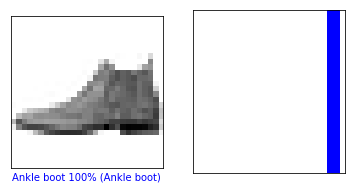

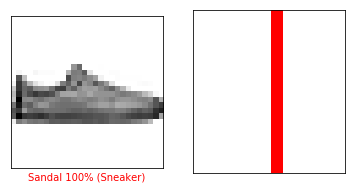

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

predictions = model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

test_labels[0]

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


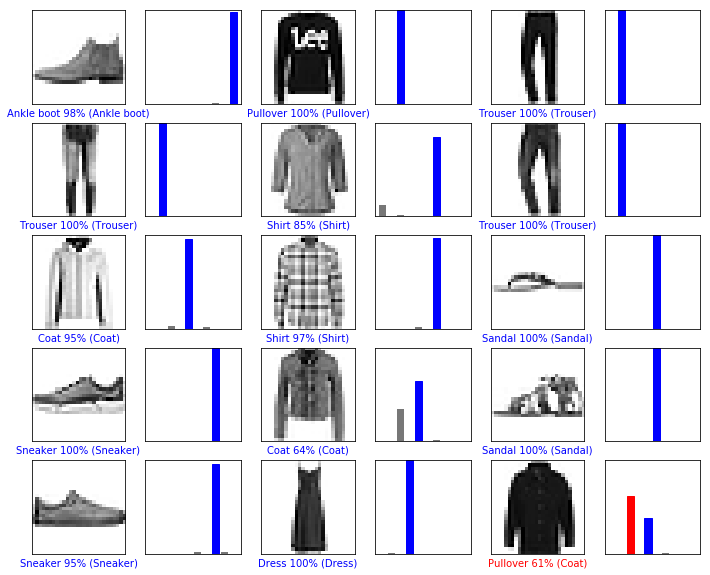

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


(28, 28)
(1, 28, 28)
[[1.4282476e-05 7.4721321e-08 8.2168026e-07 9.1113925e-08 3.5026119e-08
  2.9452948e-03 3.4567943e-06 1.5173315e-02 1.8070104e-05 9.8184454e-01]]


9

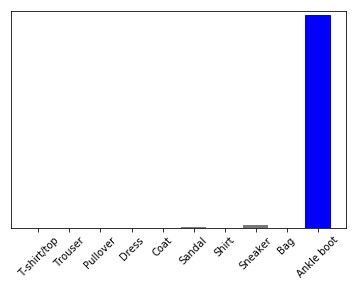

In [22]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])